In [2]:
# Import Required Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

### Read Training data

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Removing ID col from Train data
train_data.drop(columns=['Id'], inplace=True)

In [5]:
train_data.shape

(1460, 80)

In [6]:
train_data.isna().sum().values

array([   0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  872,    8,    0,    0,    0,   37,   37,   38,   37,
          0,   38,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  690,   81,   81,   81,    0,    0,   81,   81,    0,    0,
          0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,    0,
          0,    0,    0])

In [7]:
train_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [8]:
# Split training independent and dependent features
independent_training_features = train_data.iloc[:, :-1]
dependent_training_feature = train_data.iloc[:, -1]

### Data Preprocessing Functions

In [9]:
# Visualize features normalization
def check_normalization(data):
    for col in data.columns:
        sns.histplot(data[col], kde=True)
        plt.show()

In [10]:
# Winsorization using IQR (IQR best works with data which is not normalized)
def winsozrization_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_value = q1 - (1.5 * IQR)
    higher_value = q3  + (1.5 * IQR)
    data[col] = np.where(data[col] < lower_value, lower_value, np.where(data[col] > higher_value, higher_value, data[col]))
    return data

In [11]:
# Removing Outliers
def remove_outliers(data):
    for col in data.select_dtypes(exclude='object'):
        data = winsozrization_iqr(data, col)
        return data

In [12]:
# After winsorization
def plot_outliers(data):
    for col in data.select_dtypes(exclude='object'):
        sns.boxplot(data[col])
        plt.show()

In [13]:
# Scaling numerical values
def scaling(data):
    ss = StandardScaler()
    for col in data.select_dtypes(exclude='object'):
        data[col] = ss.fit_transform(data[[col]])

In [14]:
# Filling categorical features missing values
def handling_cat_missing_values(data):
    for col in data.select_dtypes(include='object').columns:
        if data[col].isna().sum()>0:
            data[col].fillna(data[col].mode()[0], inplace=True)

In [15]:
# Filling Numerical features missing values
def handling_numeric_missing_values(data):
    null_columns = data.select_dtypes(exclude='object').columns[data.select_dtypes(exclude='object').isna().any()]
    null_columns.tolist()
    for col in null_columns:
        data[col].fillna(data[col].mean(), inplace=True)

In [16]:
# Label Encoding categorical feature values
def encoding(data):
    le = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            arr = le.fit_transform(data[col])
            data[col] = pd.DataFrame(arr, columns=[col])

### Preprocess Train Data

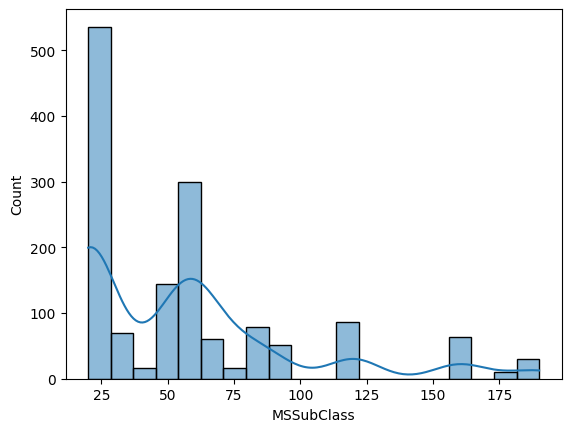

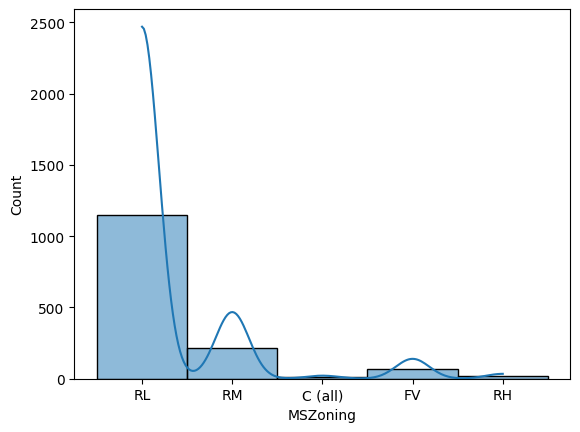

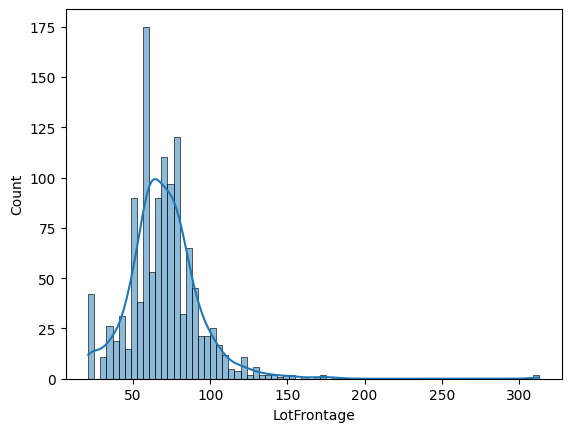

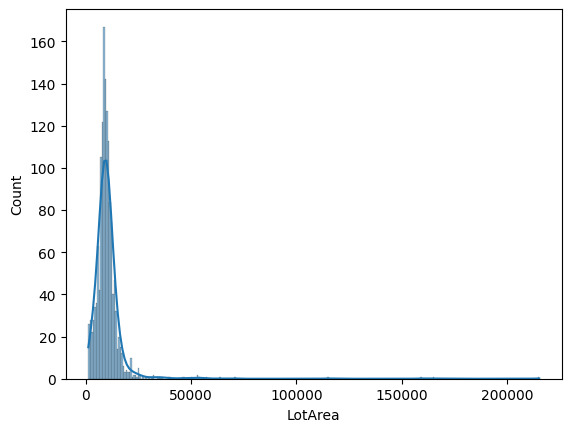

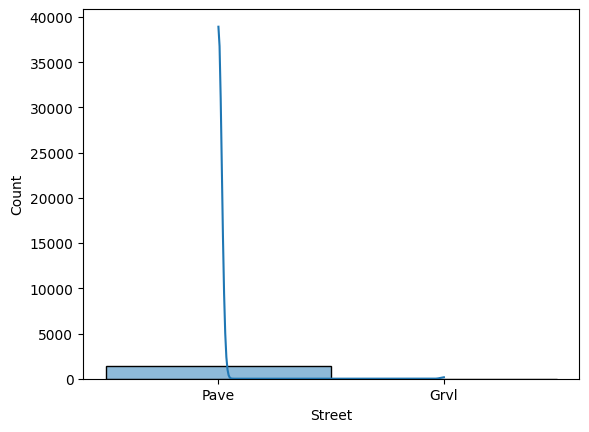

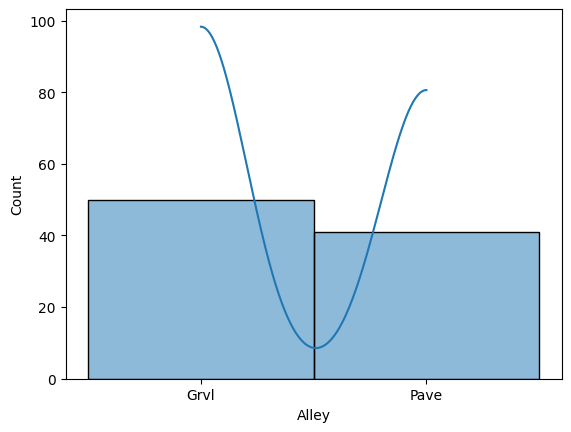

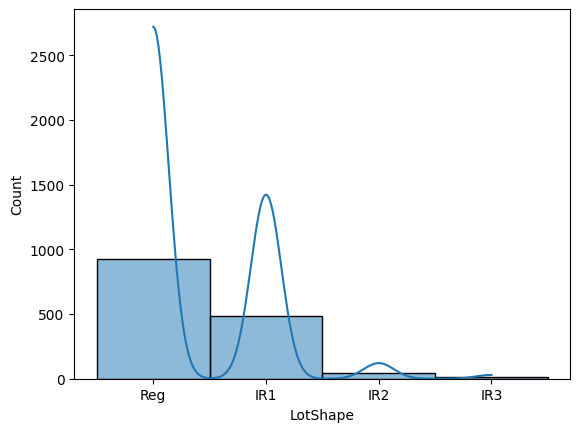

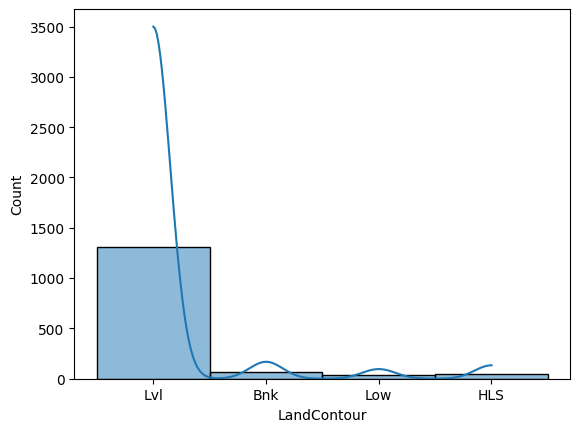

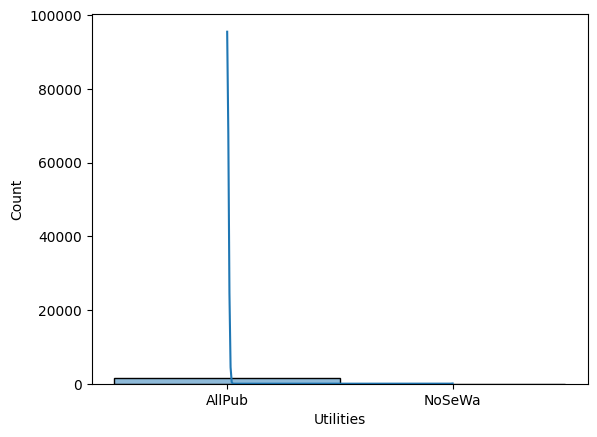

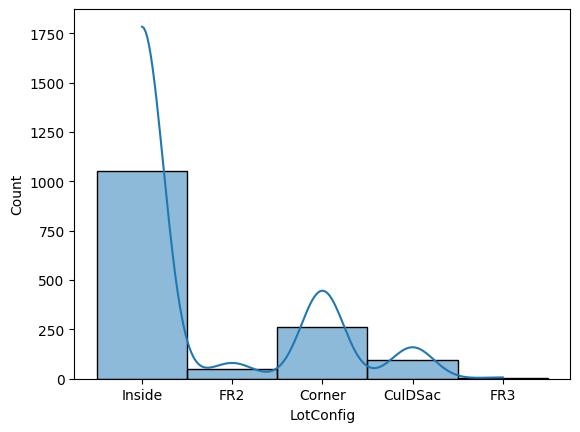

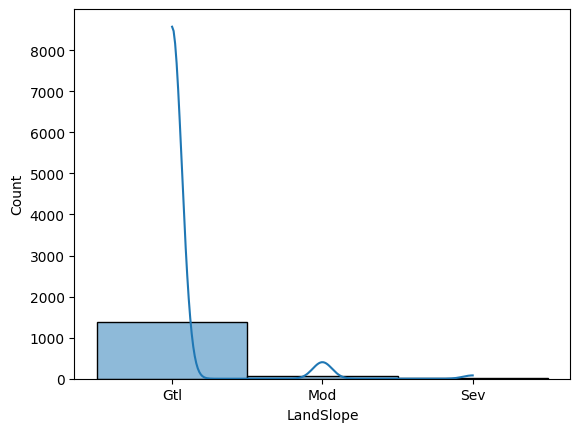

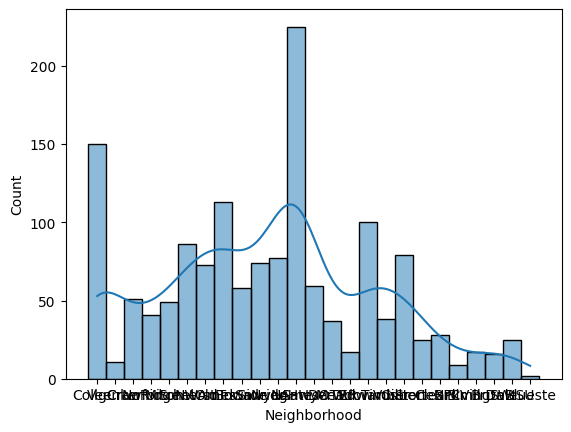

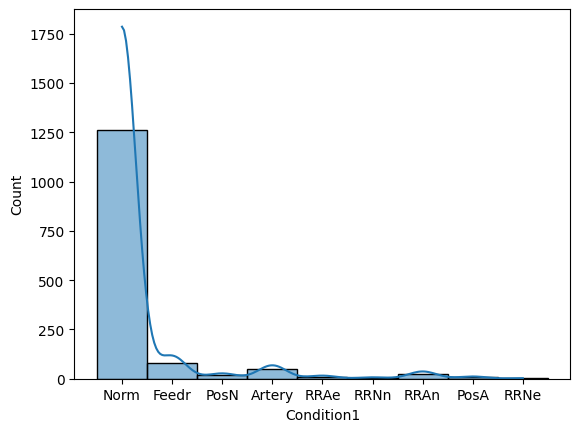

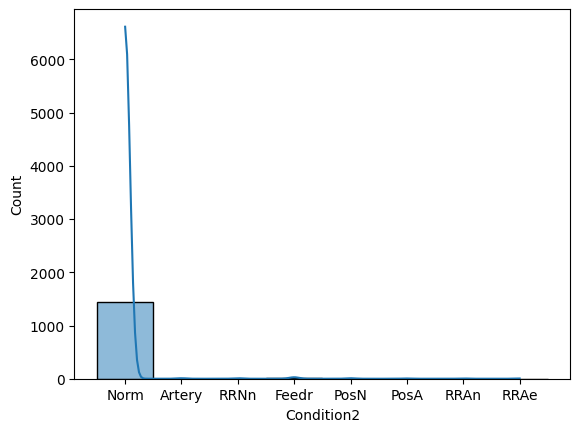

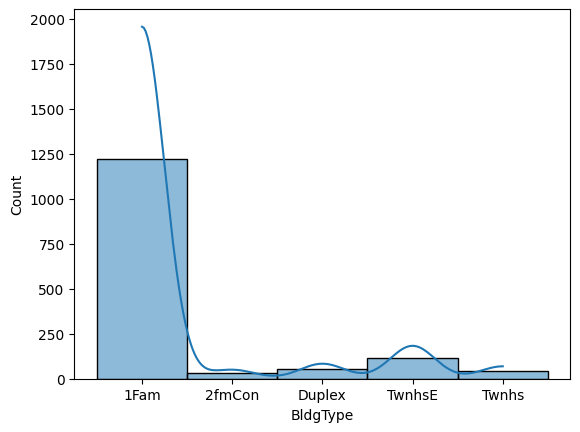

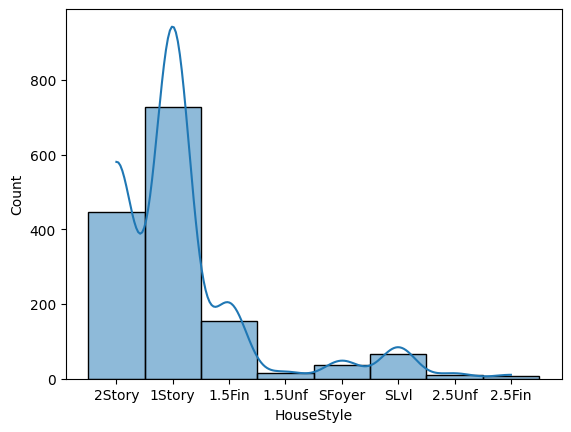

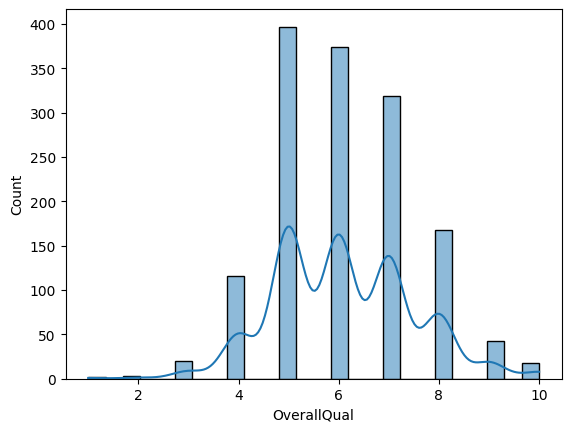

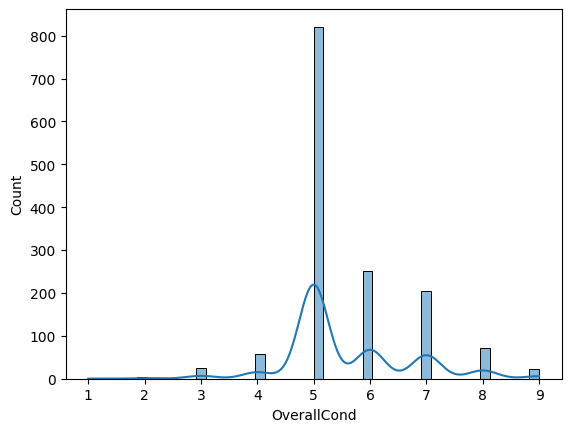

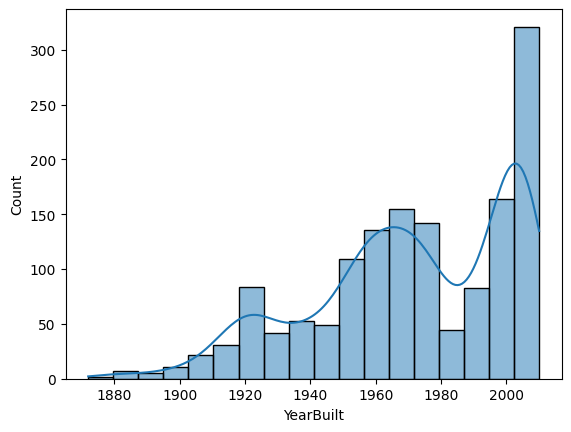

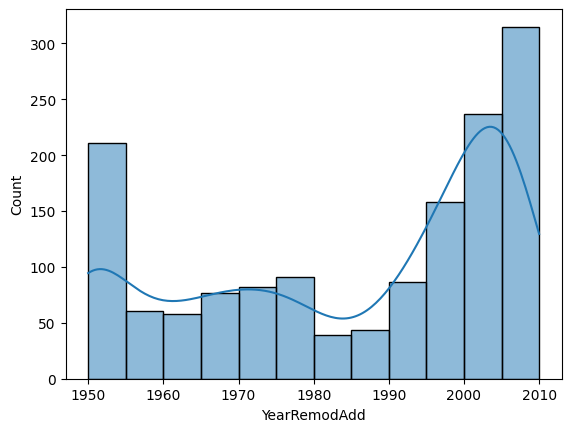

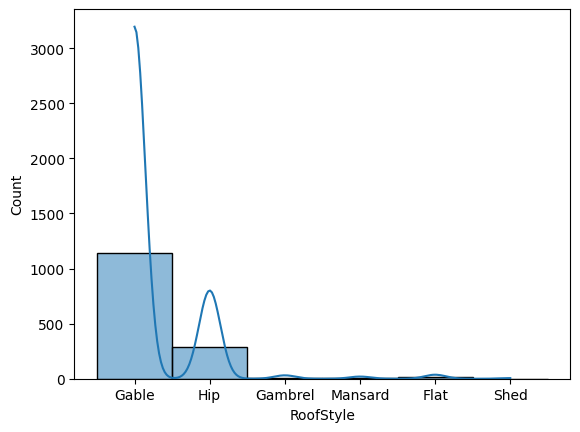

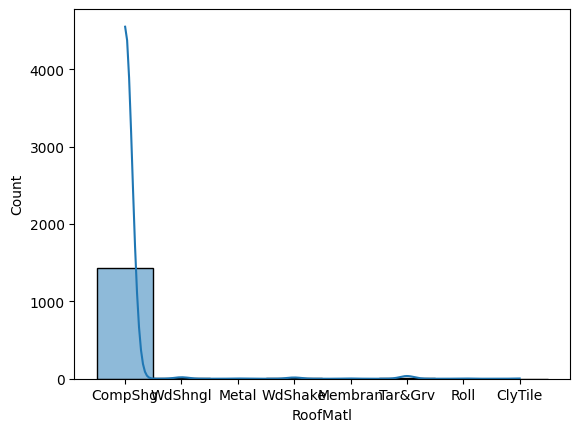

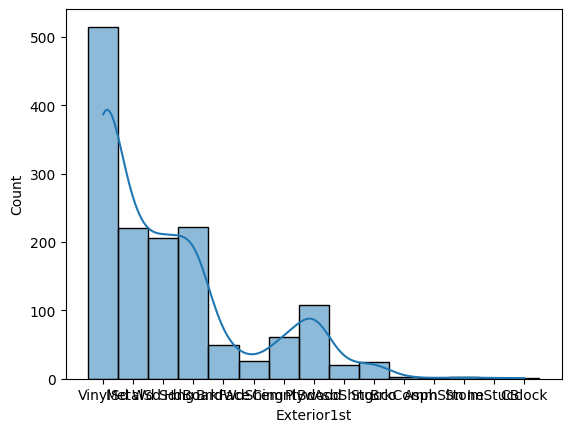

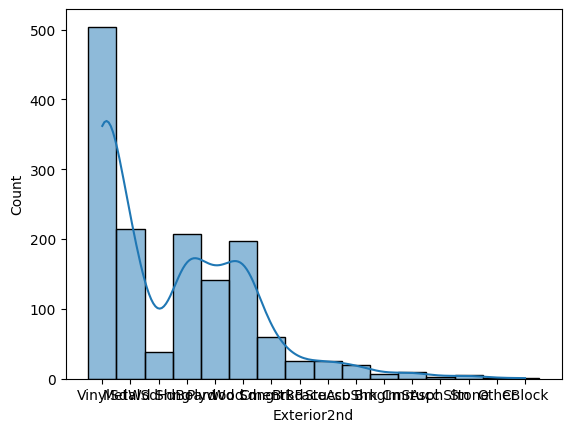

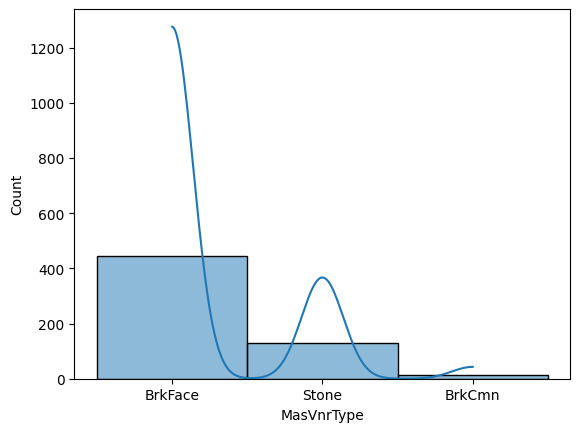

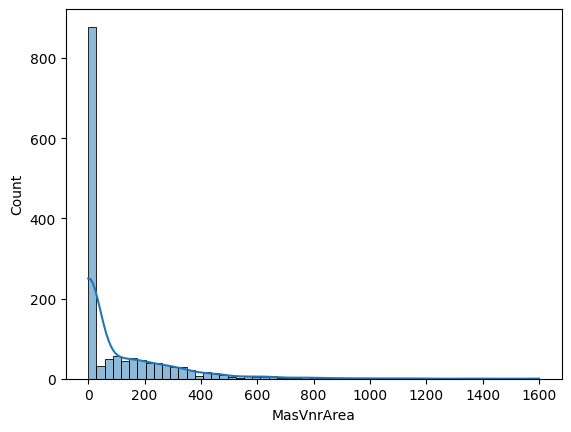

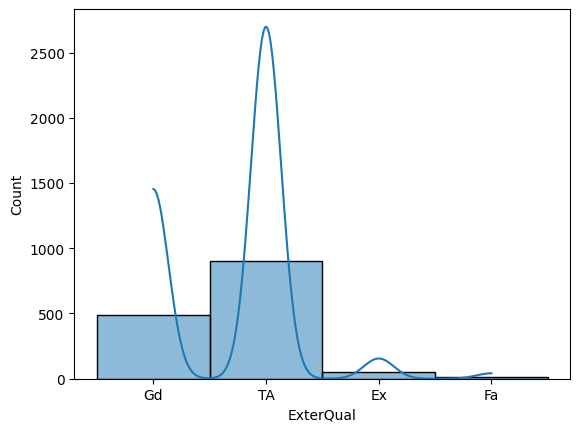

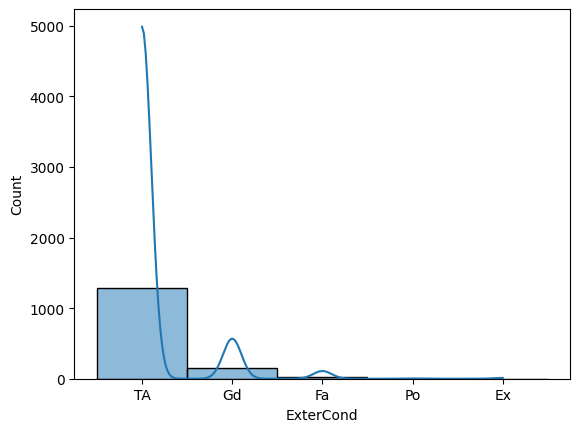

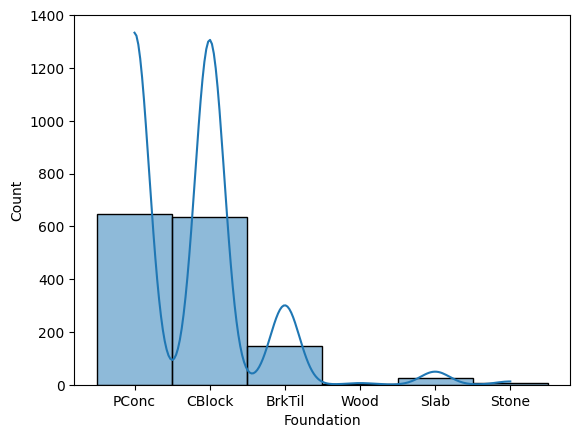

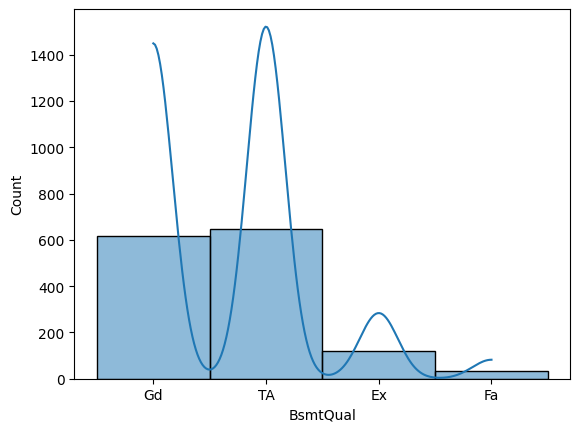

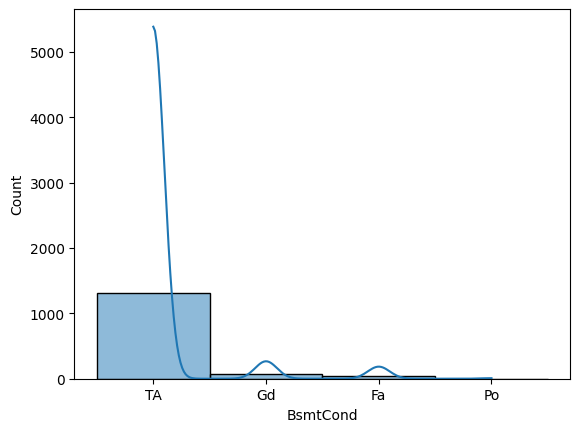

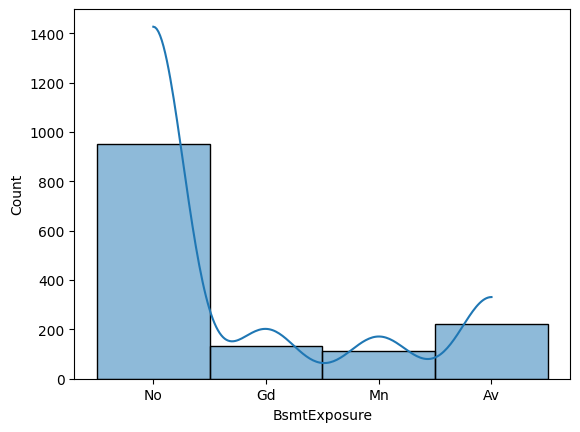

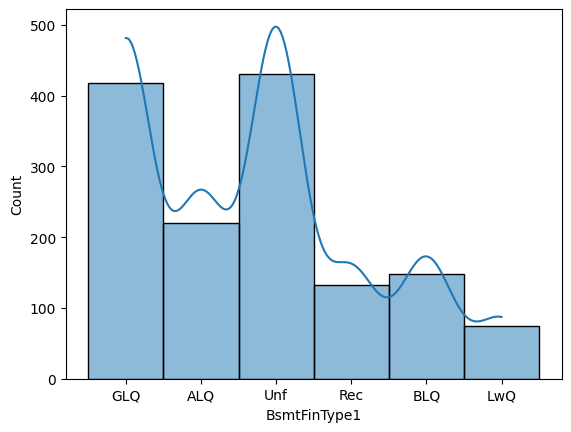

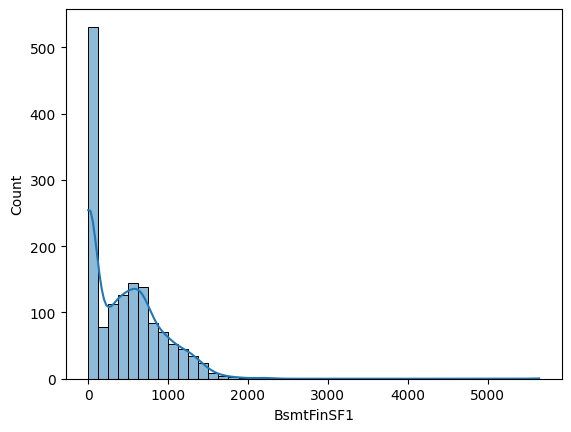

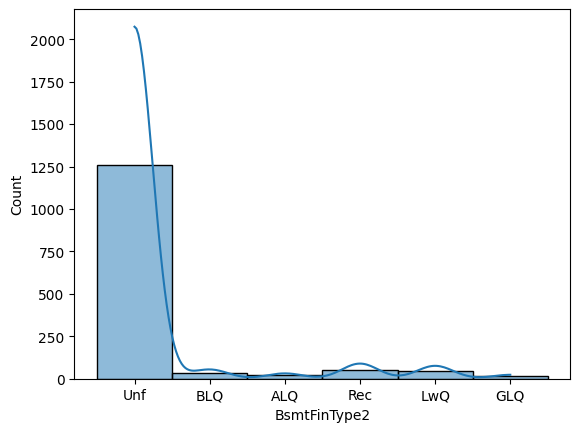

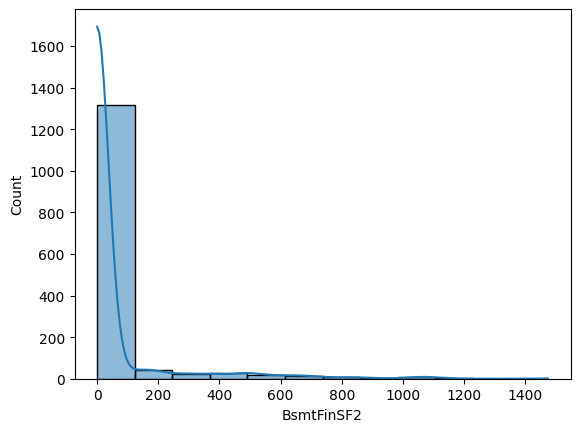

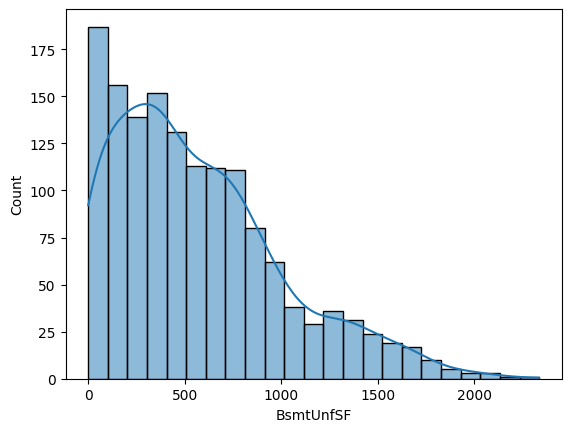

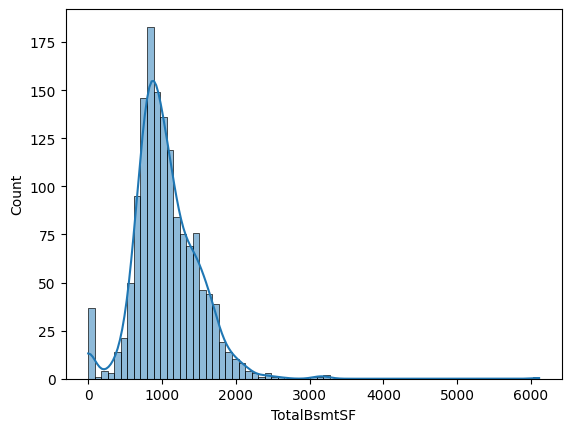

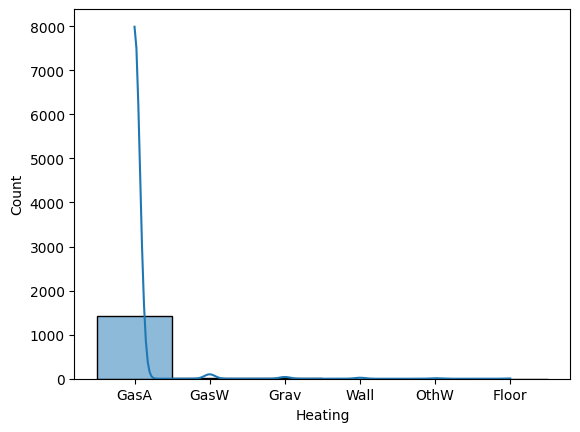

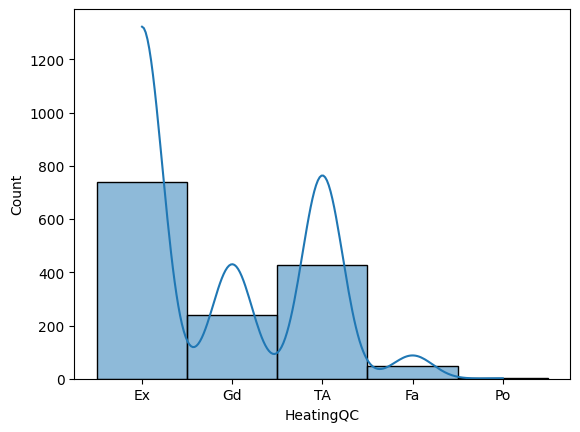

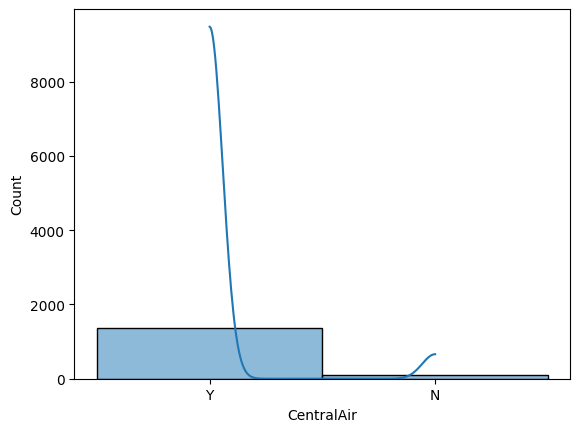

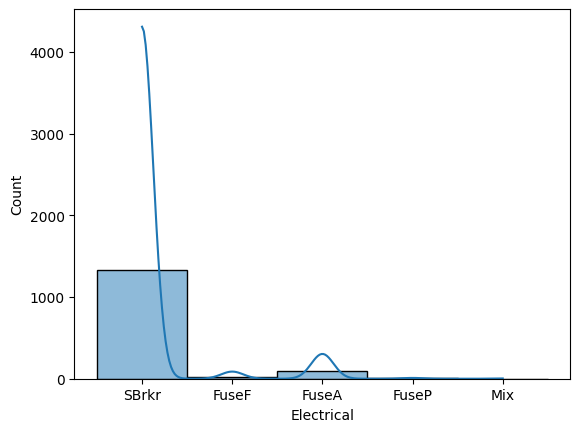

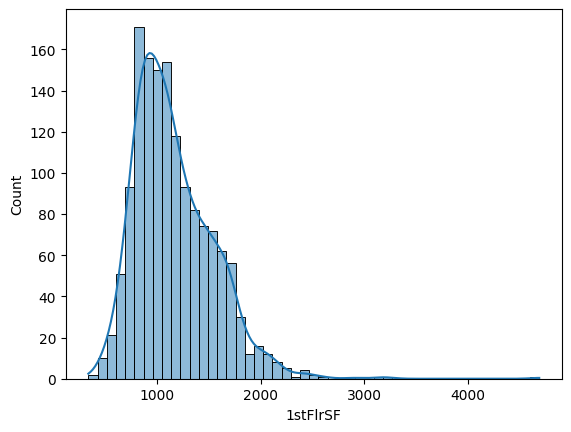

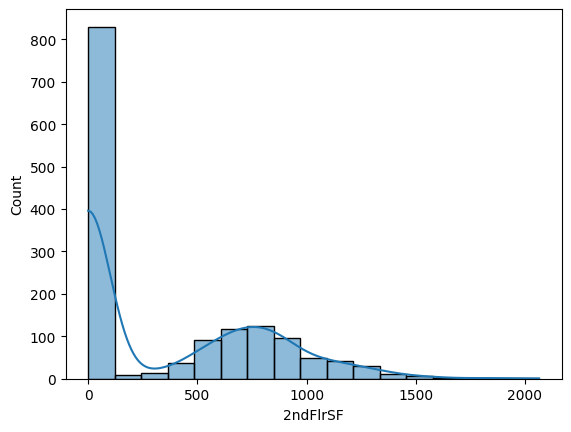

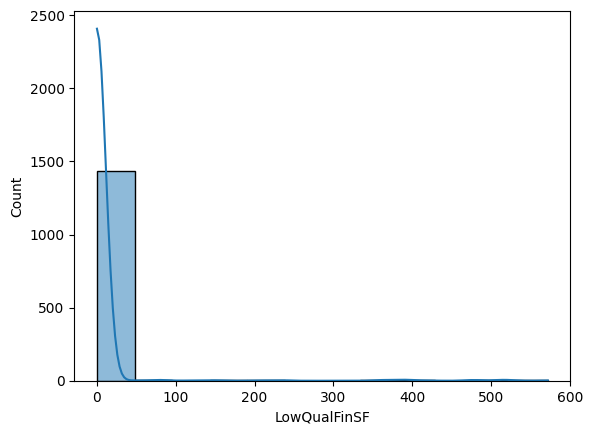

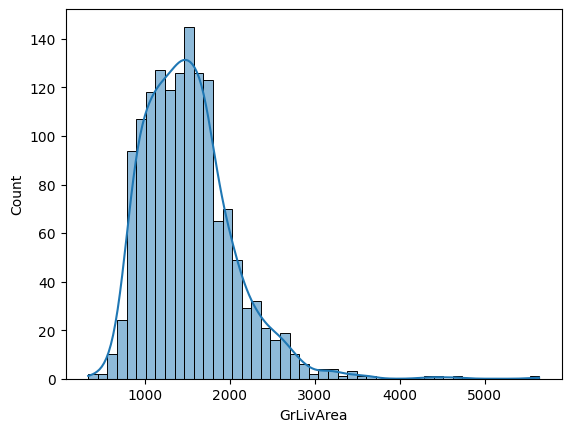

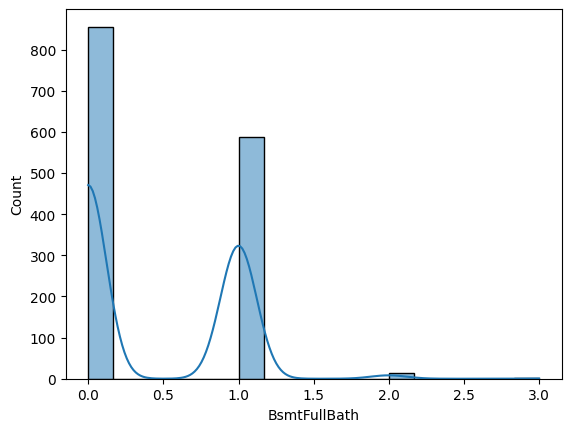

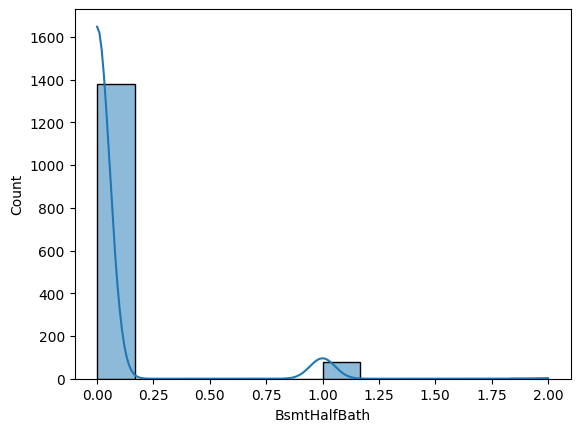

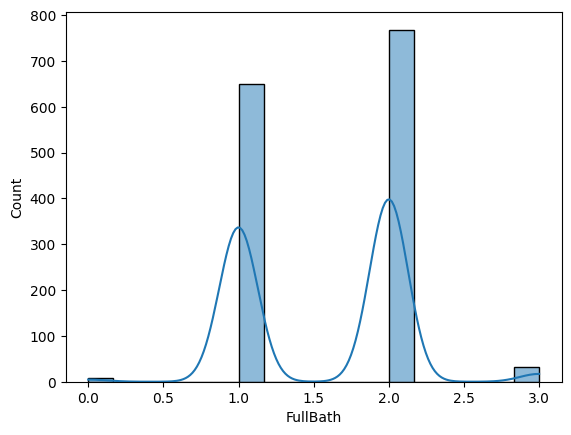

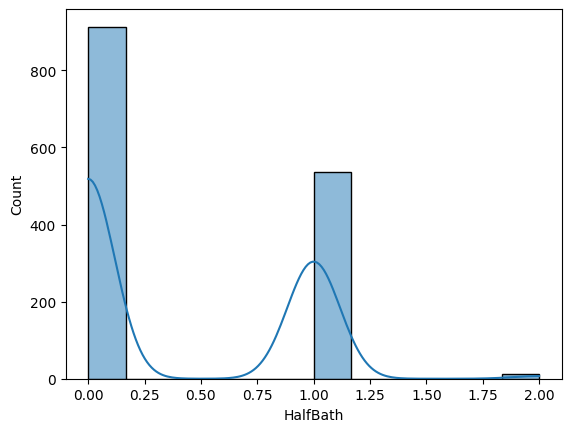

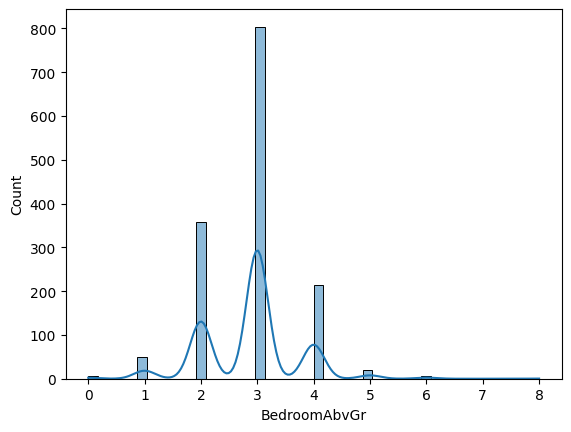

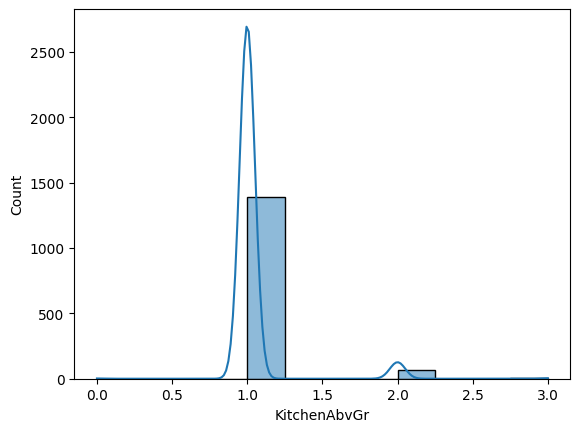

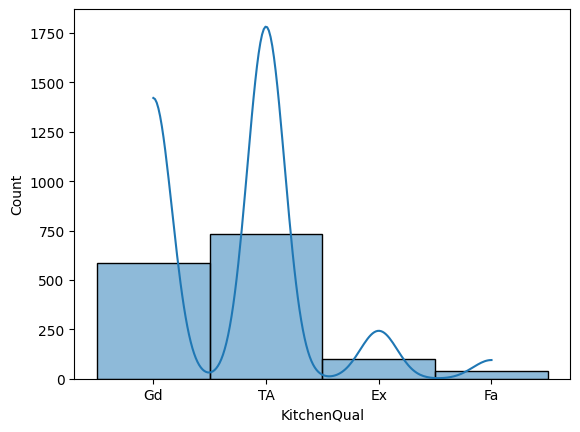

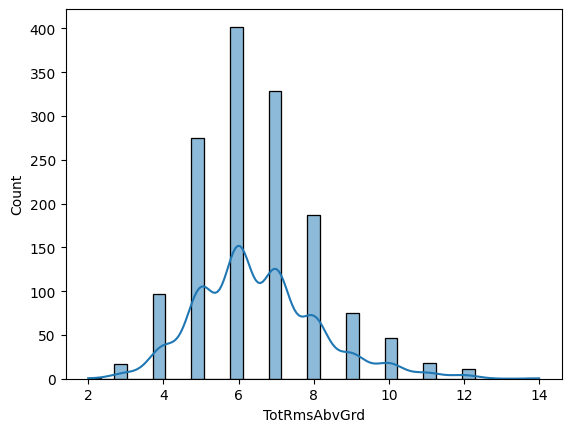

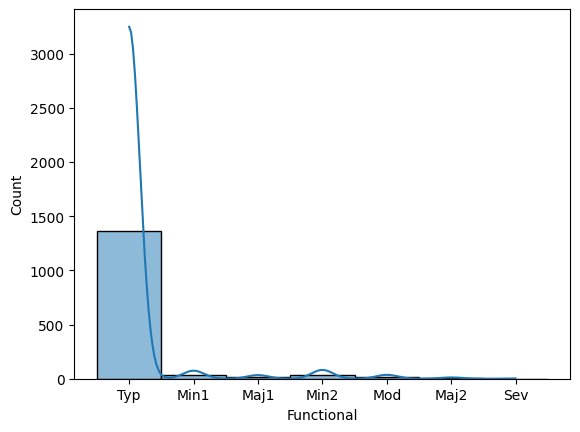

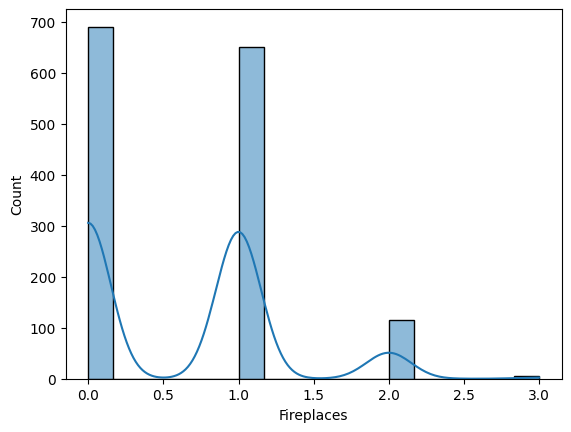

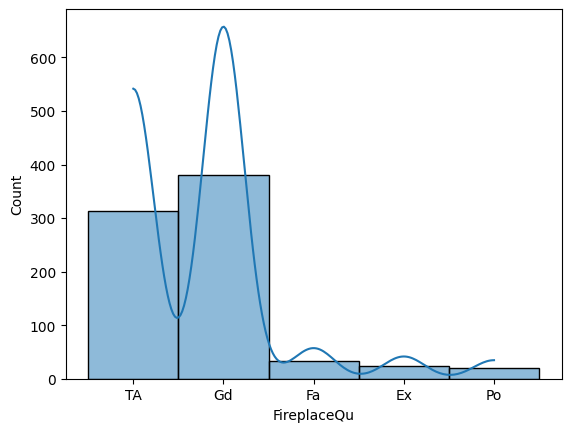

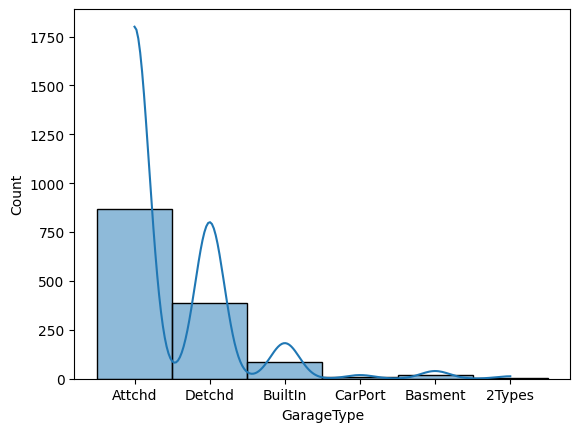

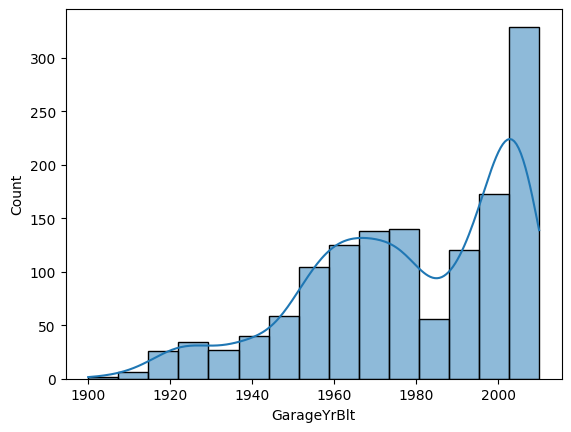

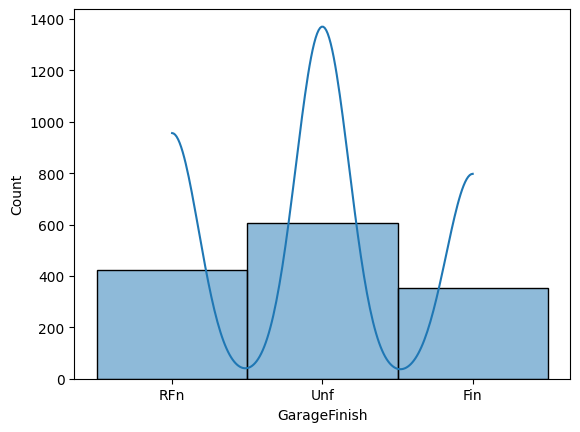

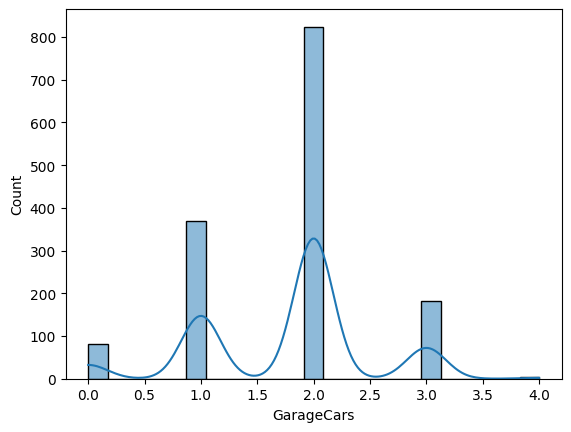

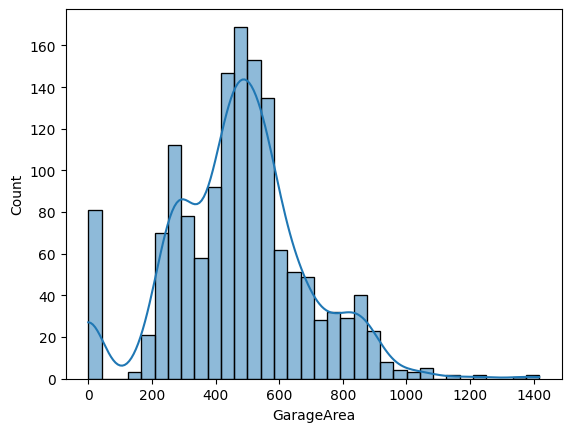

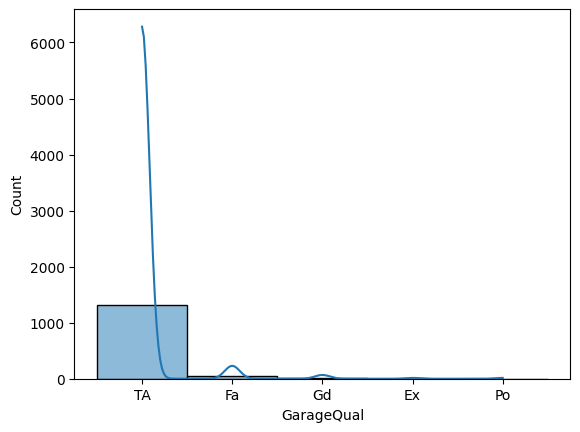

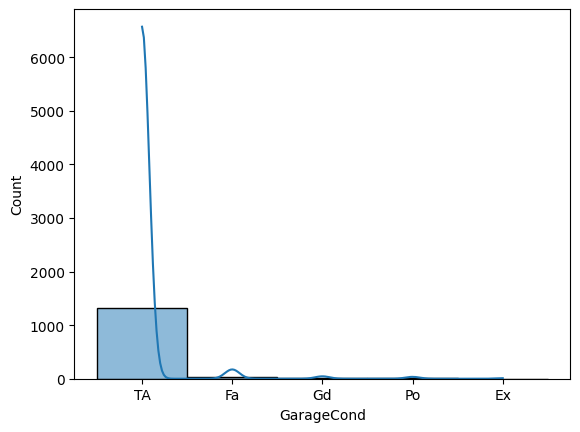

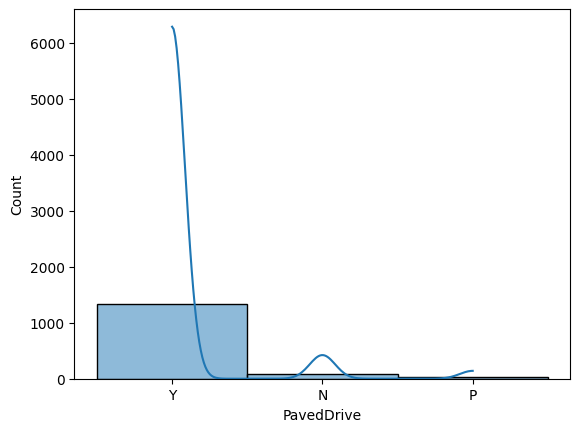

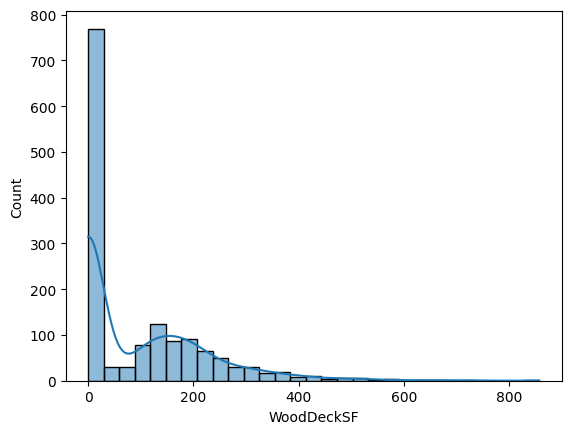

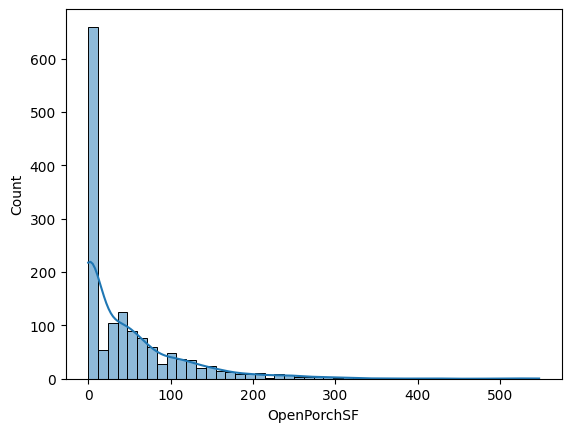

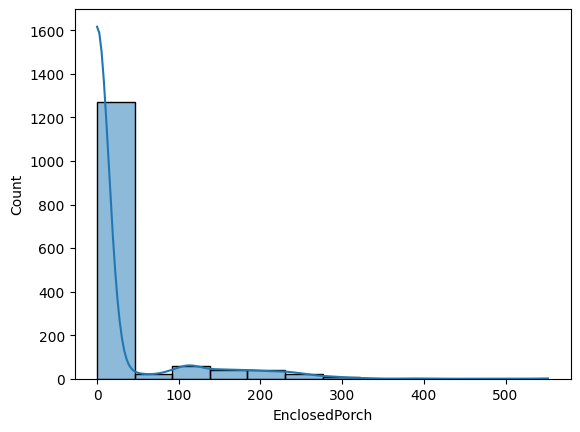

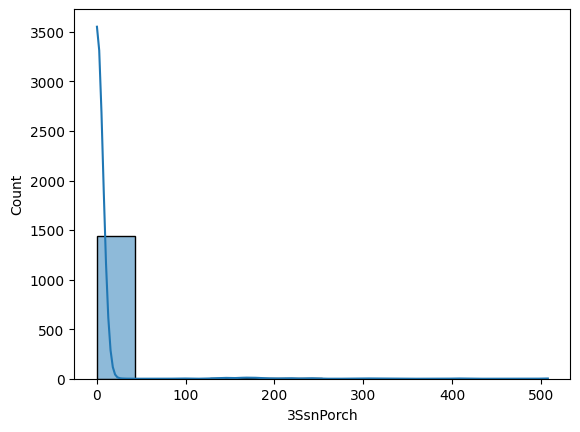

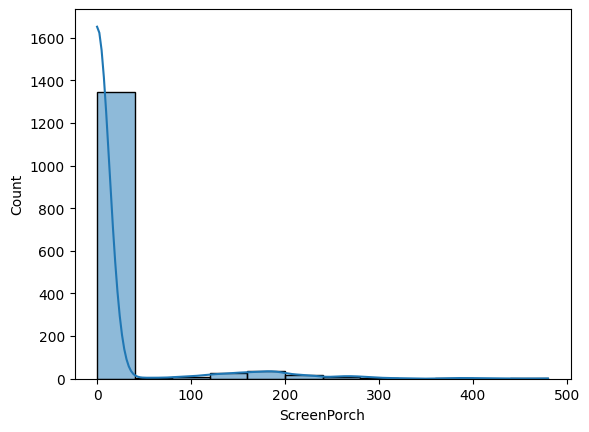

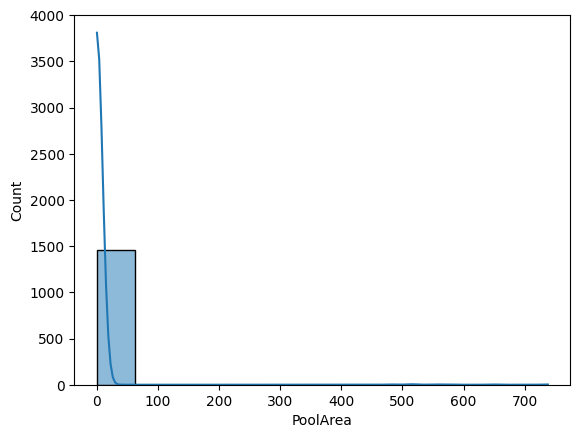

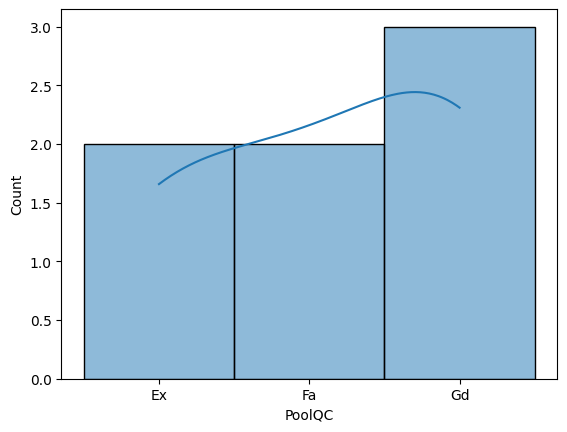

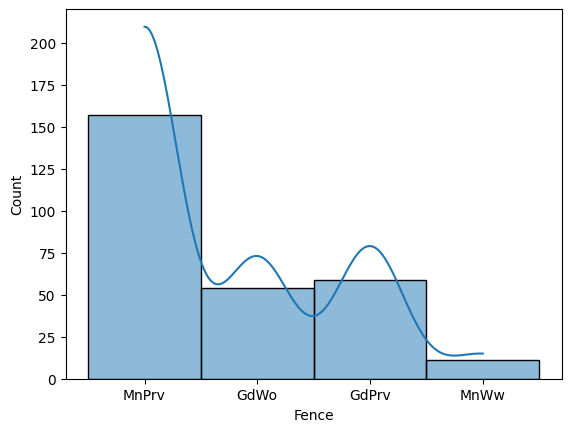

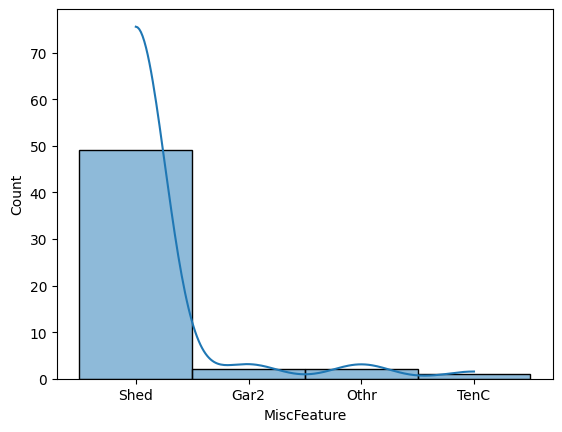

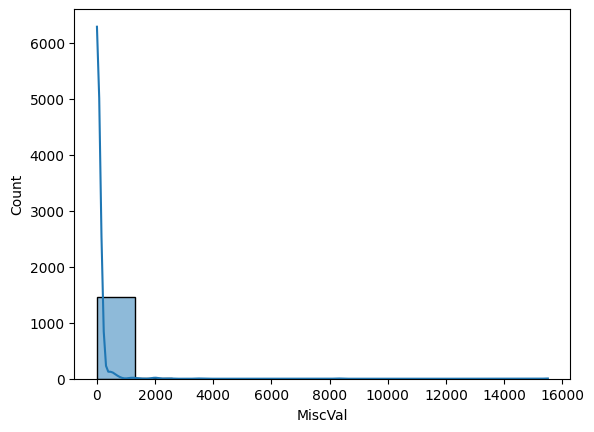

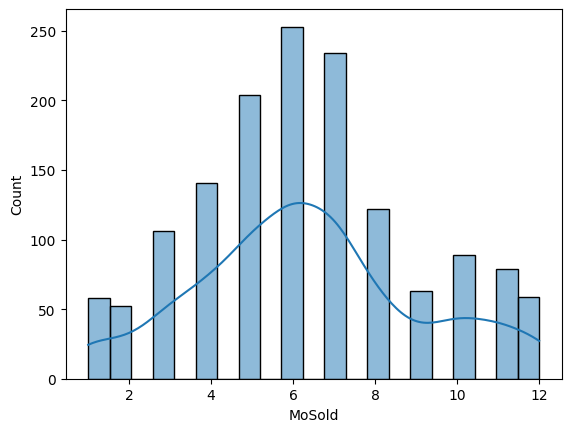

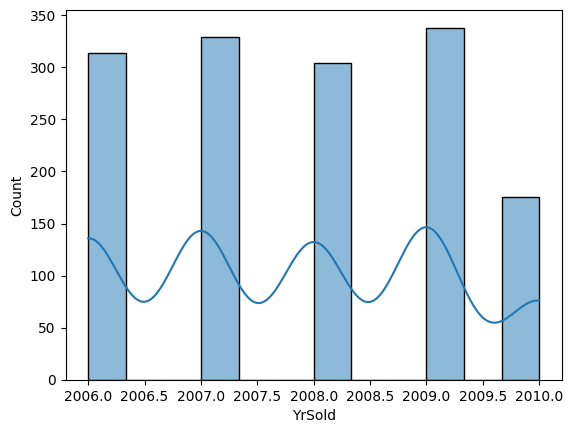

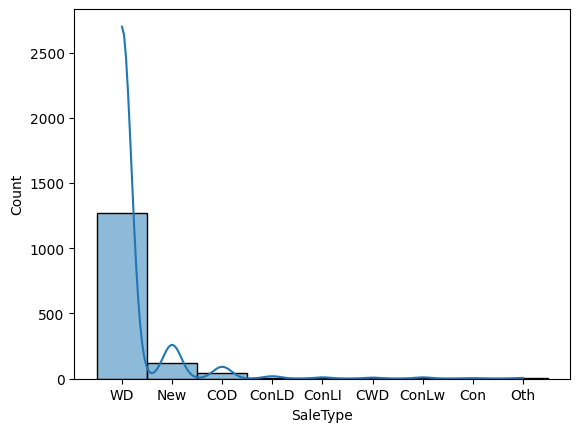

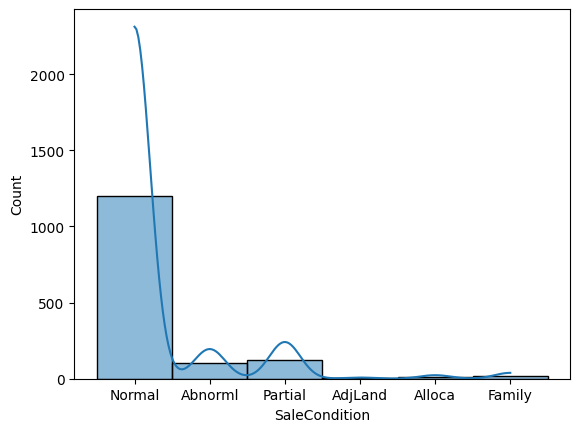

In [17]:
# Check train data normalization and get insights
check_normalization(independent_training_features)

#### Insight

* Only few of the train data features have most normal distribution data like LotFrontage, LotArea, TotalBsmtSF, lstFlrSF, GrLivArea

#### conclusion

* Use IQR method for outlier removal as it best suited for the data which is not normalized and skewed.

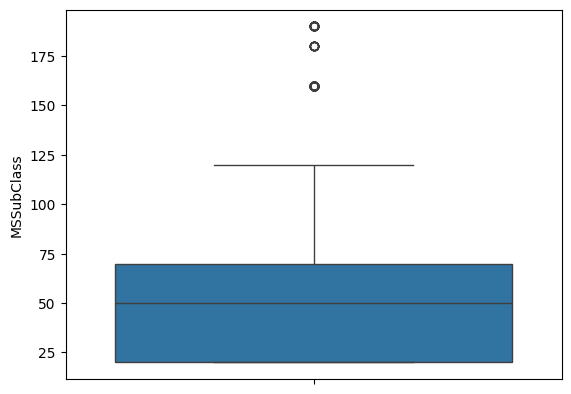

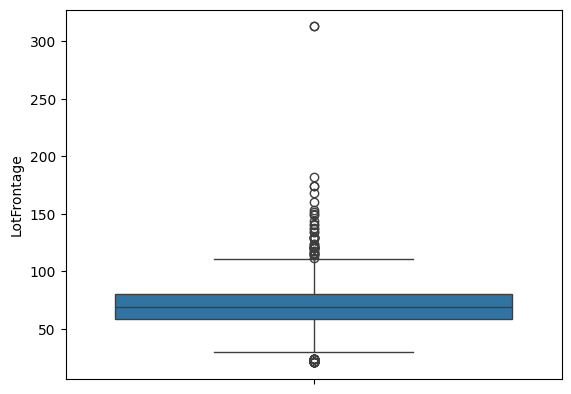

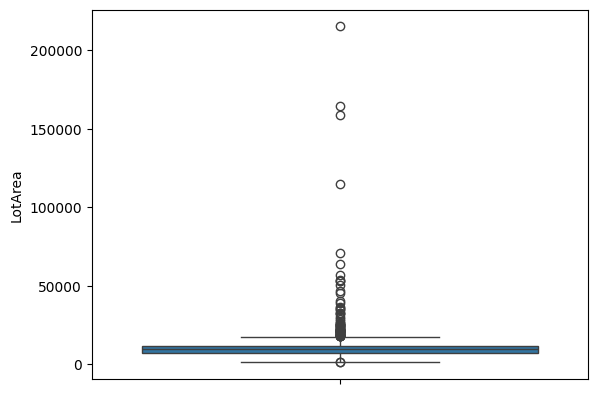

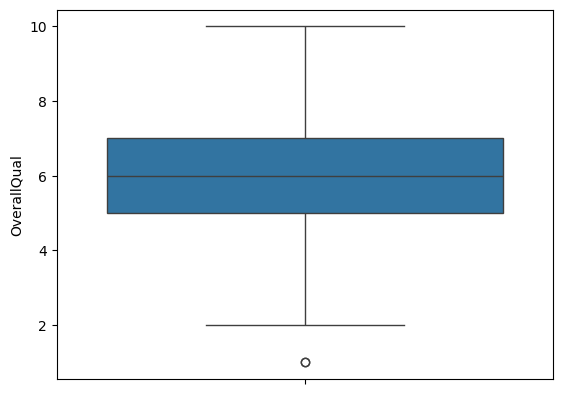

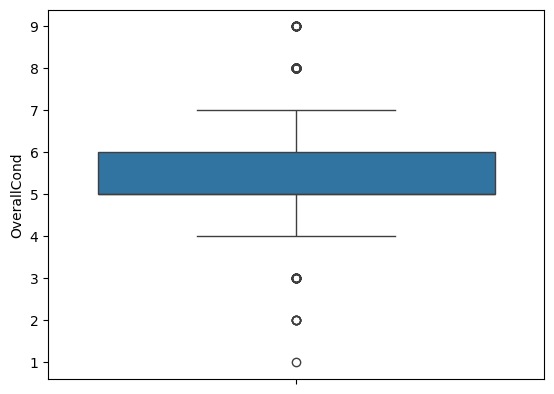

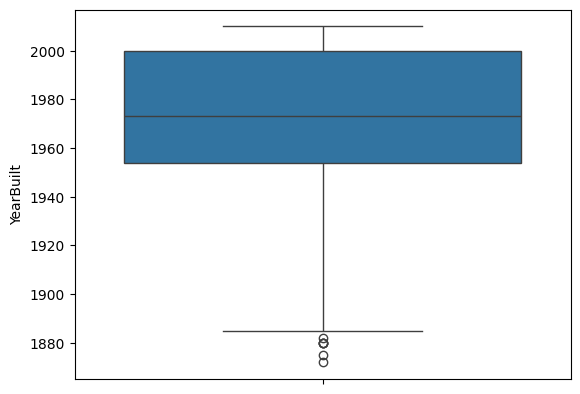

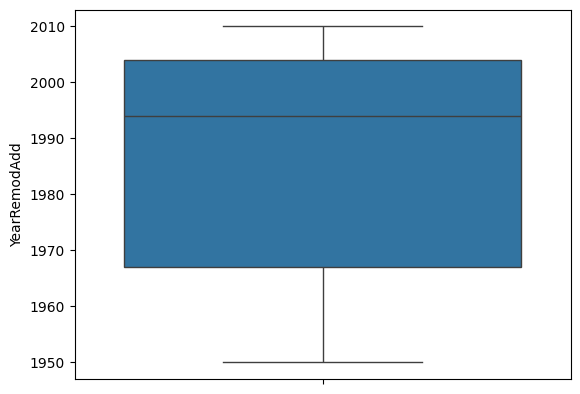

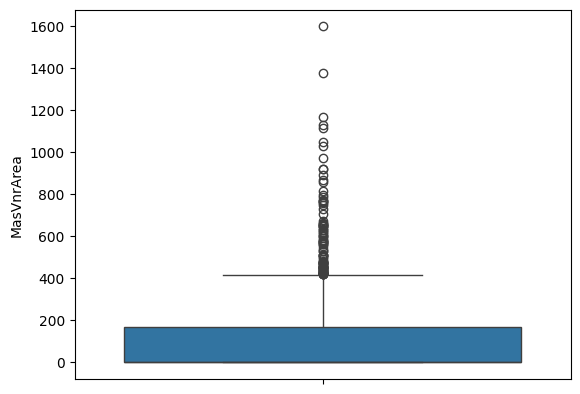

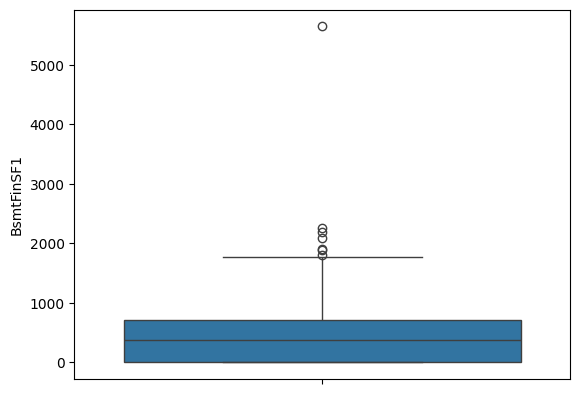

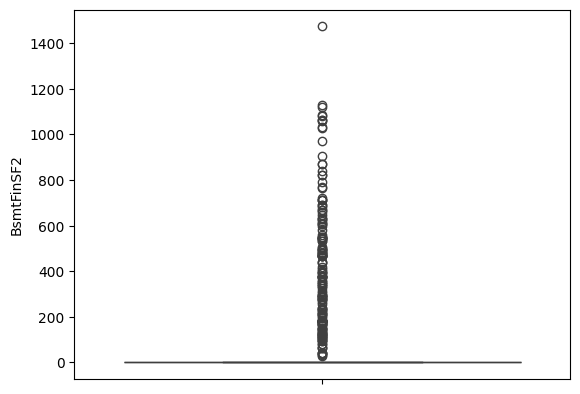

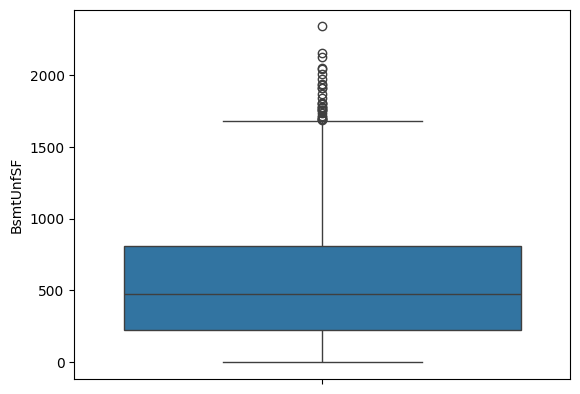

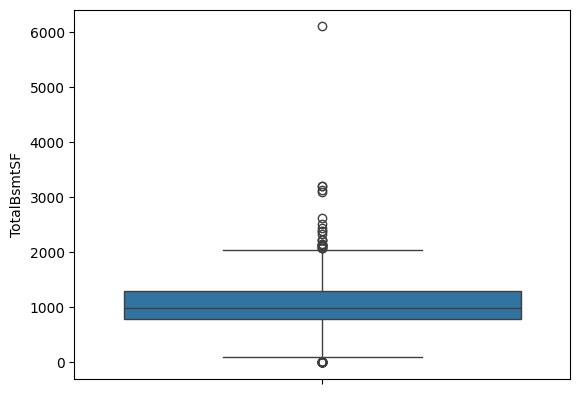

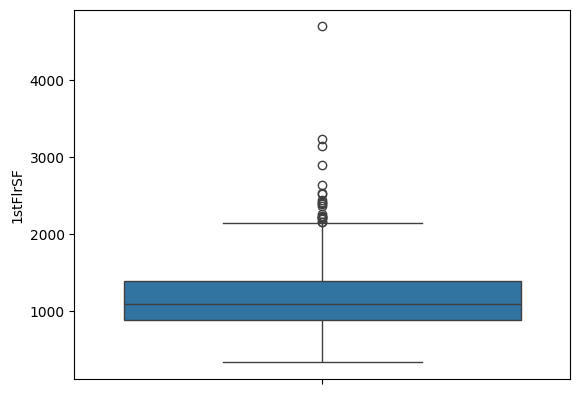

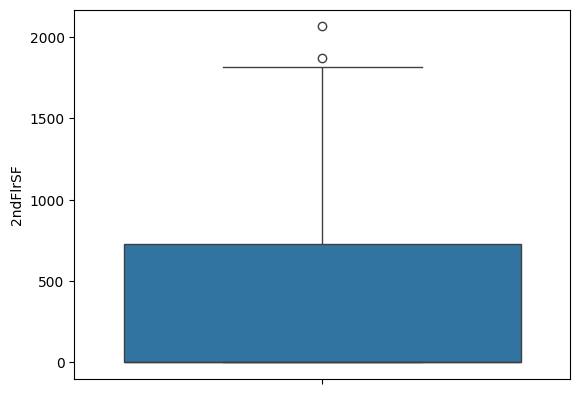

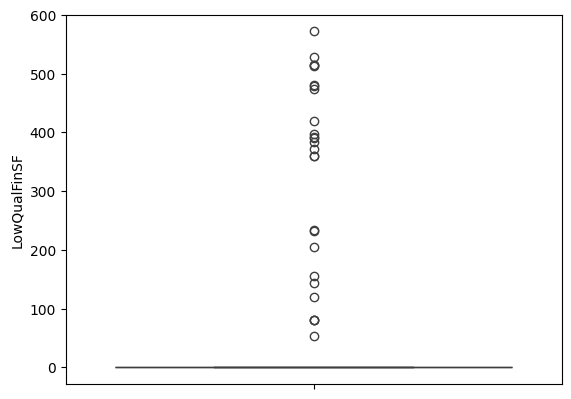

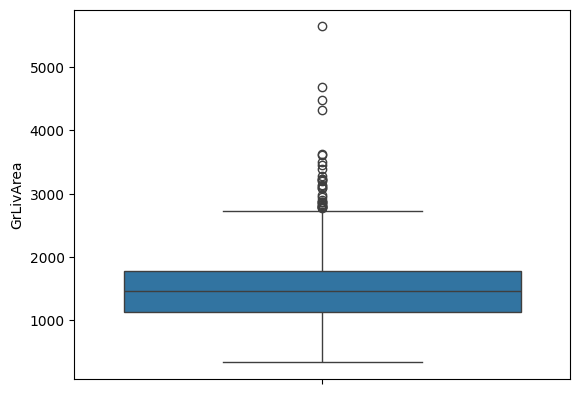

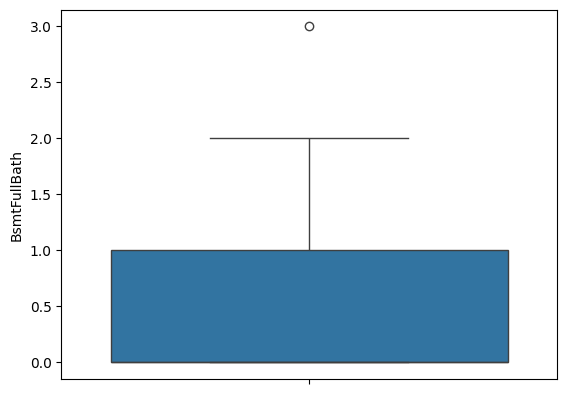

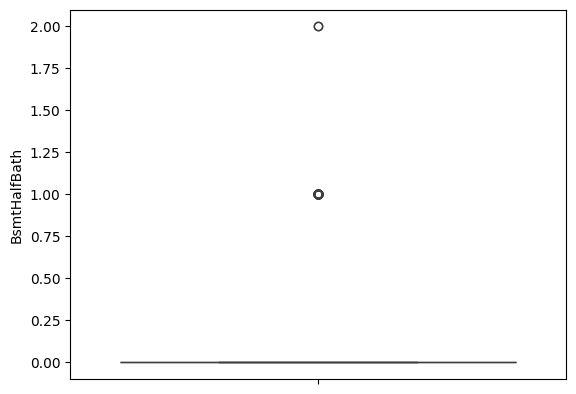

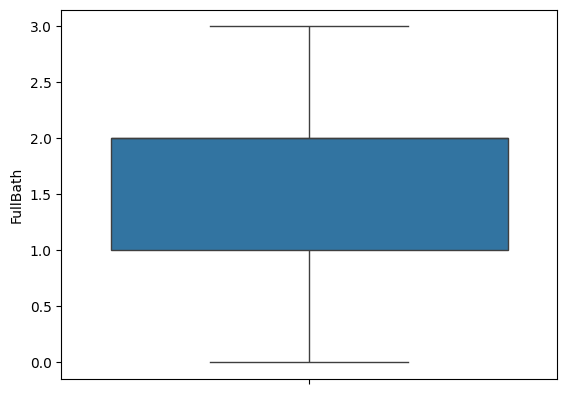

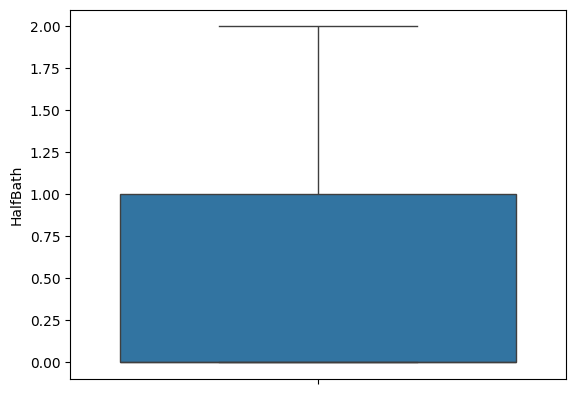

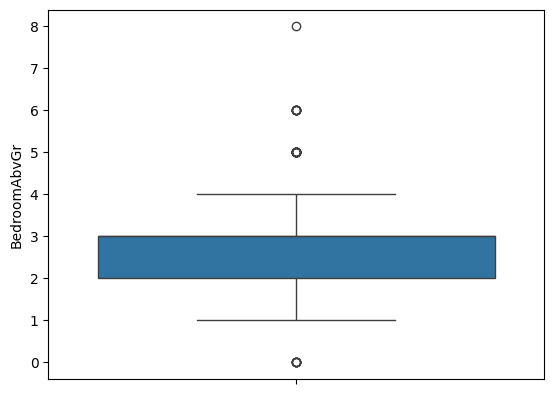

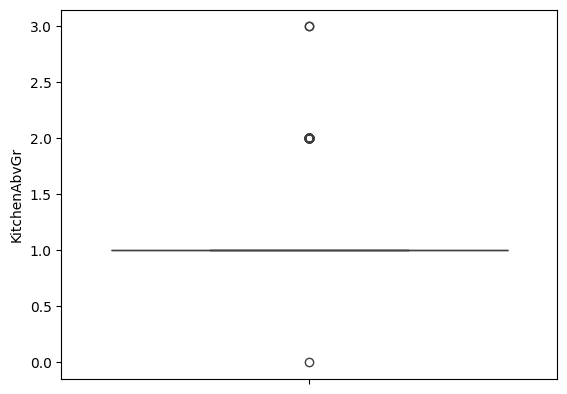

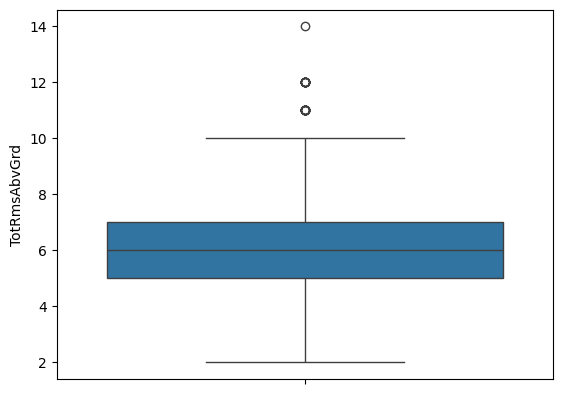

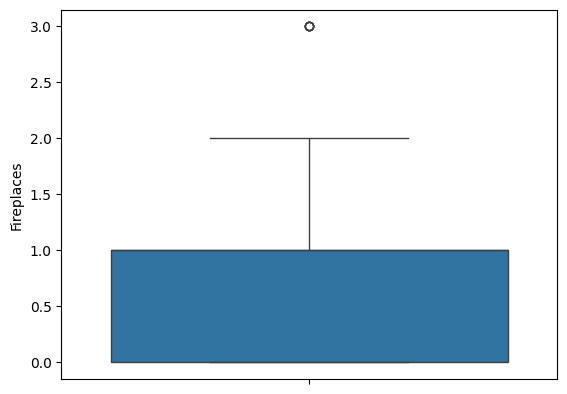

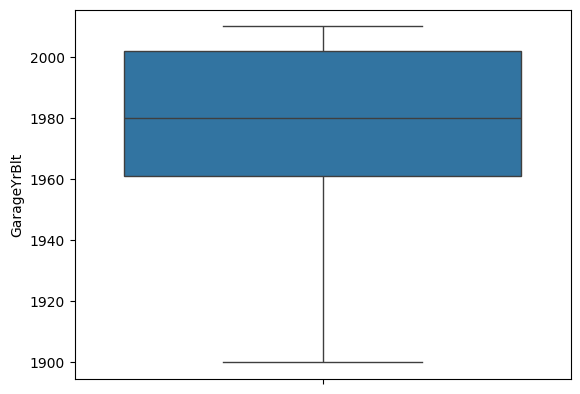

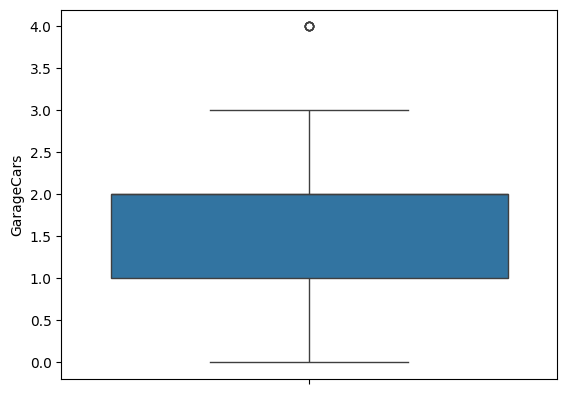

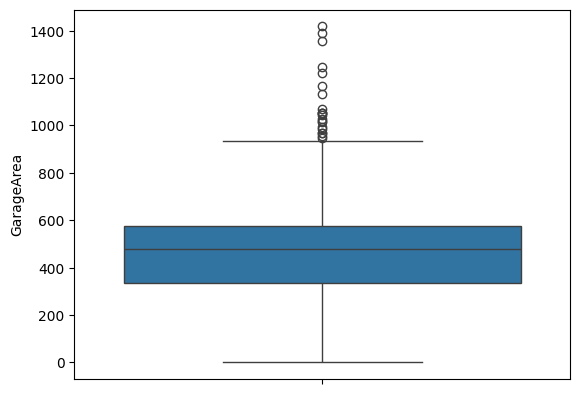

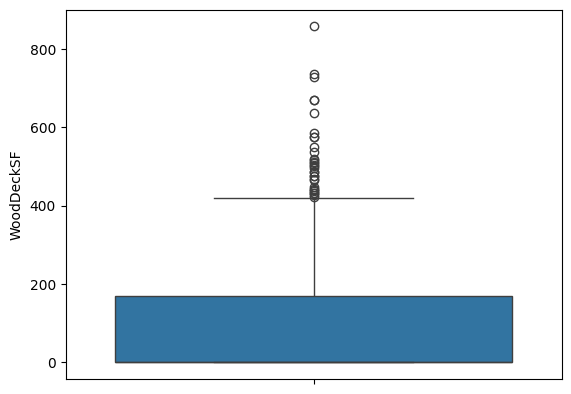

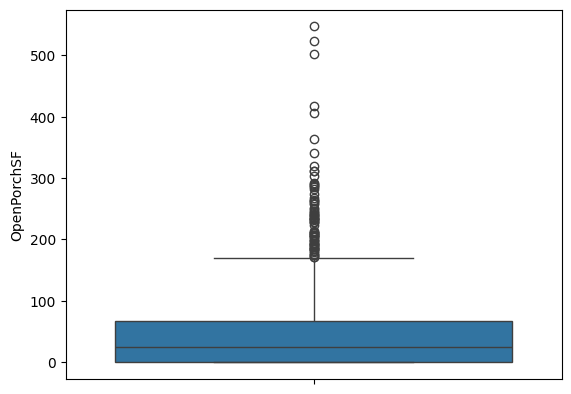

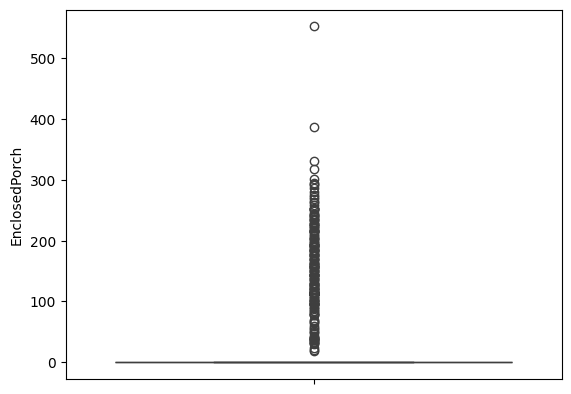

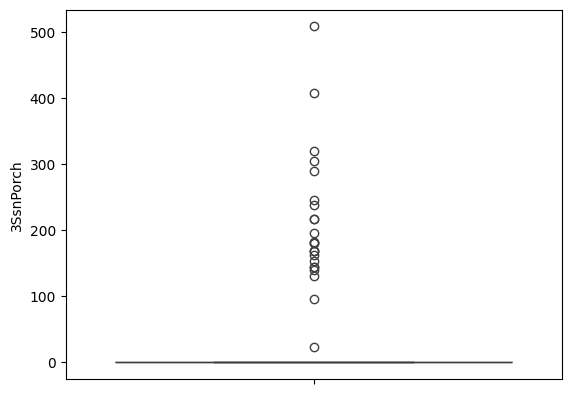

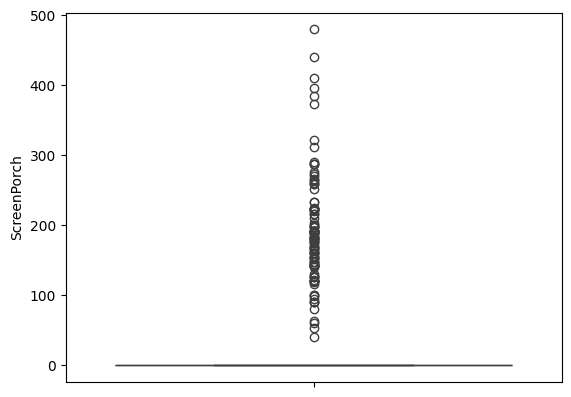

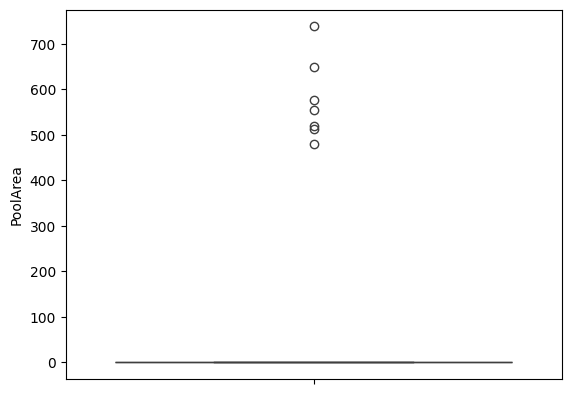

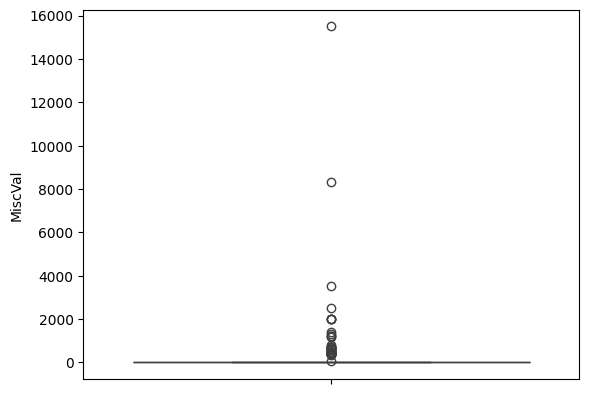

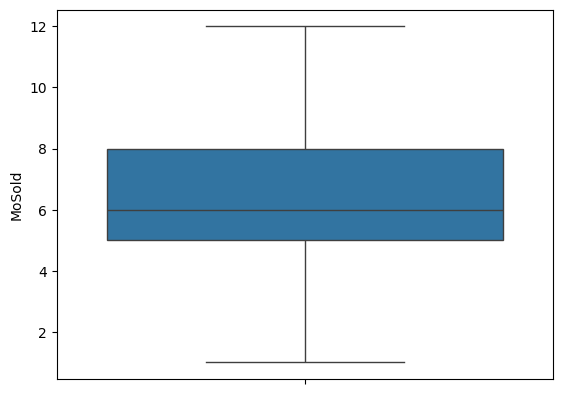

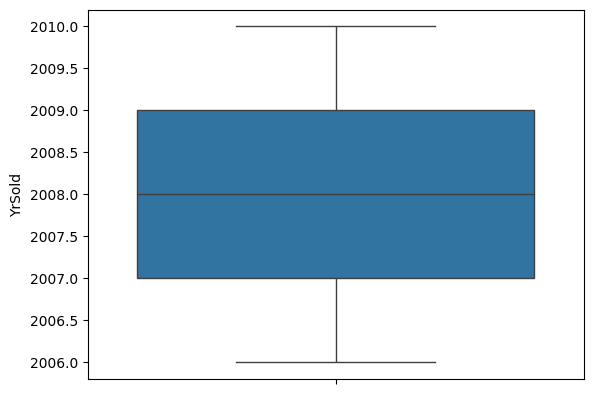

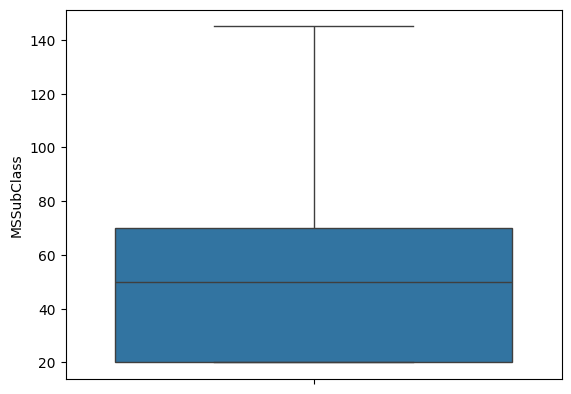

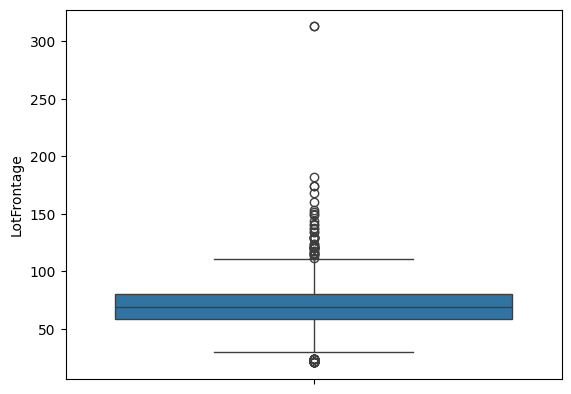

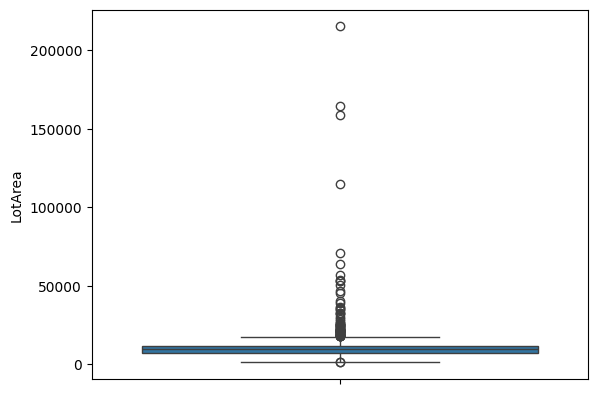

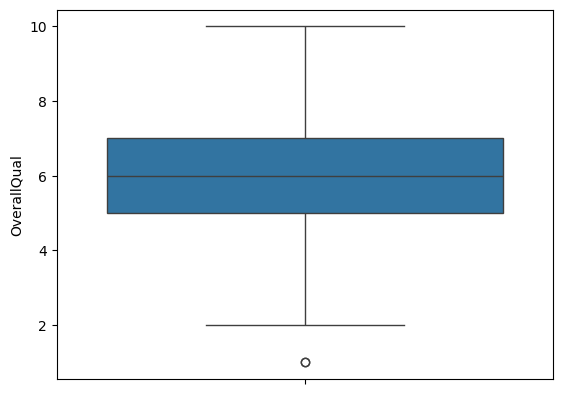

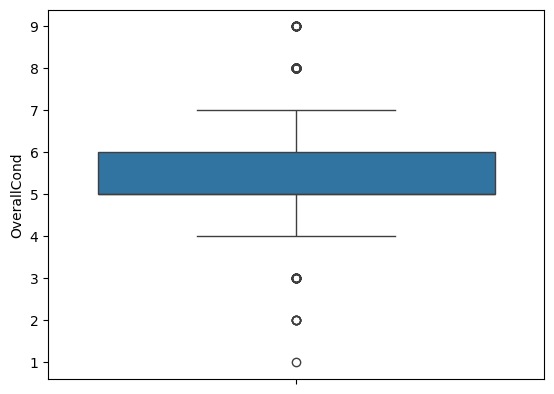

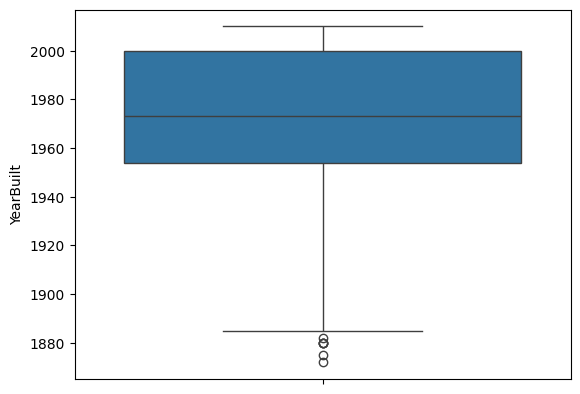

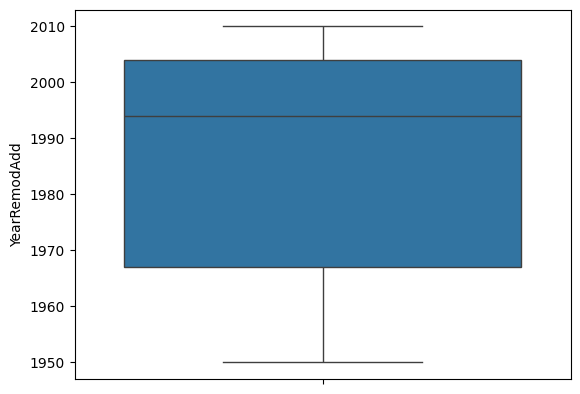

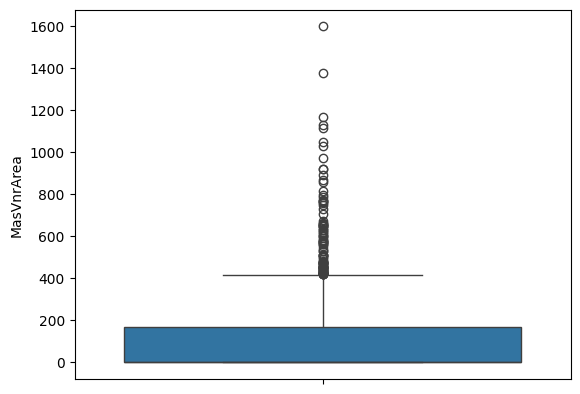

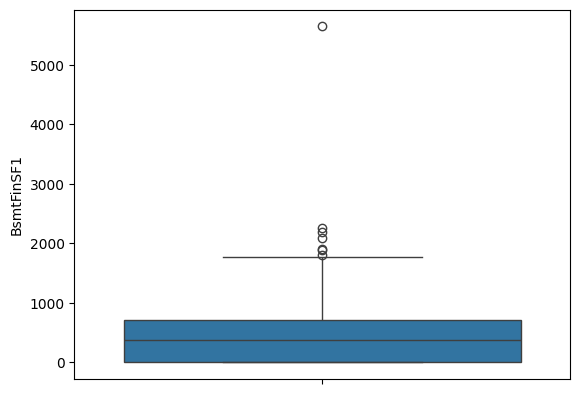

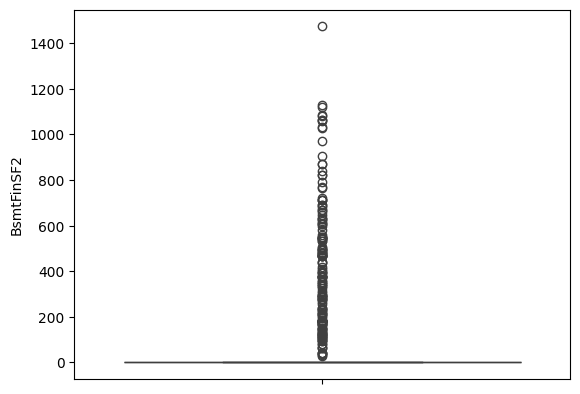

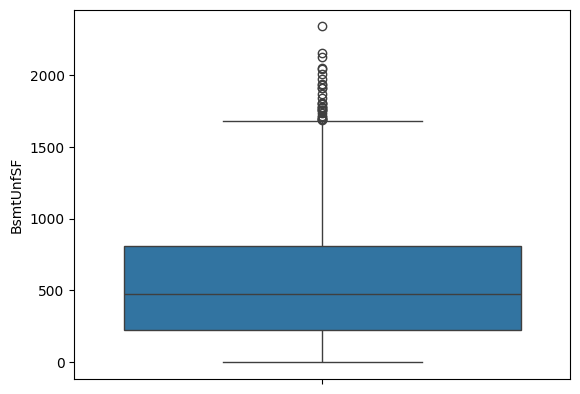

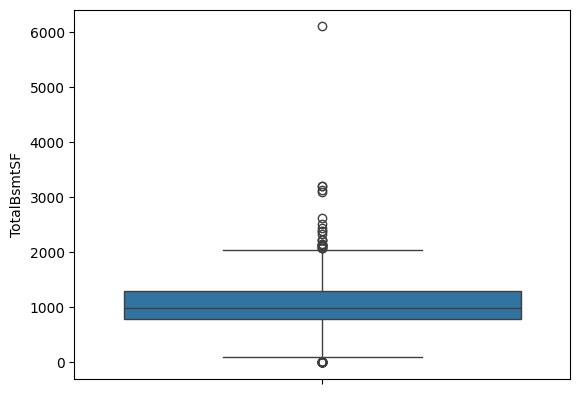

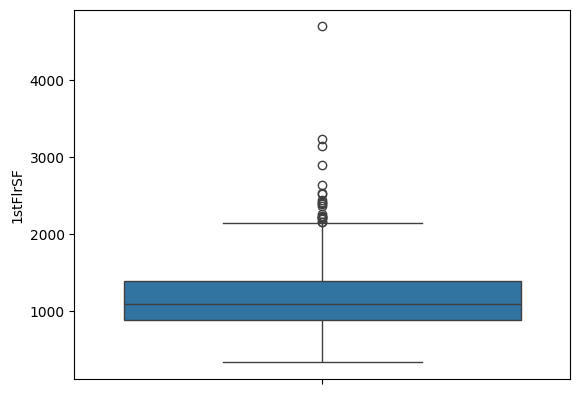

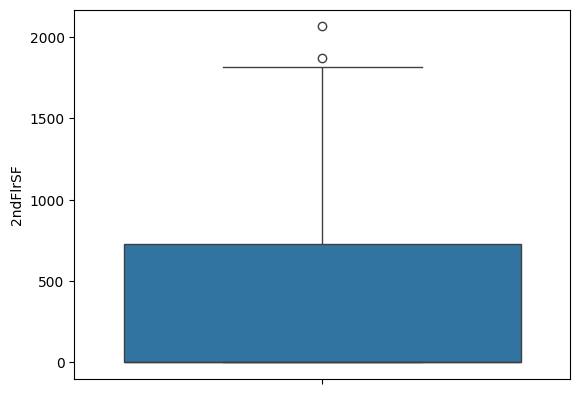

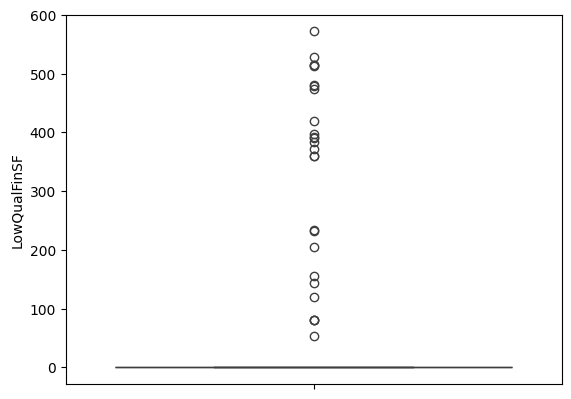

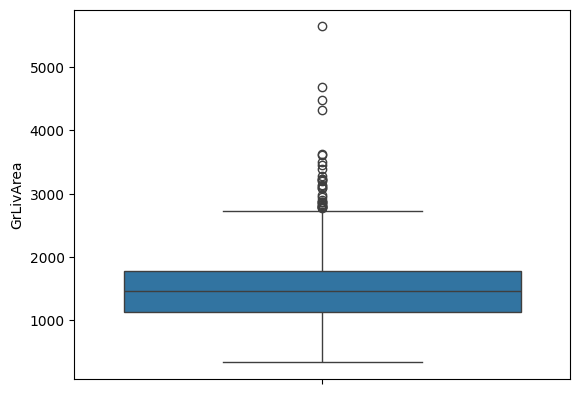

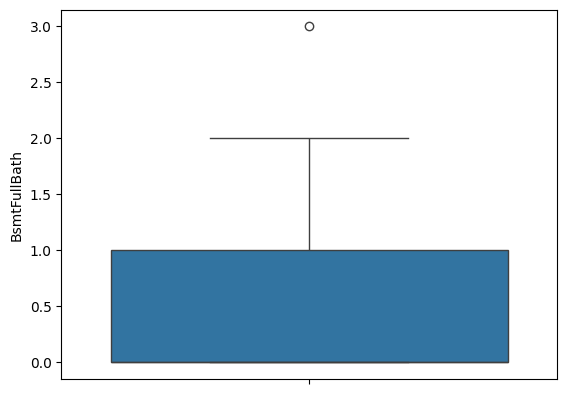

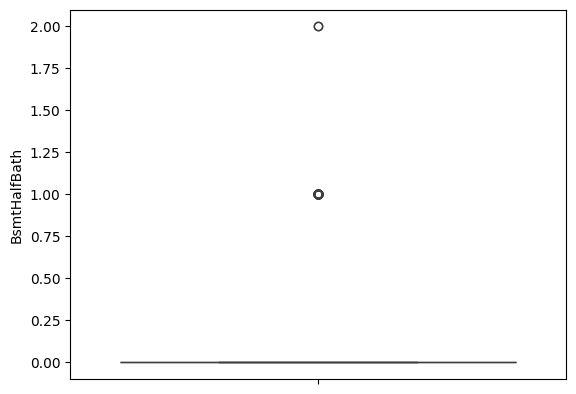

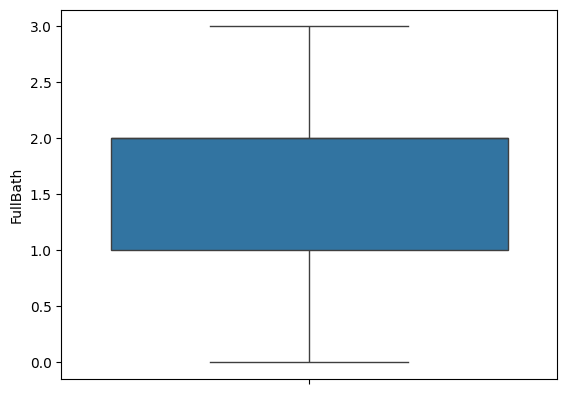

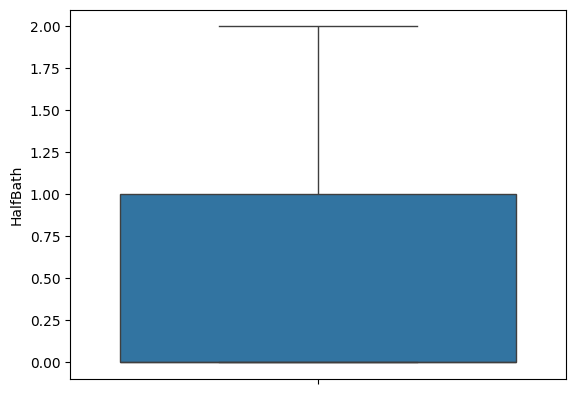

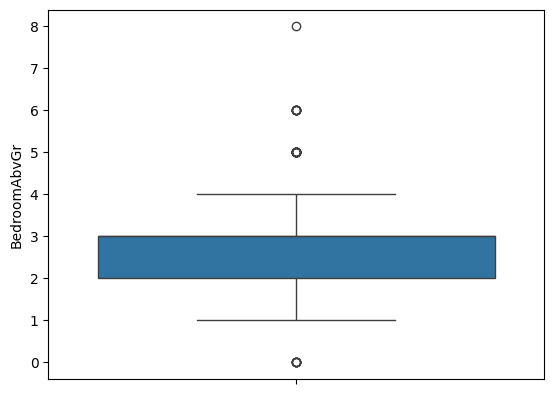

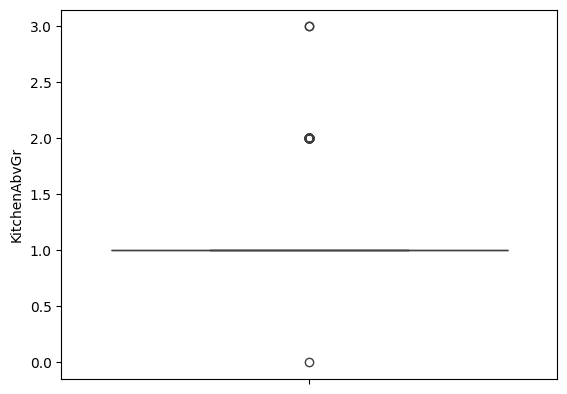

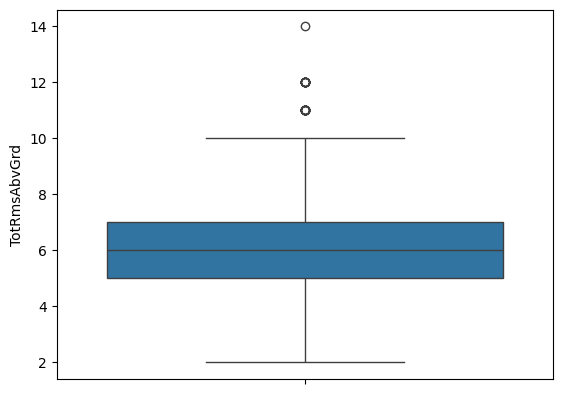

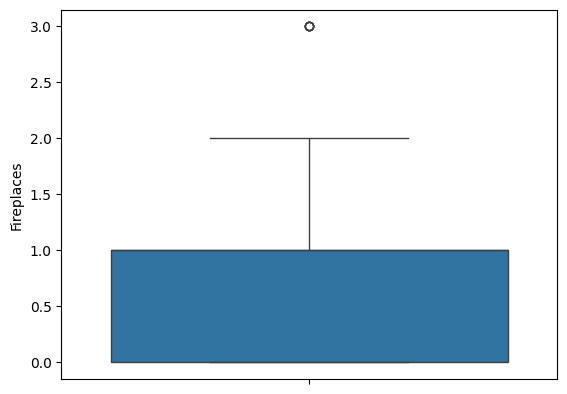

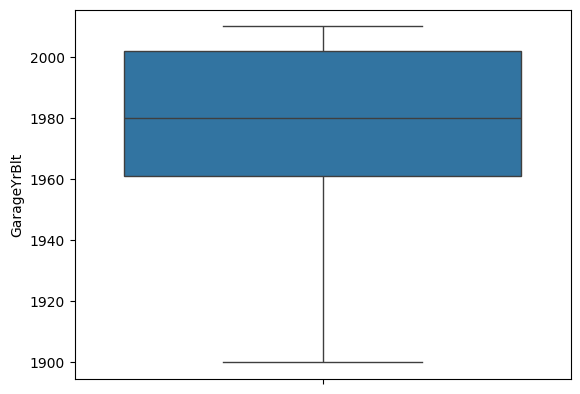

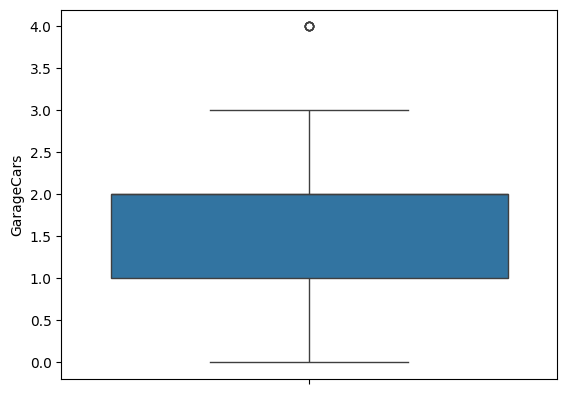

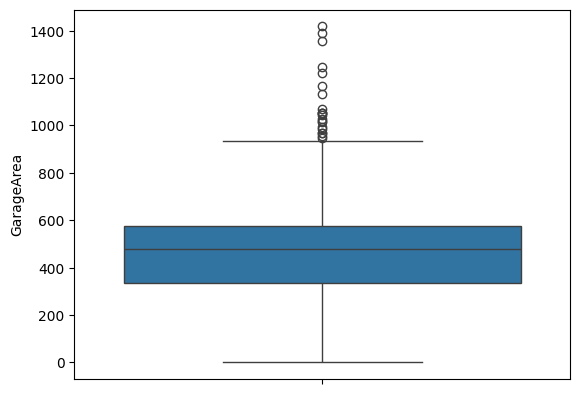

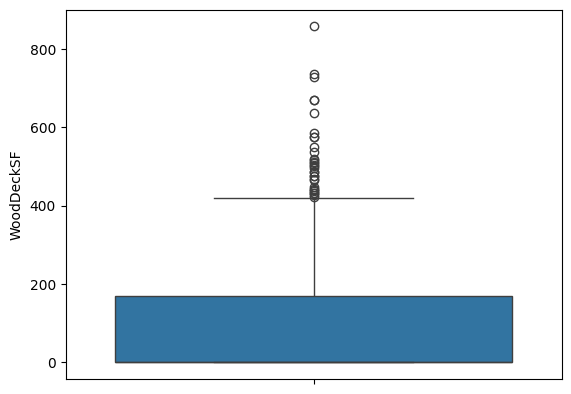

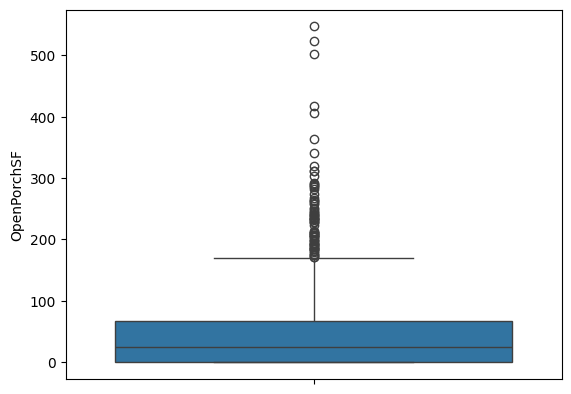

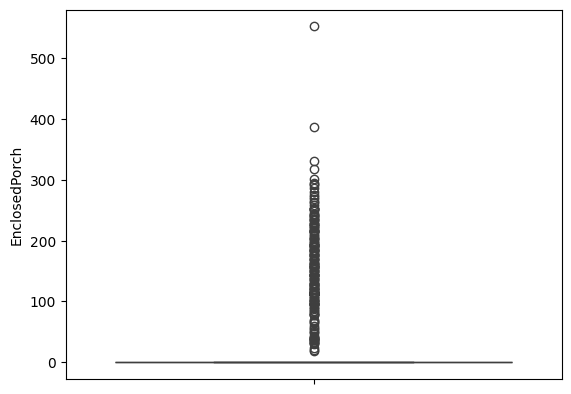

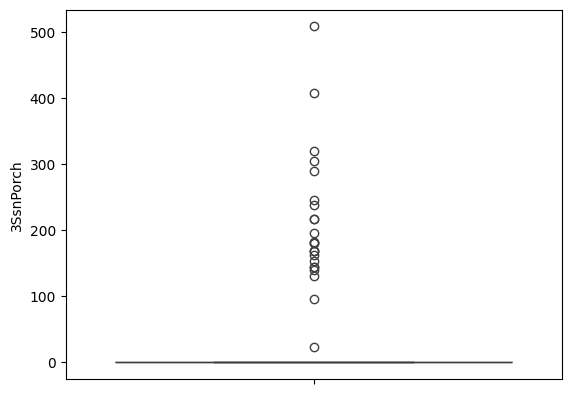

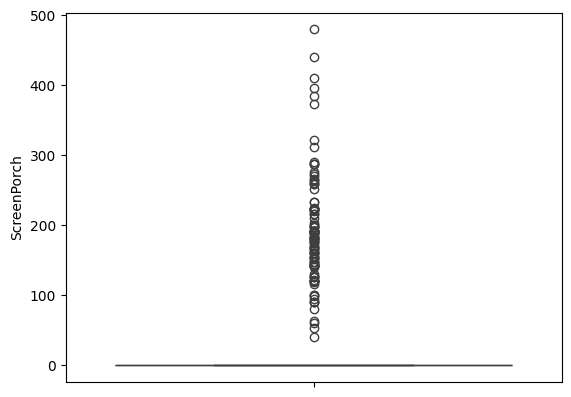

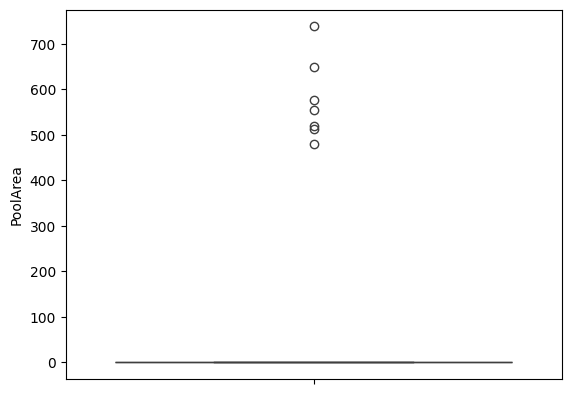

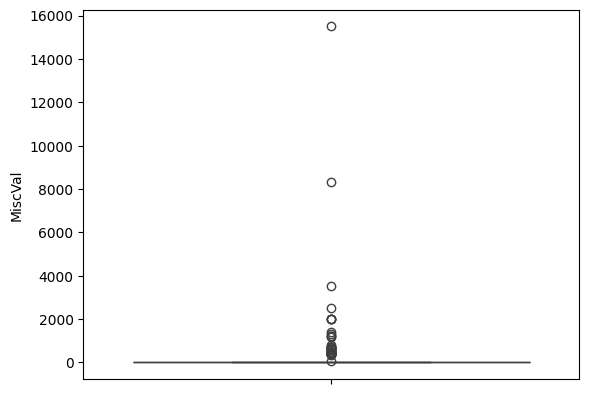

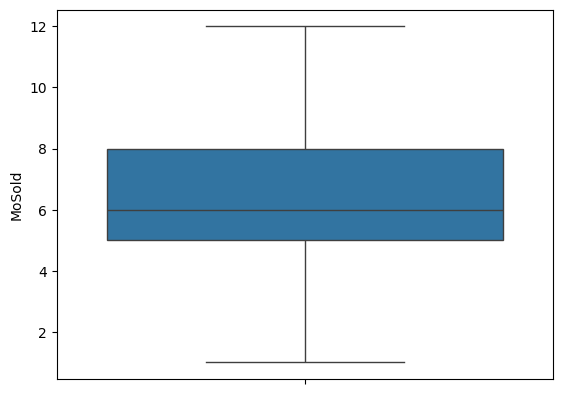

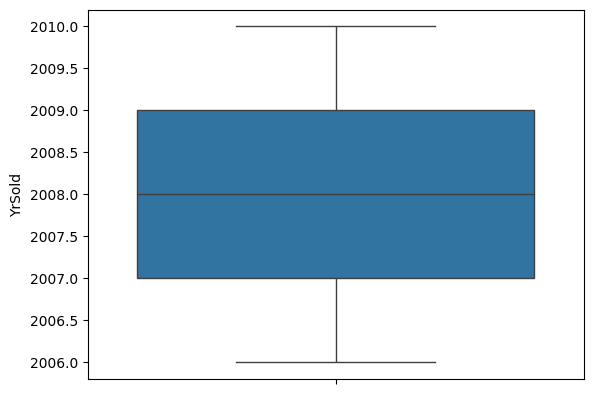

C:\Users\manju\AppData\Local\Temp\ipykernel_28520\731811774.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\manju\AppData\Local\Temp\ipykernel_28520\2433723477.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [18]:
# Training Data Preprocessing
plot_outliers(independent_training_features)                        # Plotting training features outliers before removing them.
independent_training_features = remove_outliers(independent_training_features)                      # Removing training features outliers using minsozrization with IQR.
plot_outliers(independent_training_features)                        # Plotting training features outliers after removing them.
handling_cat_missing_values(independent_training_features)          # Filling categorical features missing values with most frequent values.
handling_numeric_missing_values(independent_training_features)      # Filling numerical features missing values with mean.
scaling(independent_training_features)                              # Scaling numerical values using StandardScaler.
encoding(independent_training_features)                             # Encoding categorical features using label encoding.

### Read Test Data

In [19]:
test_data = pd.read_csv('test.csv')

In [20]:
# Serparating ID column required for submission csv
test_data_id = test_data.pop('Id').to_frame()

In [21]:
test_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

### Preprocessing Test Data

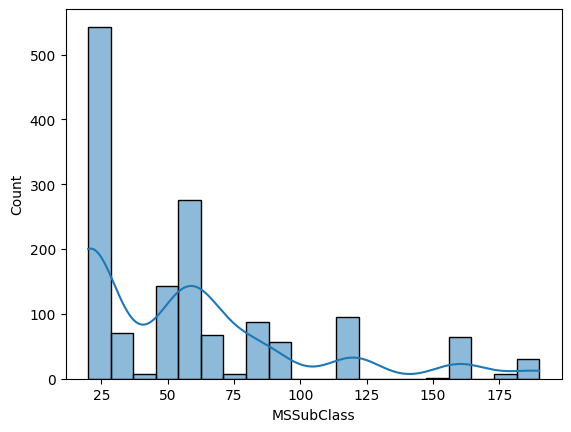

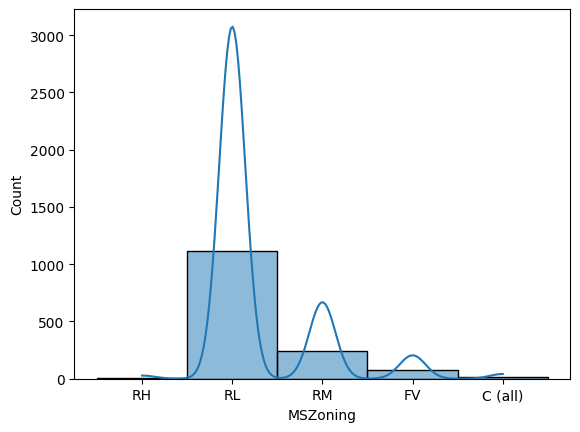

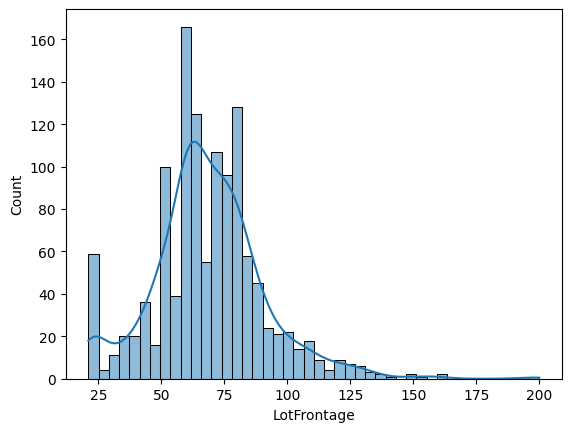

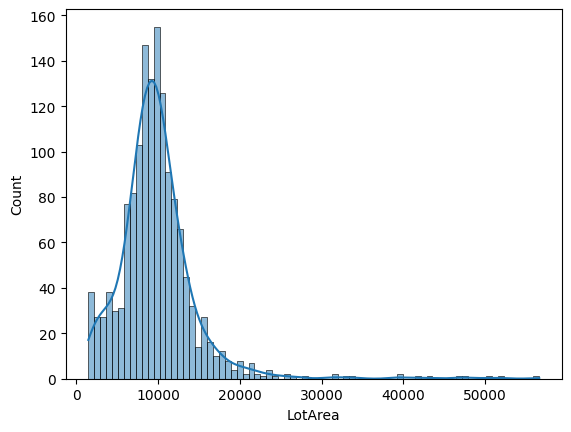

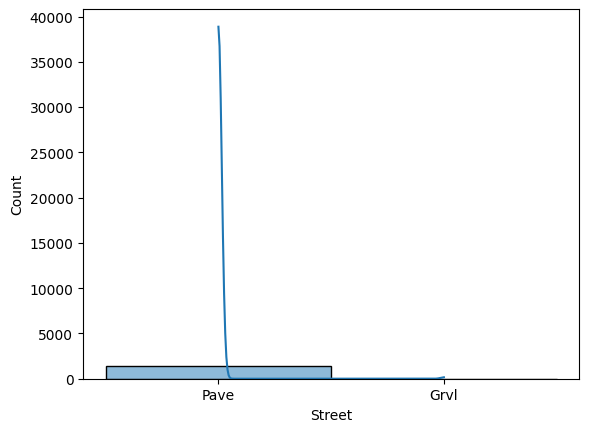

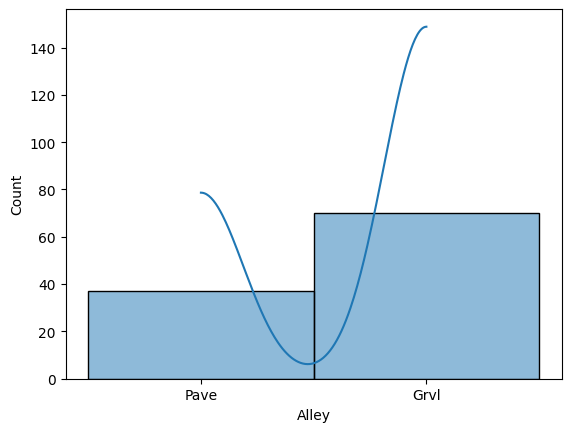

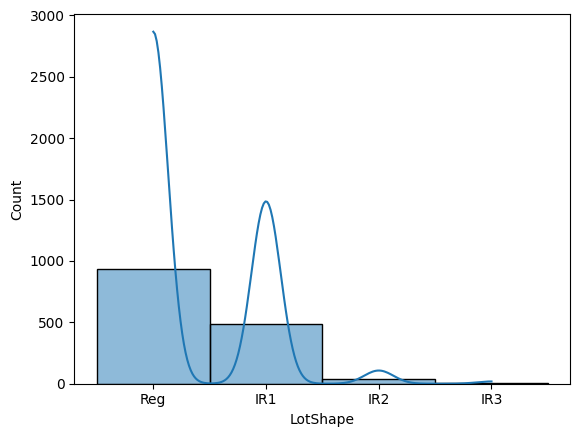

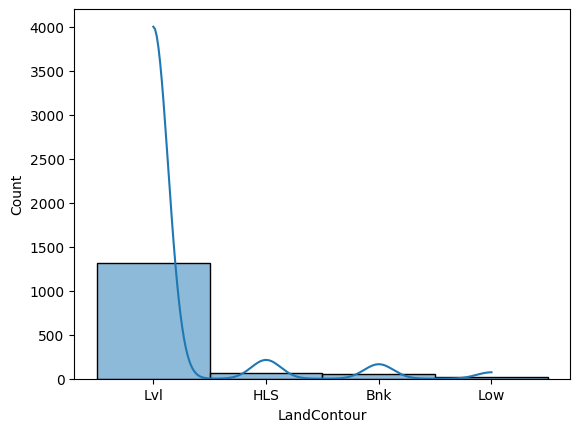

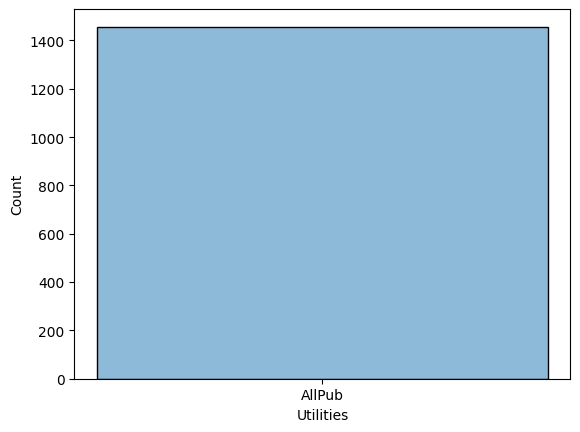

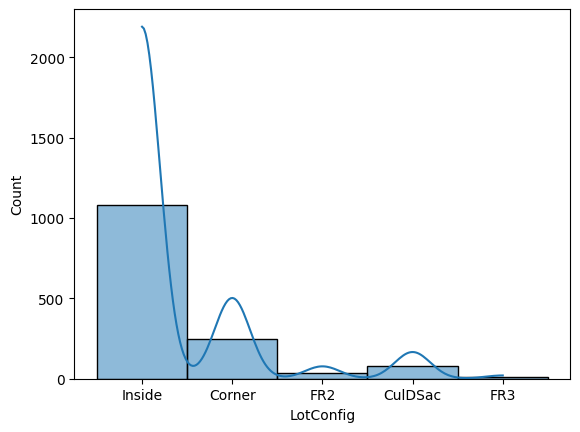

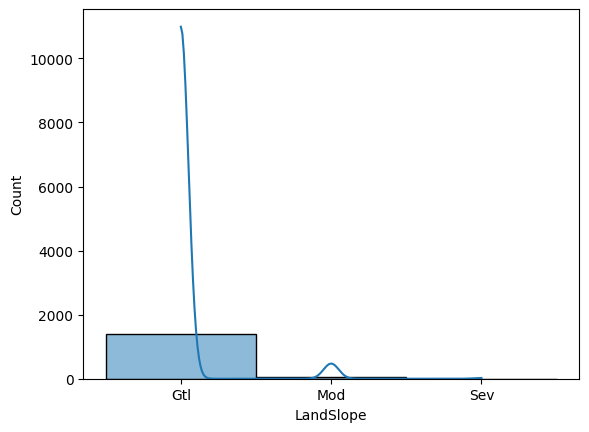

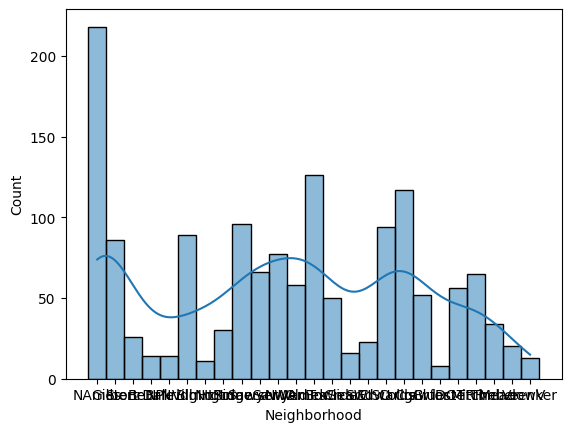

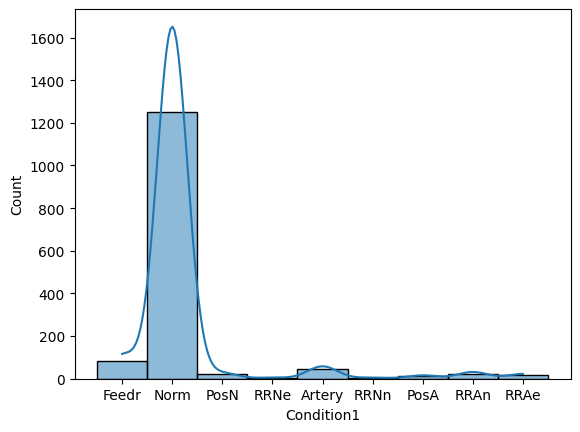

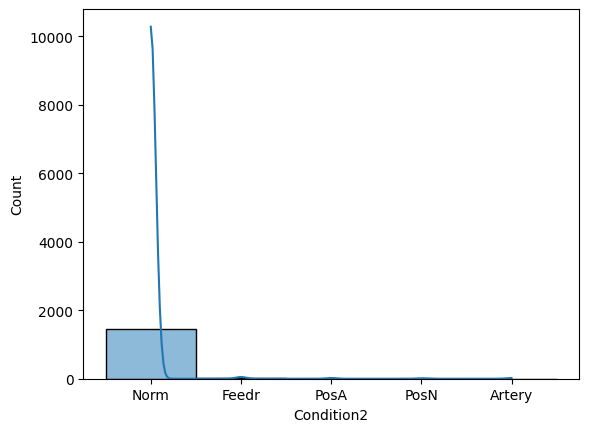

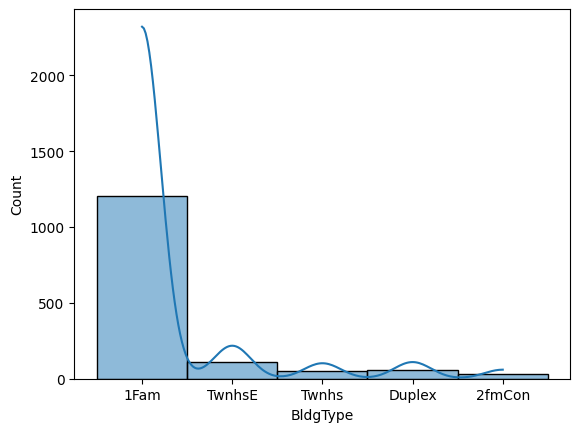

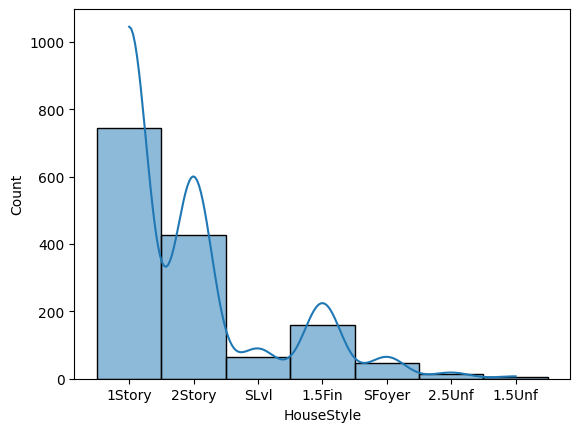

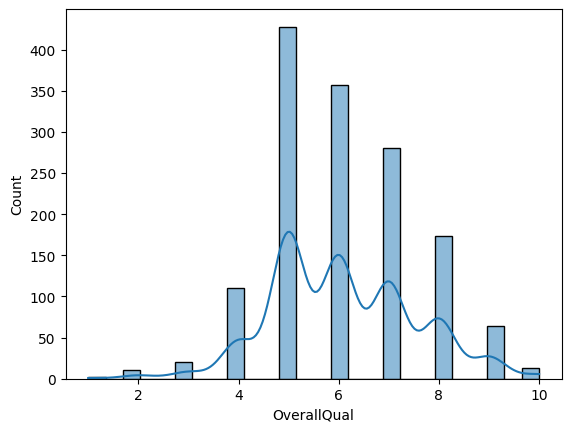

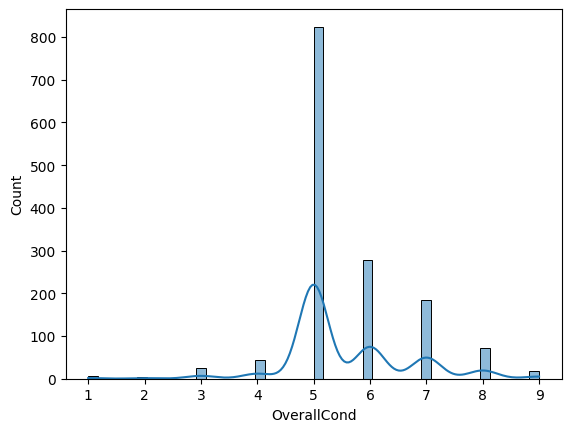

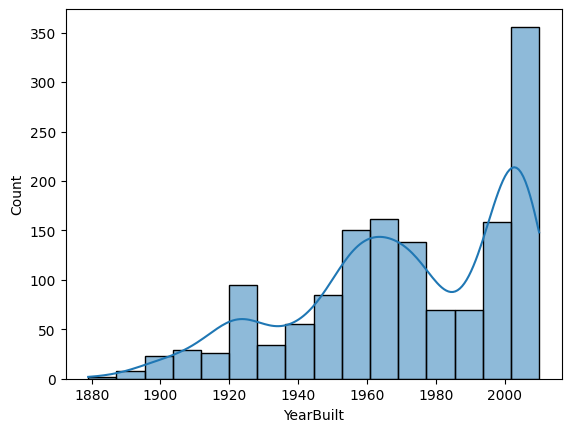

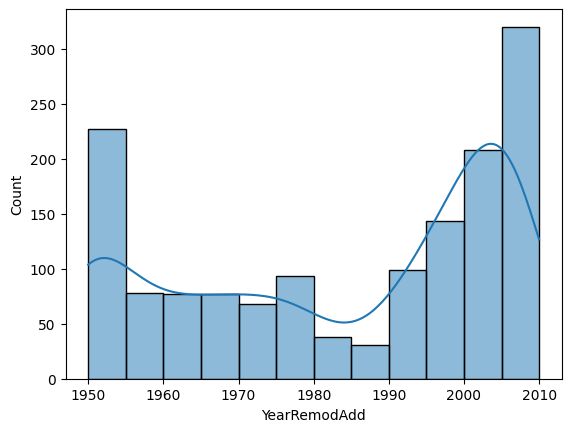

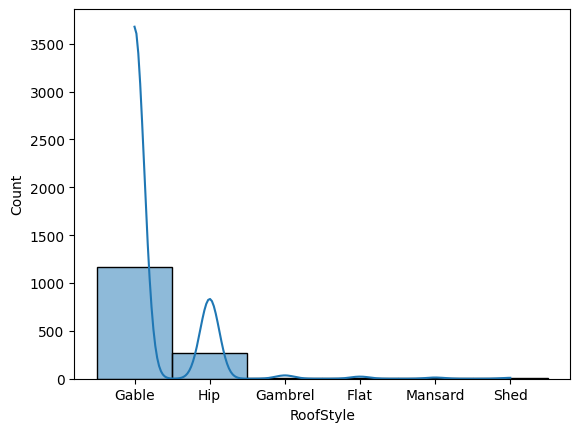

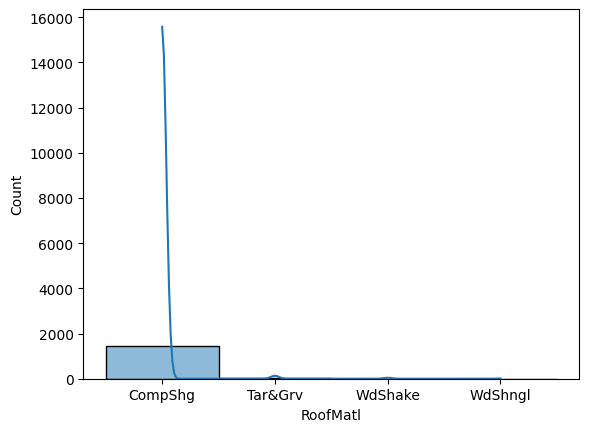

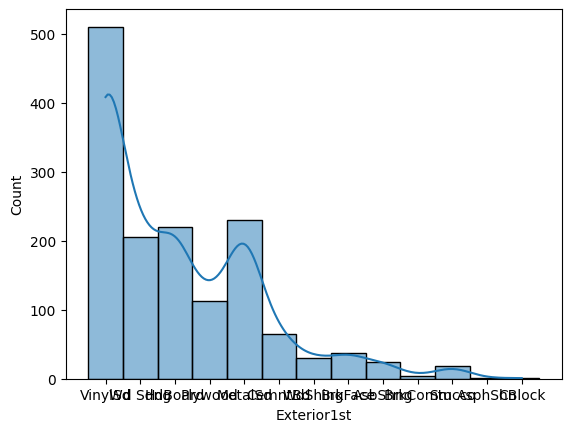

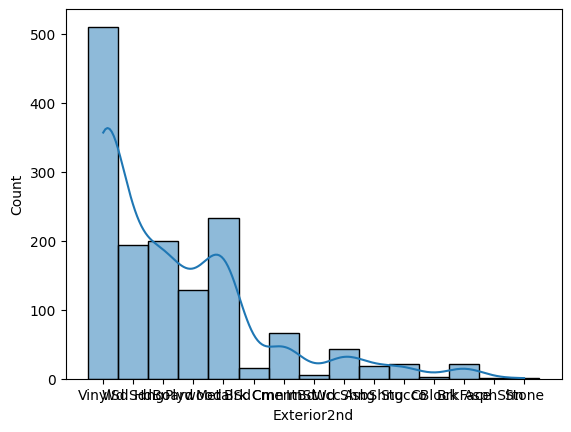

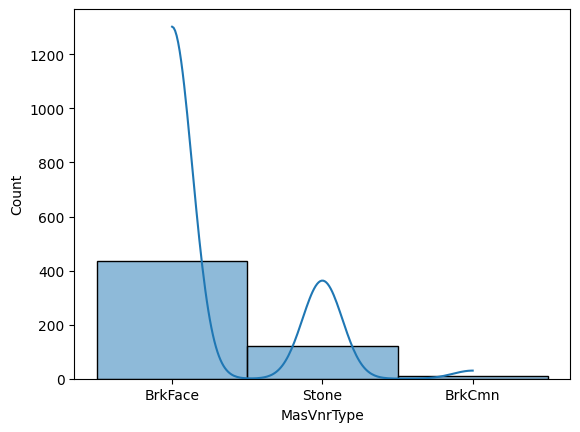

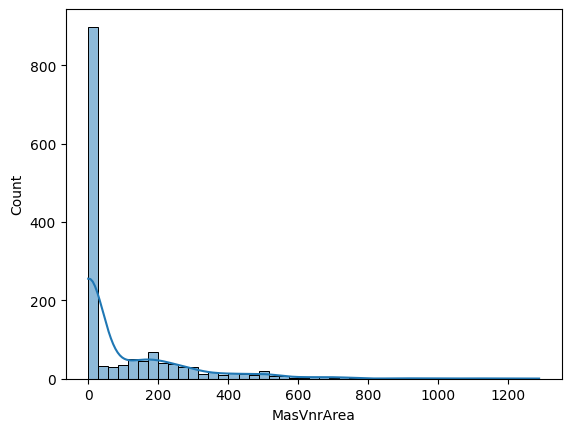

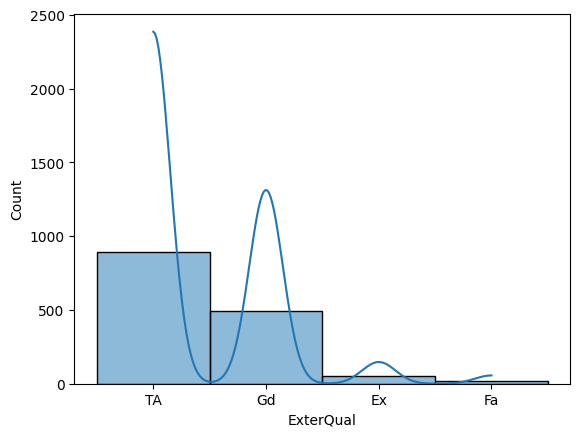

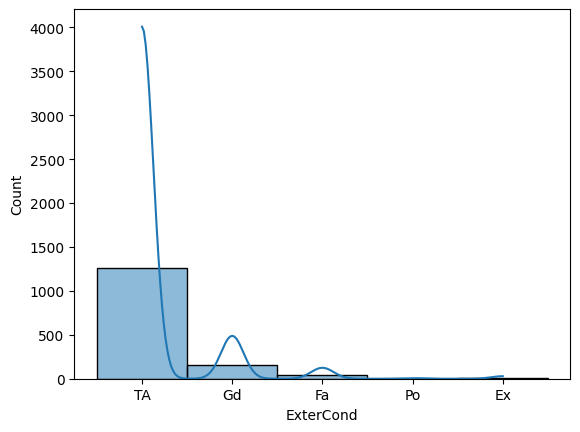

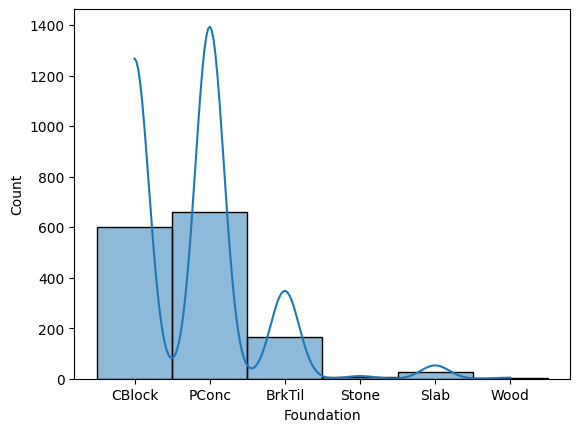

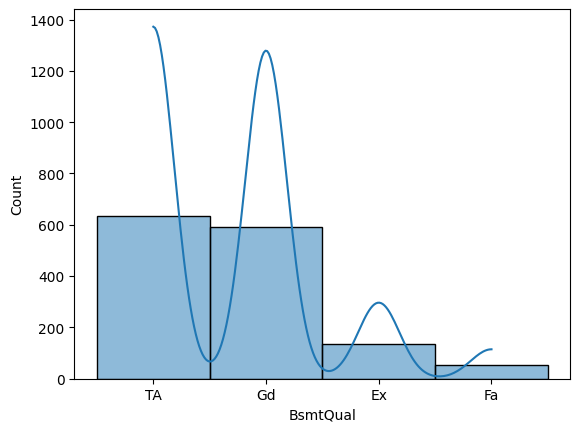

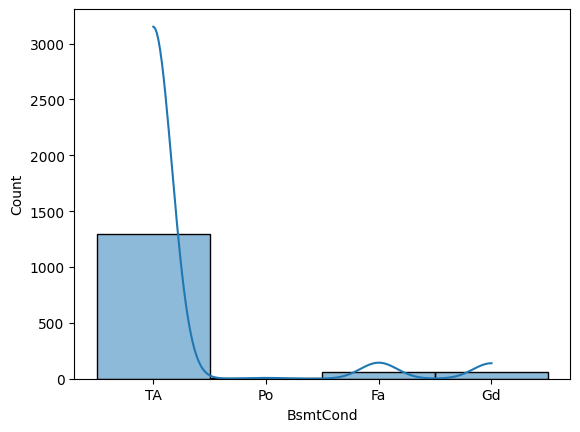

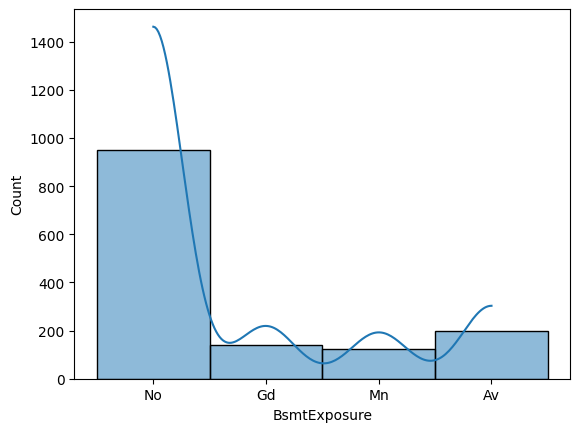

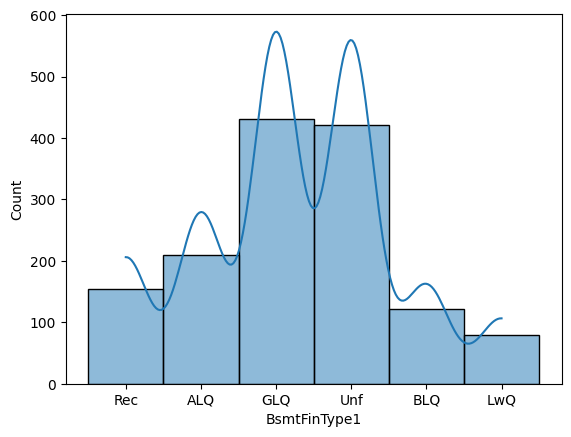

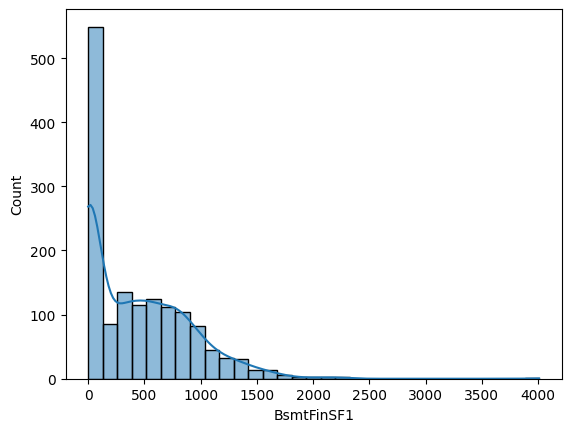

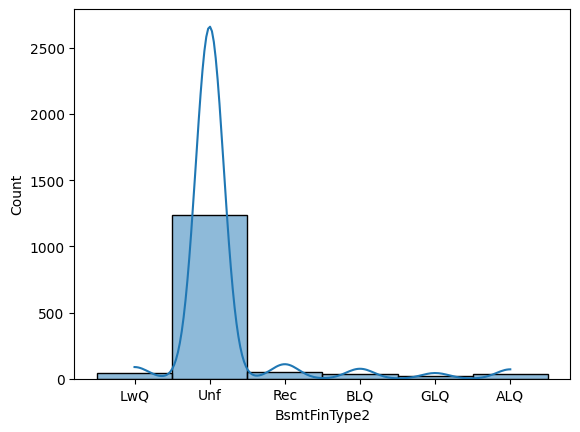

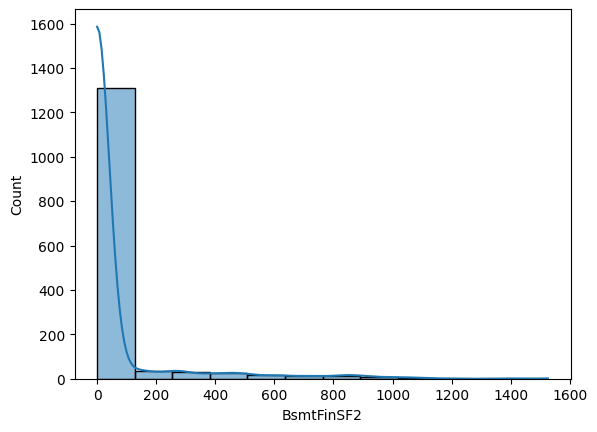

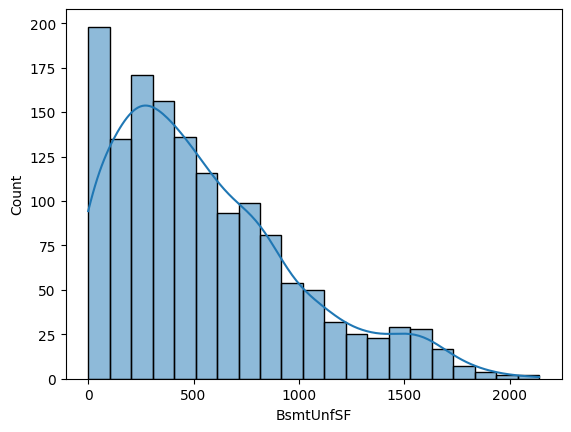

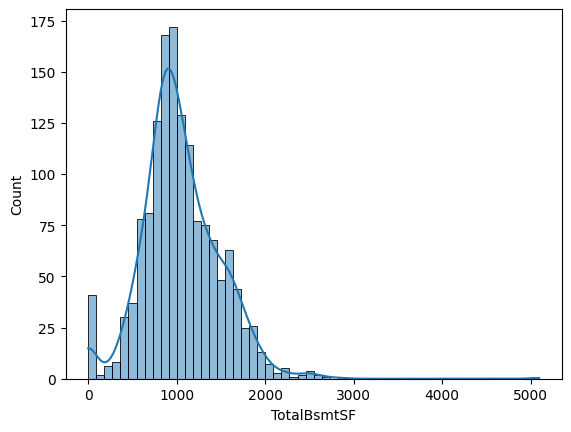

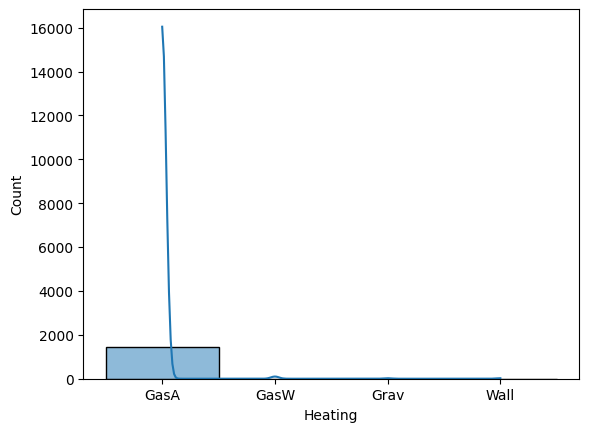

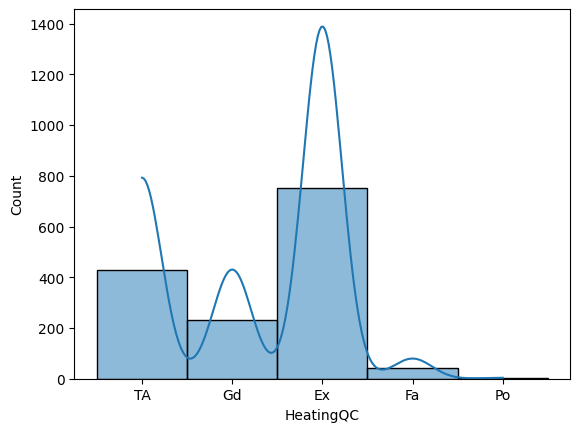

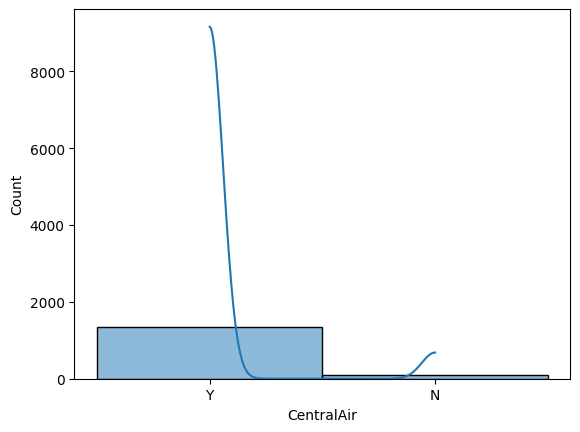

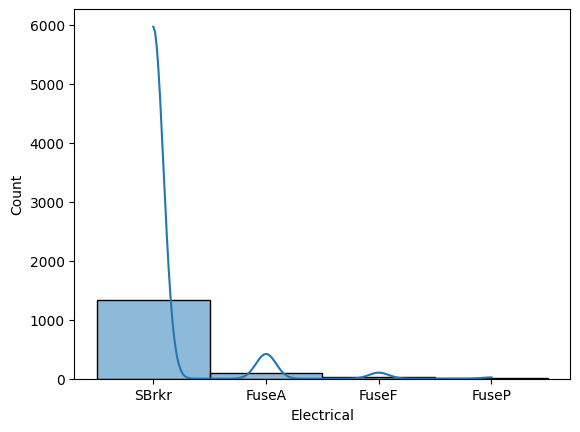

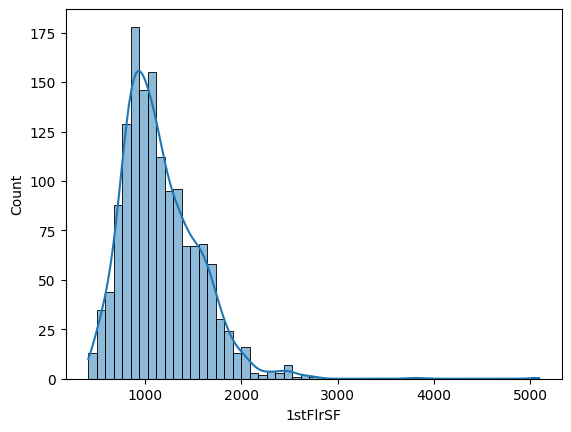

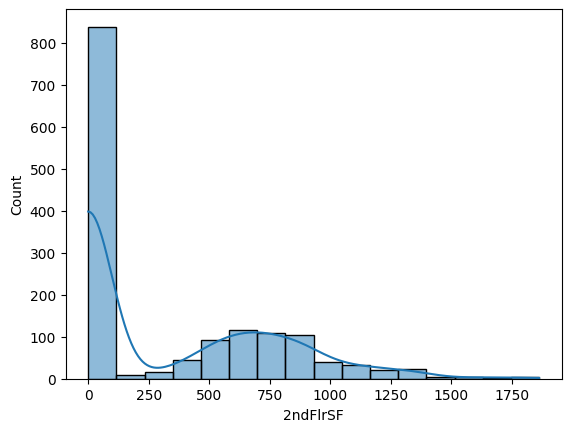

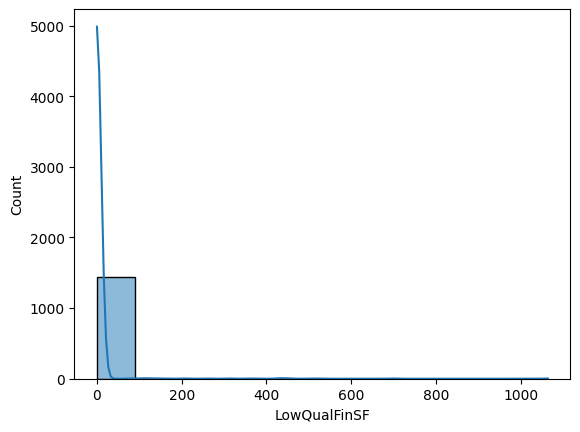

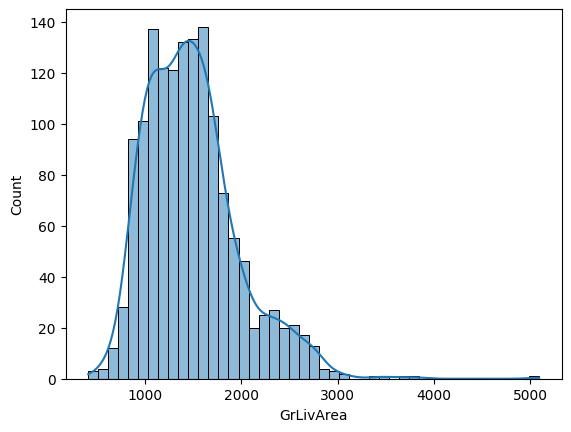

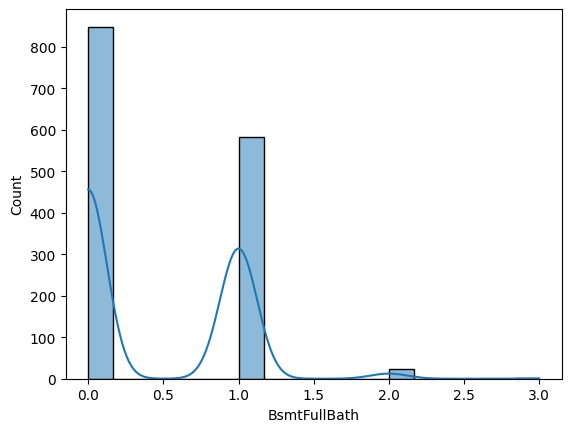

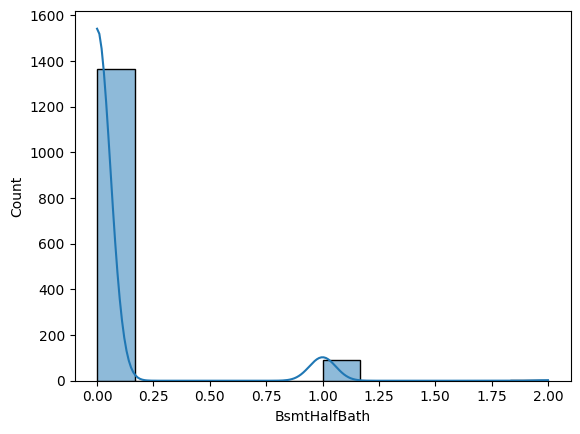

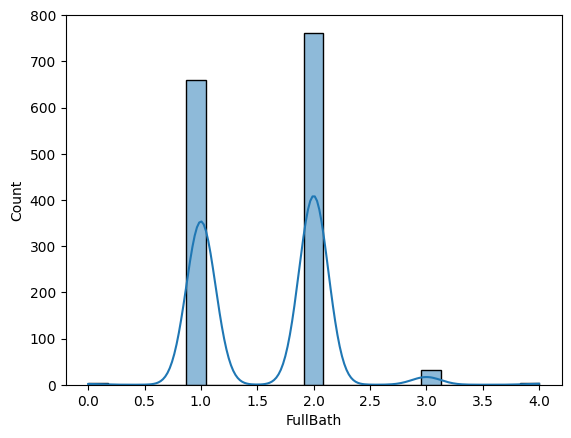

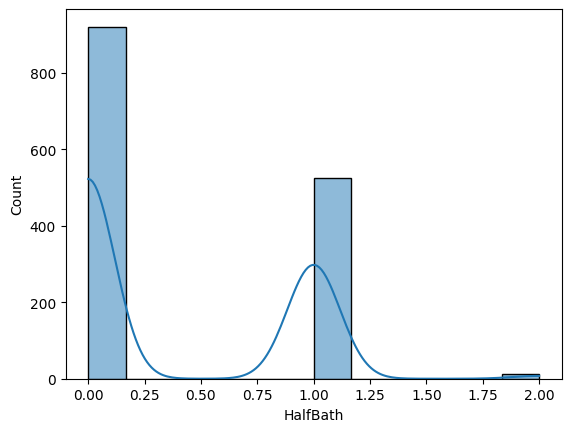

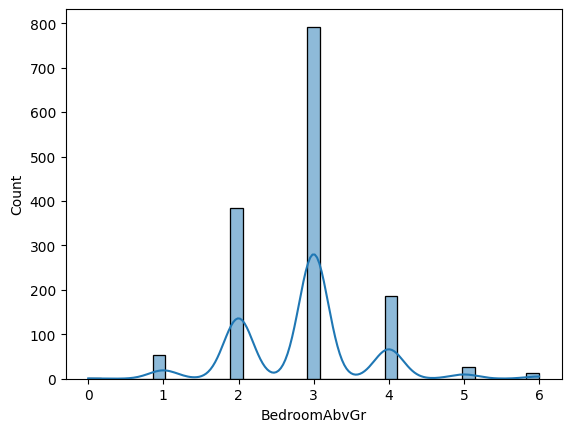

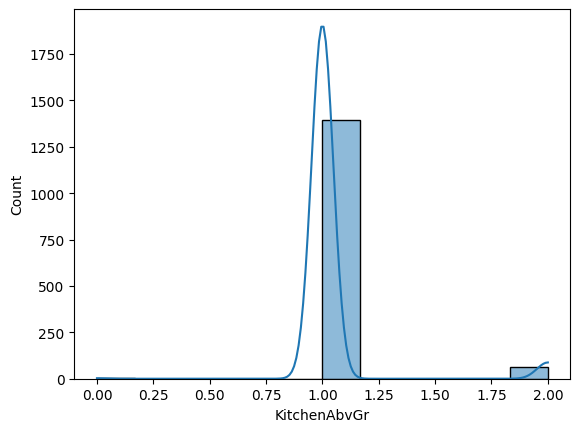

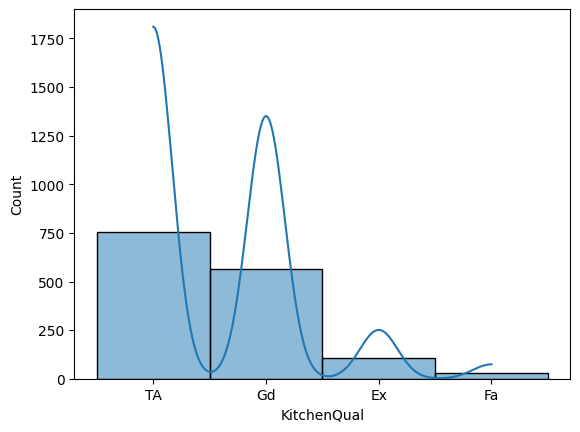

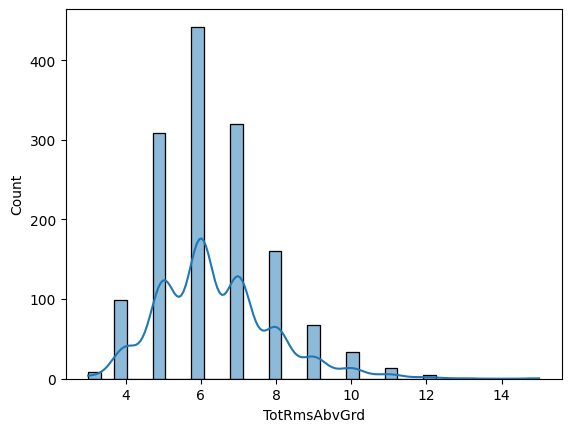

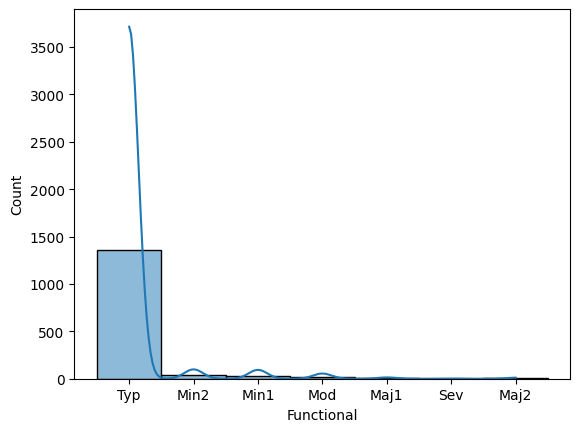

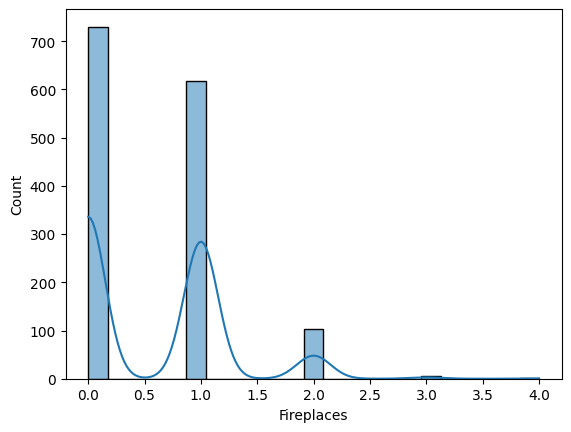

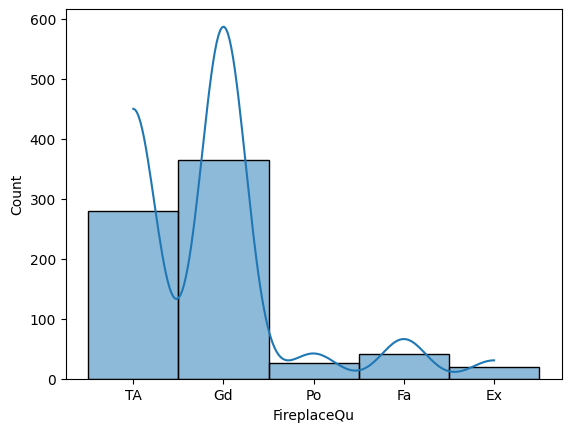

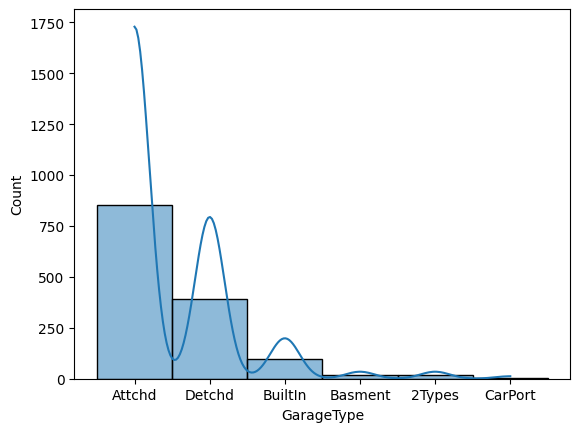

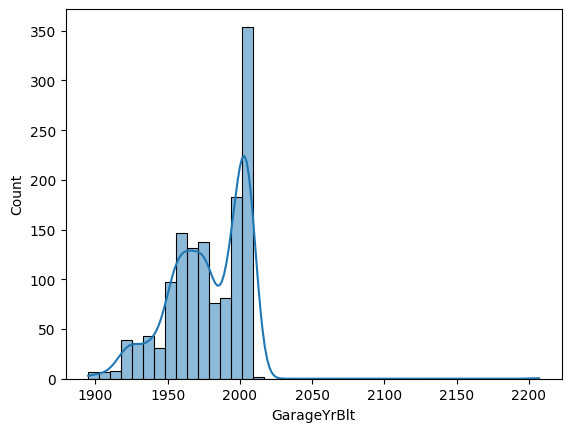

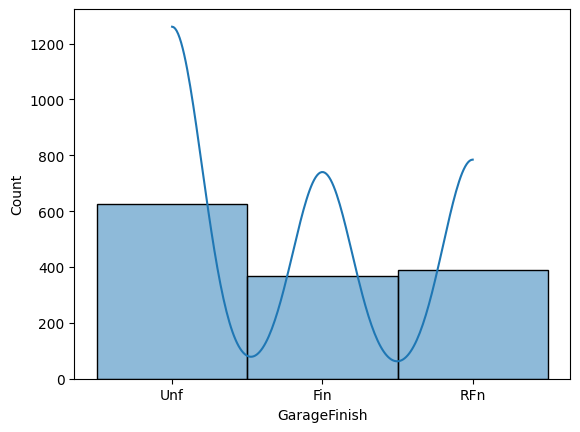

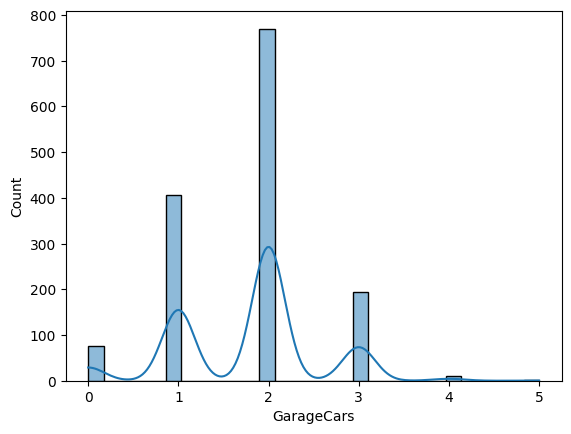

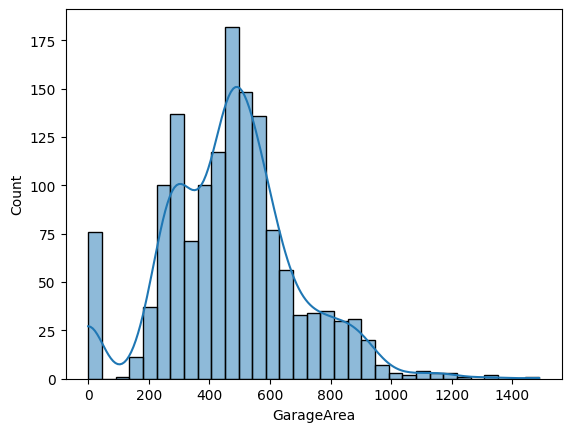

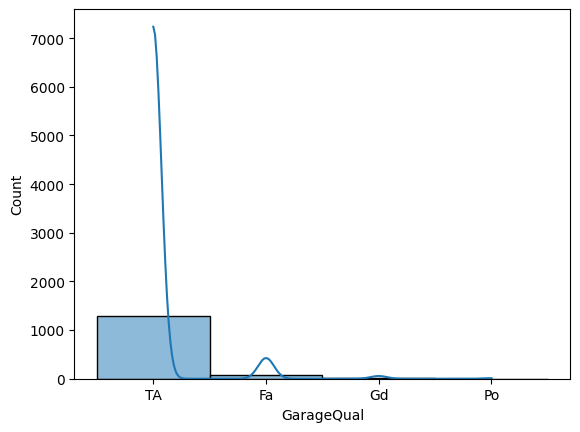

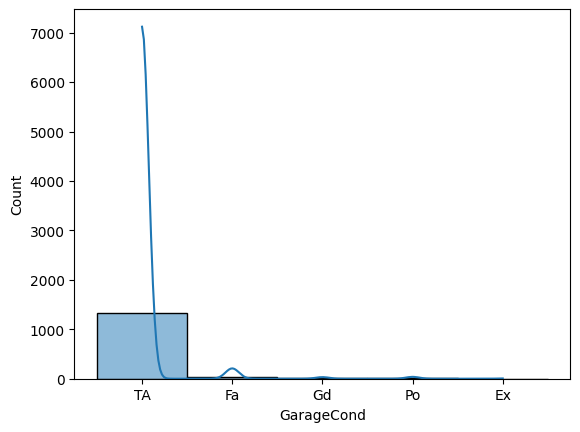

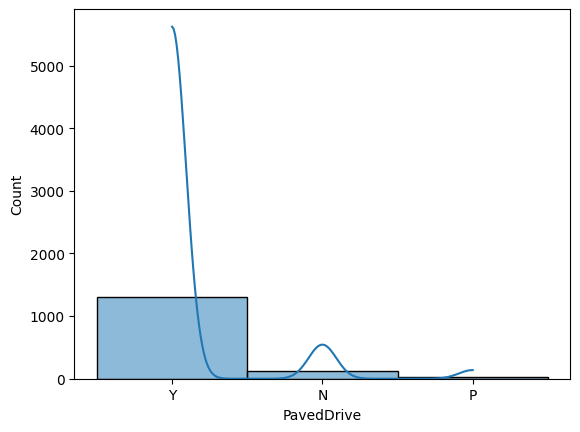

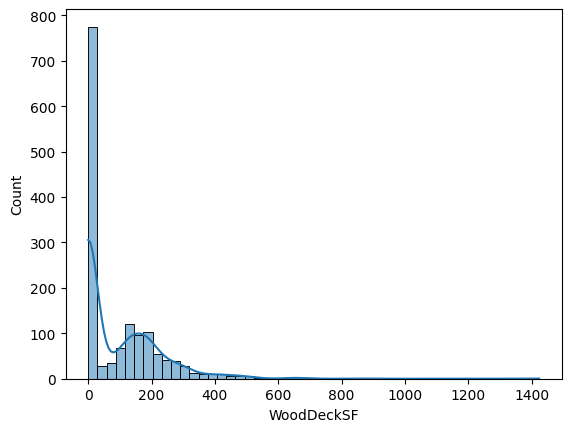

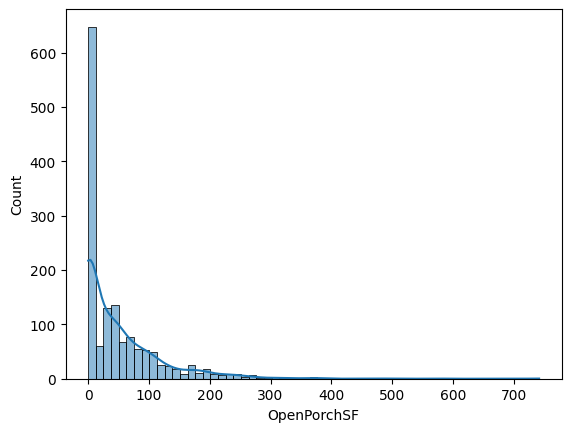

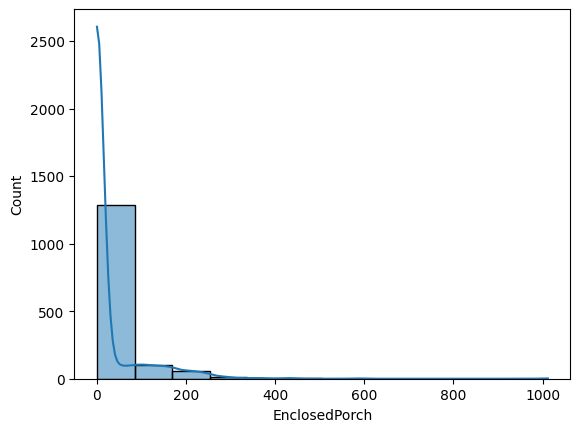

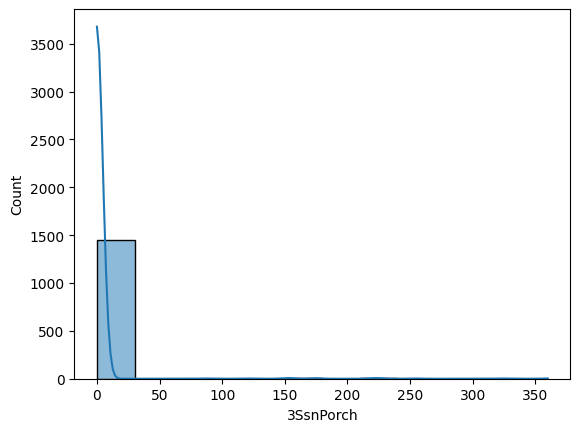

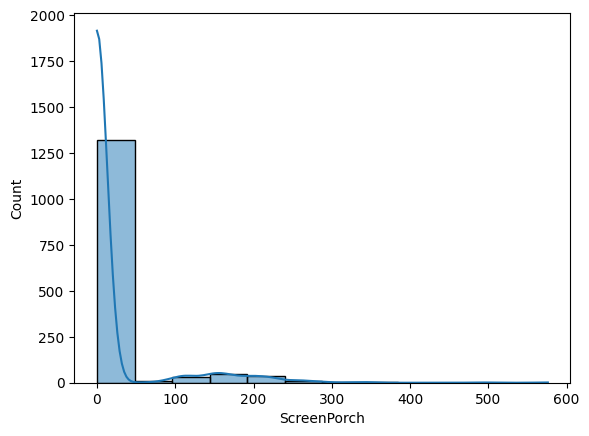

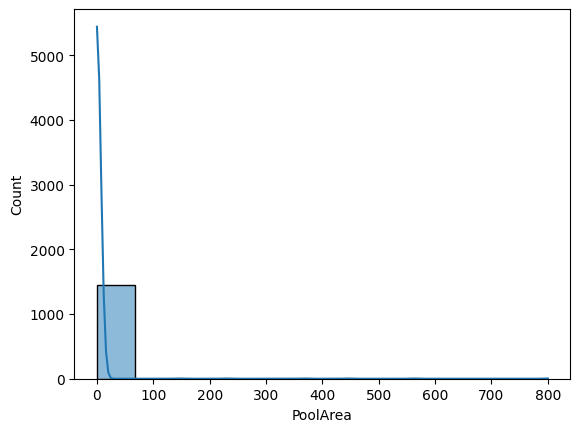

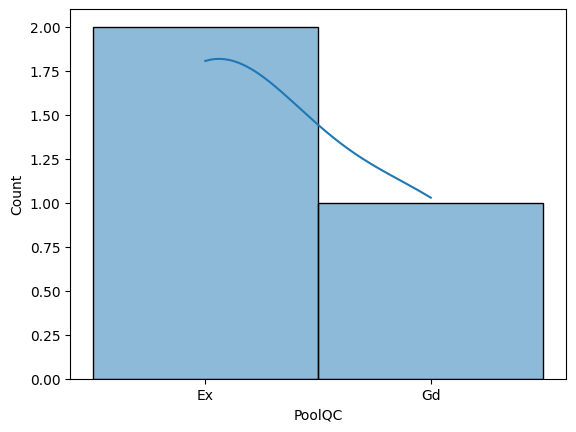

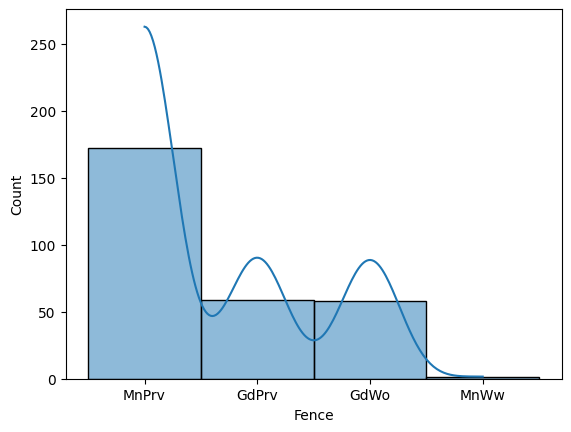

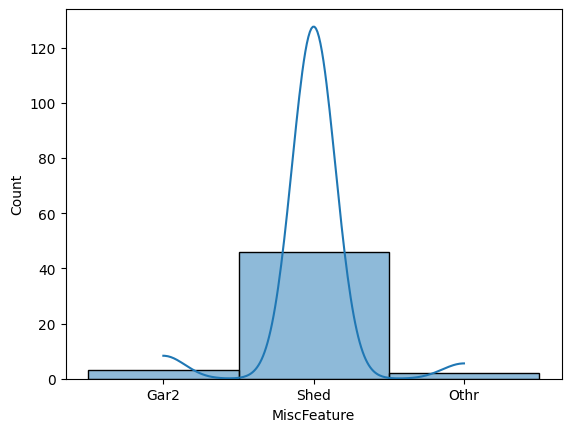

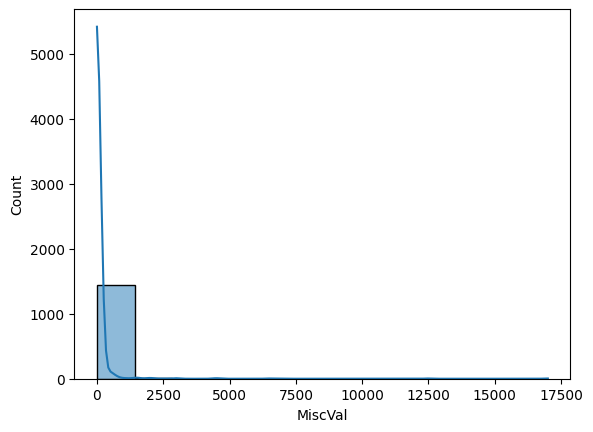

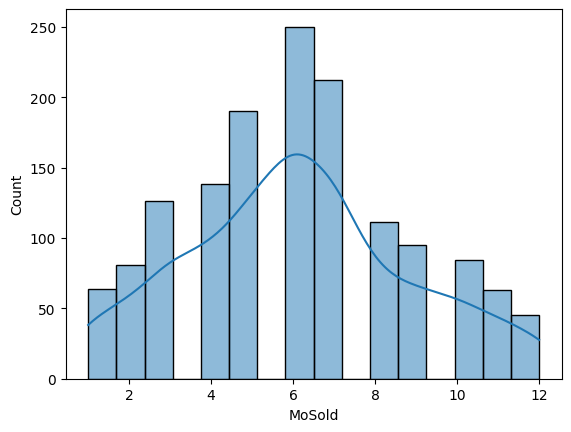

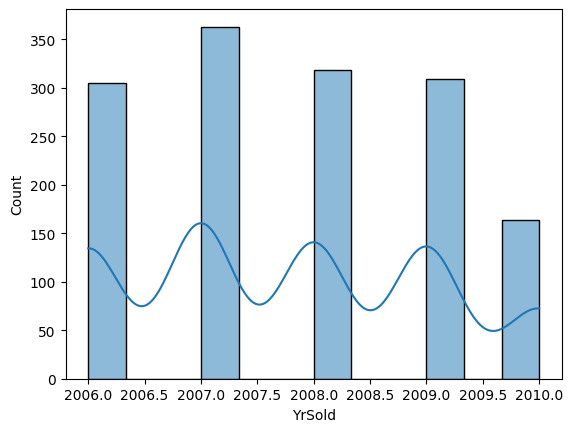

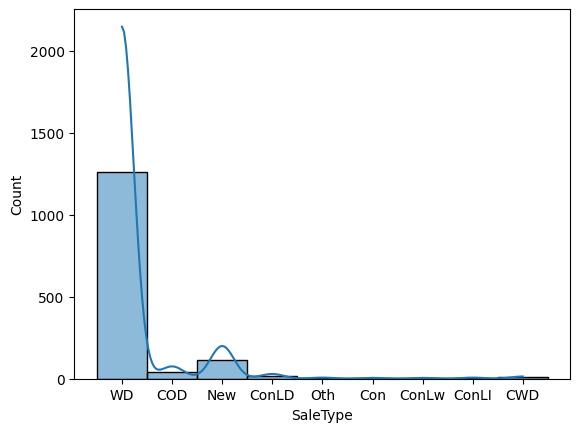

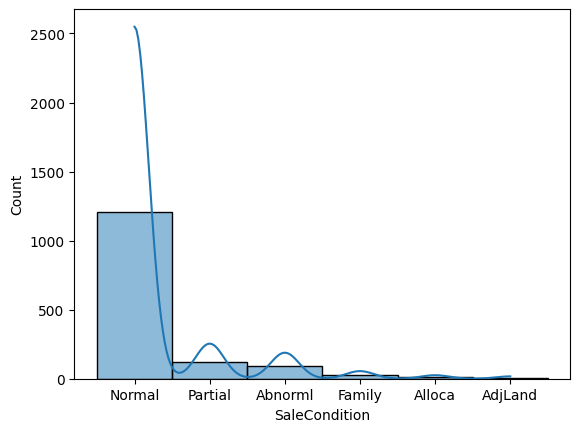

In [22]:
# Check train data normalization and get insights
check_normalization(test_data)

#### Insight

* Only few of the test data features have most normal distribution data like LotFrontage, LotArea, TotalBsmtSF, lstFlrSF, GrLivArea

#### conclusion

* Use IQR method for outlier removal as it best suited for the data which is not normalized and skewed.

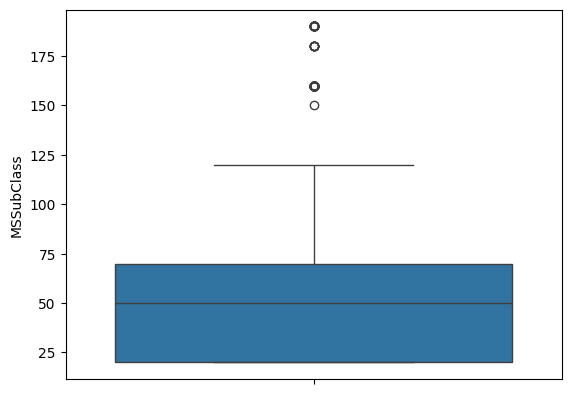

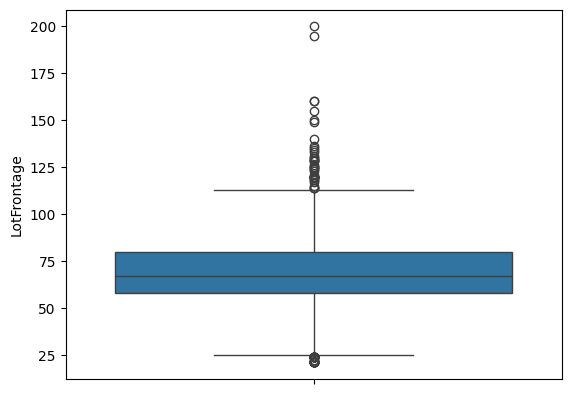

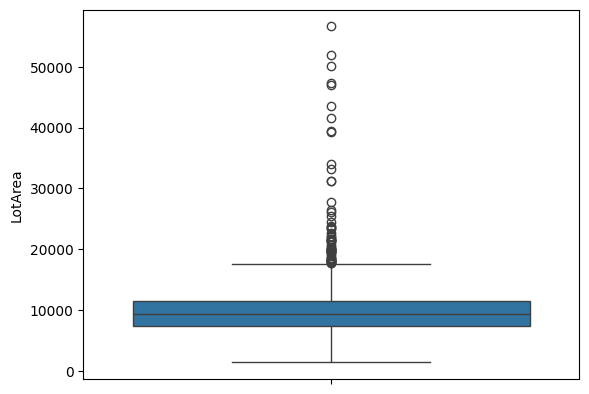

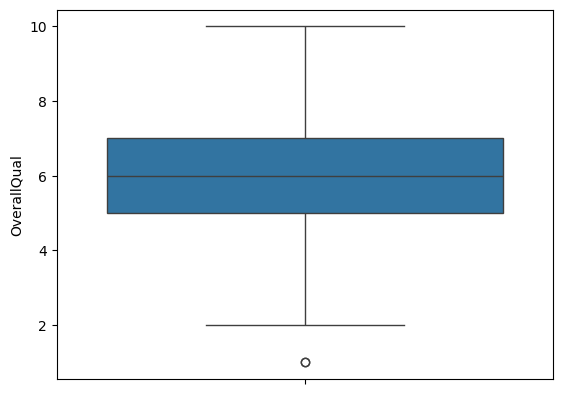

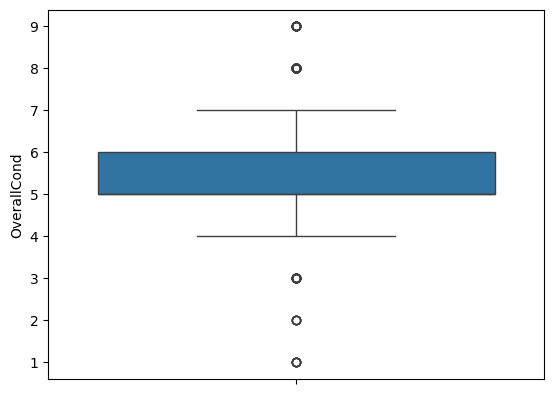

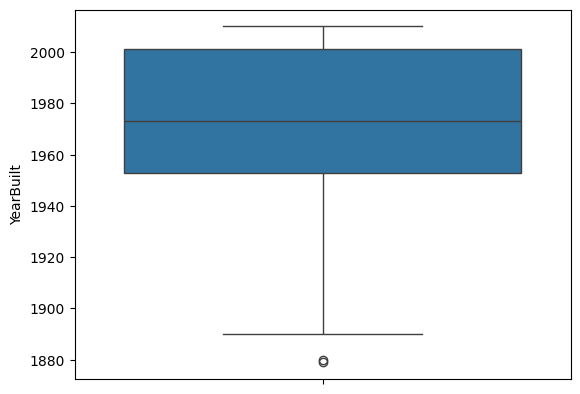

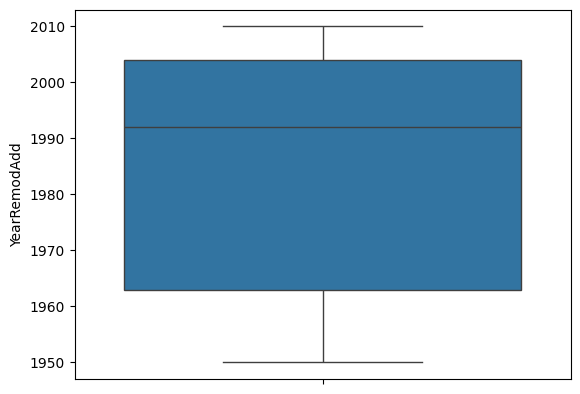

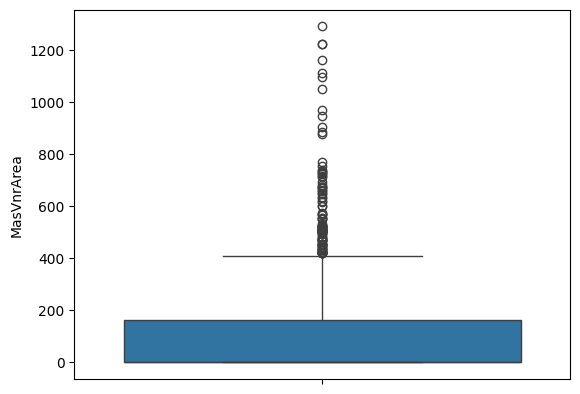

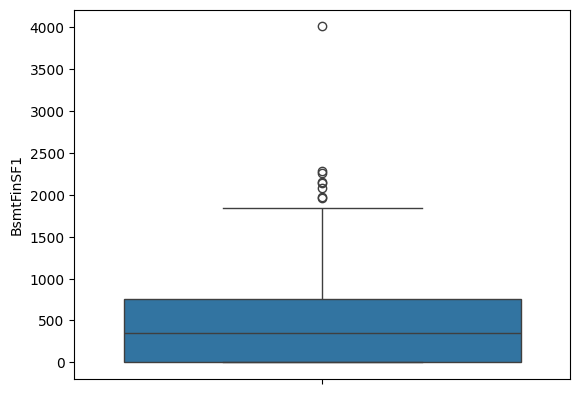

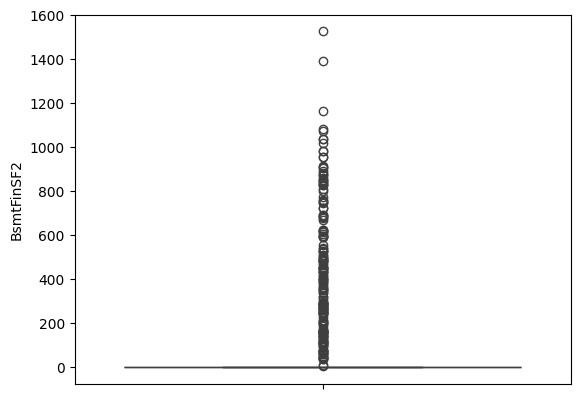

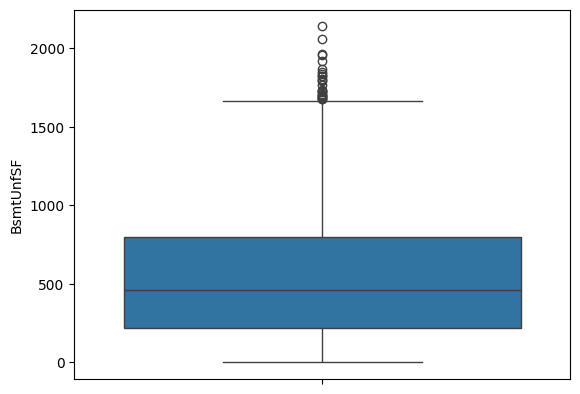

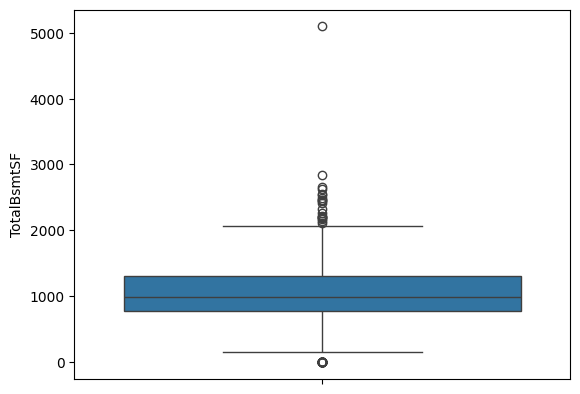

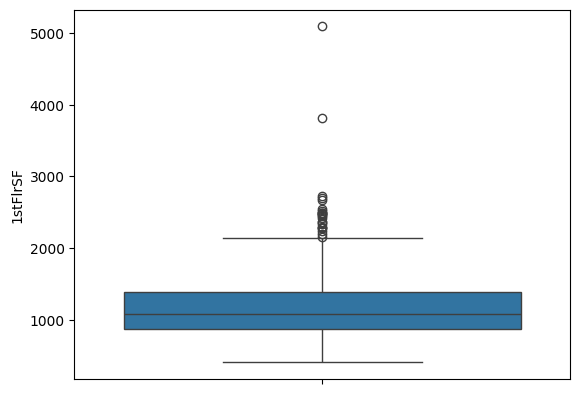

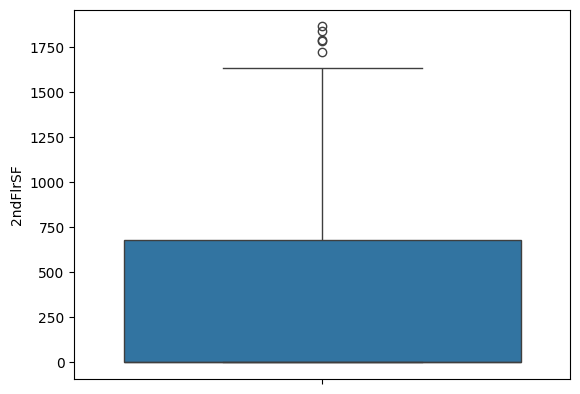

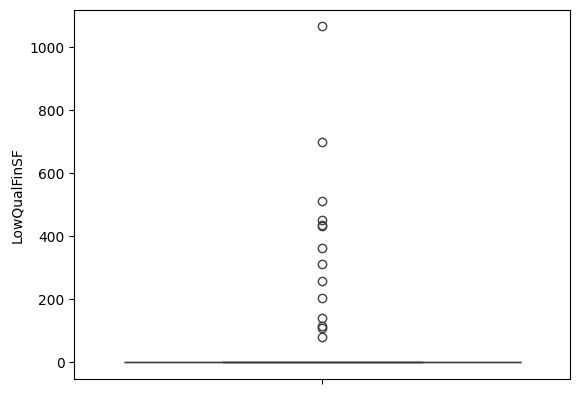

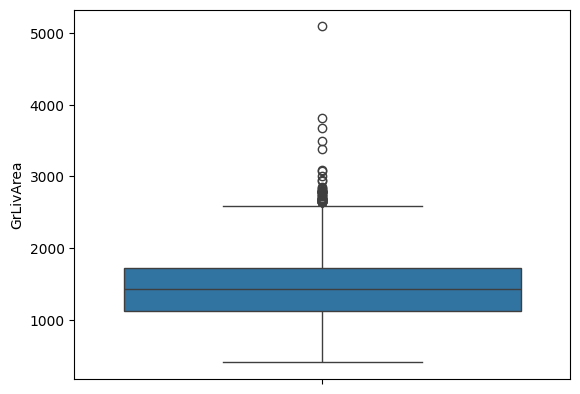

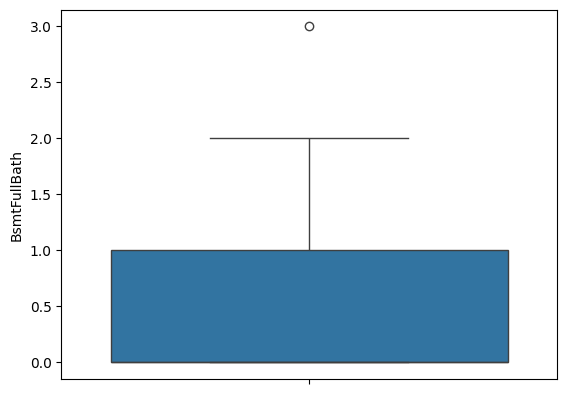

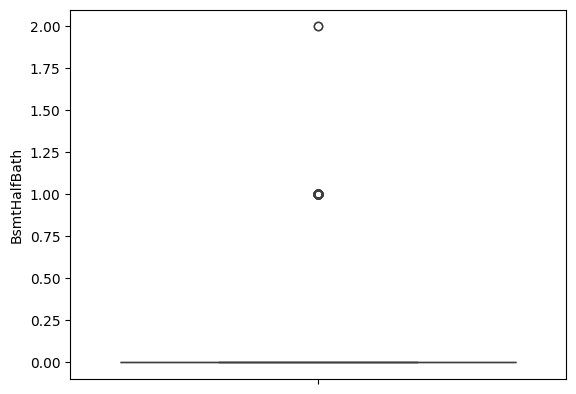

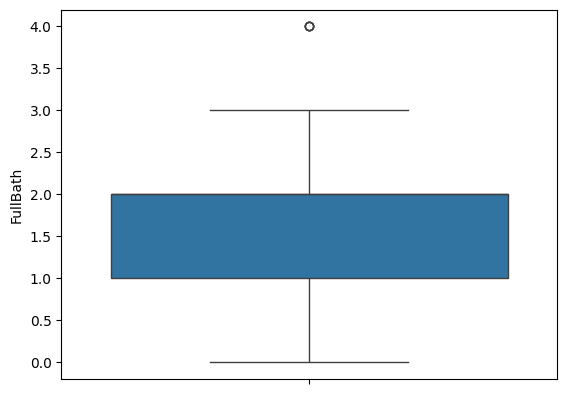

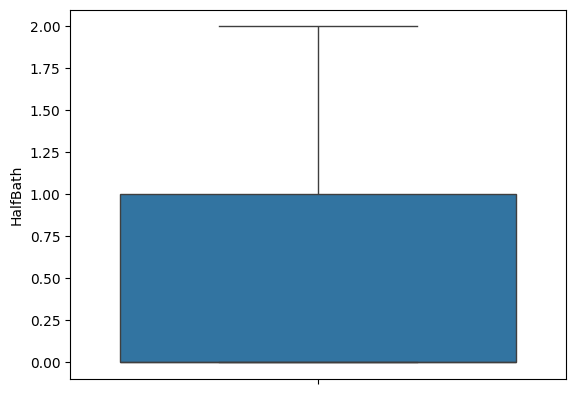

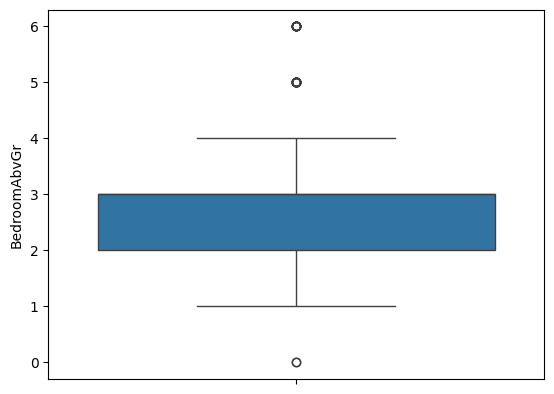

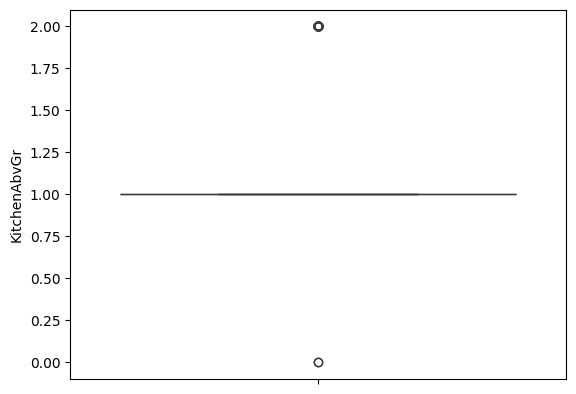

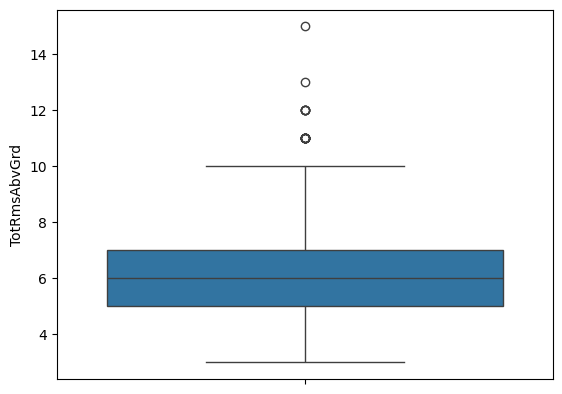

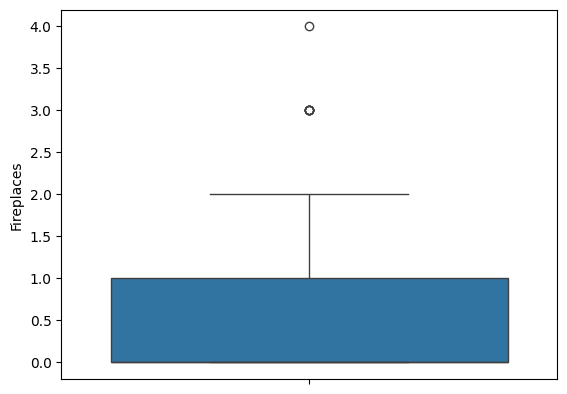

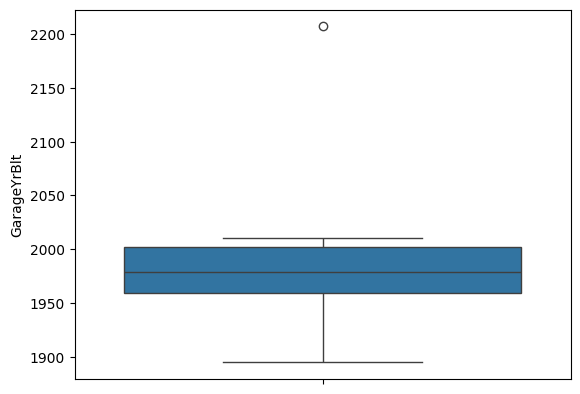

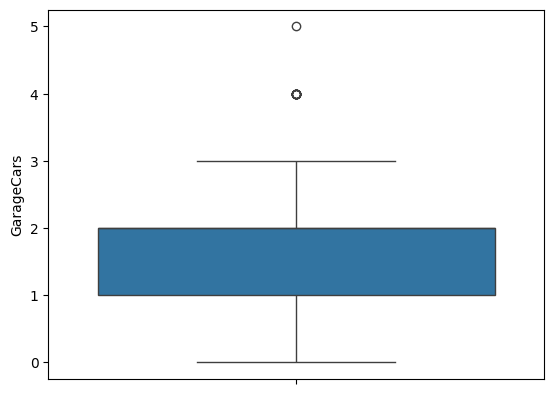

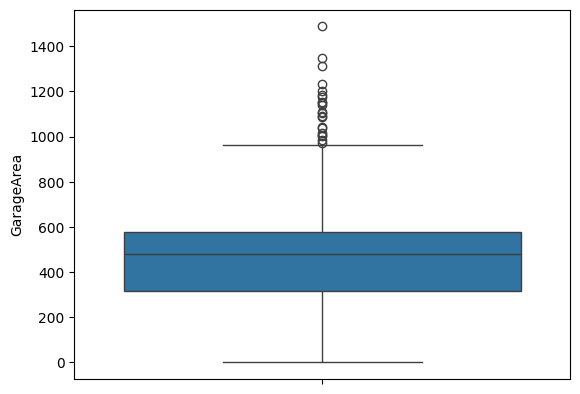

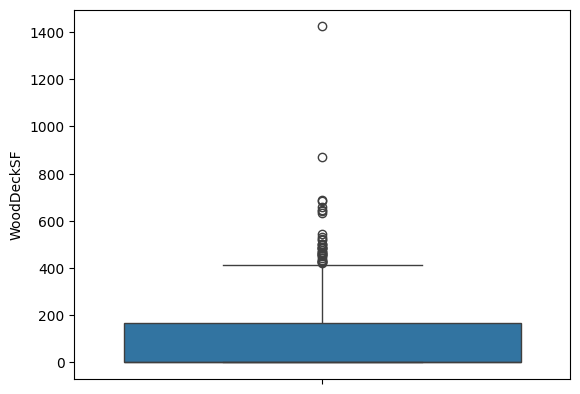

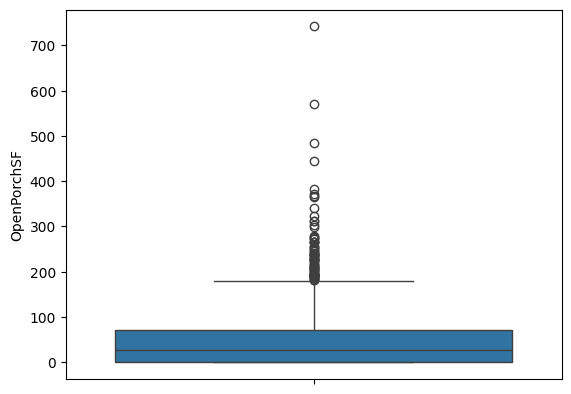

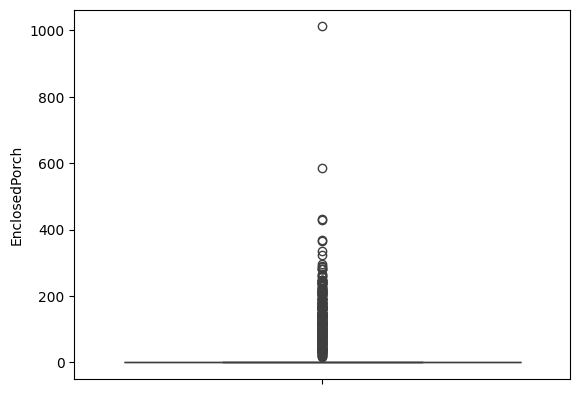

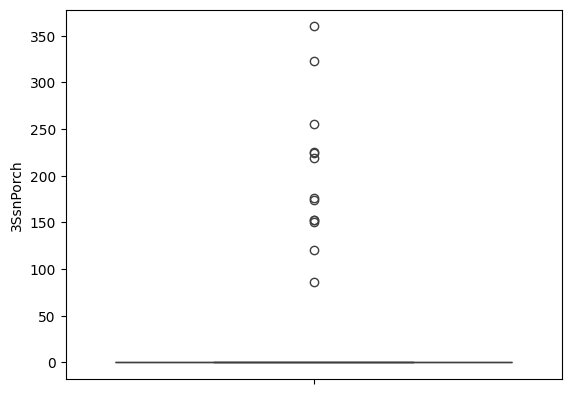

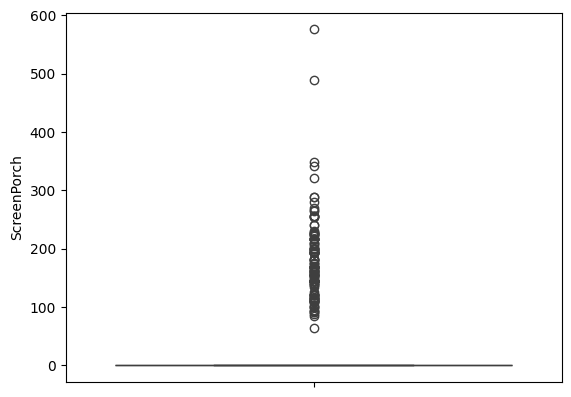

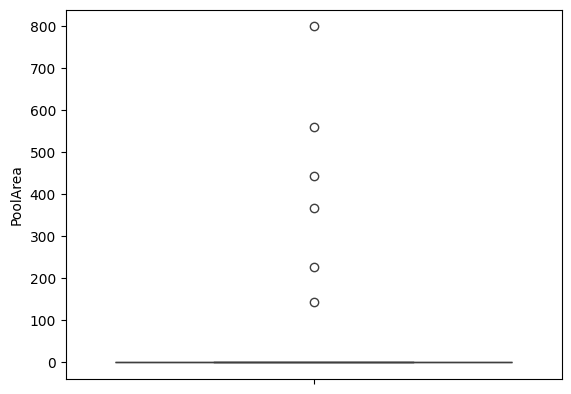

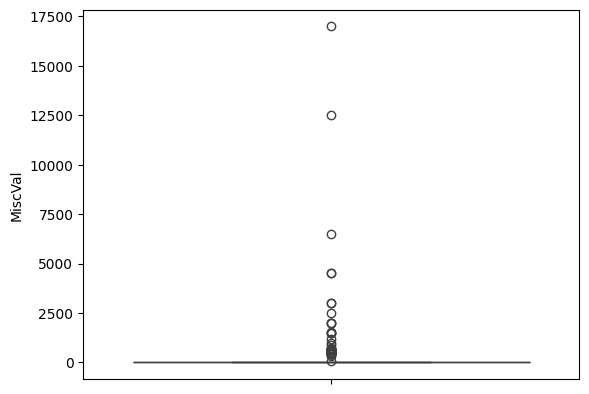

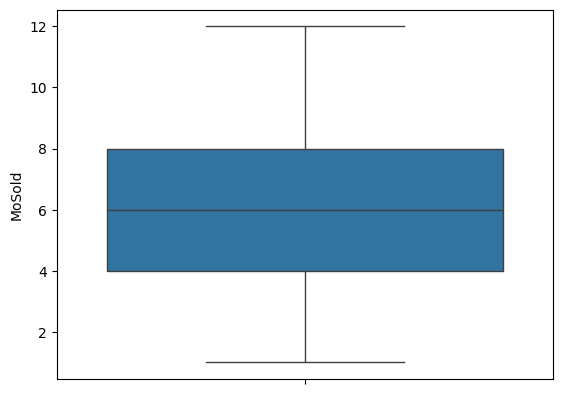

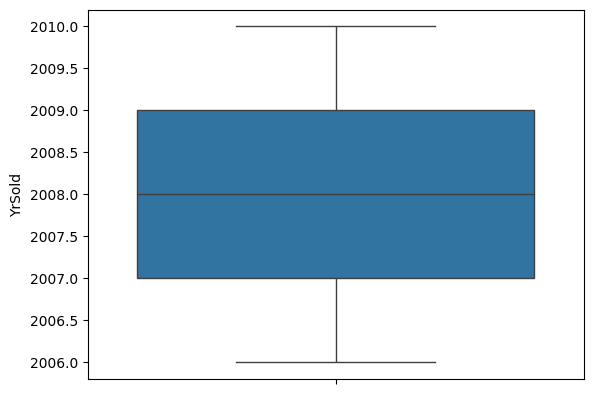

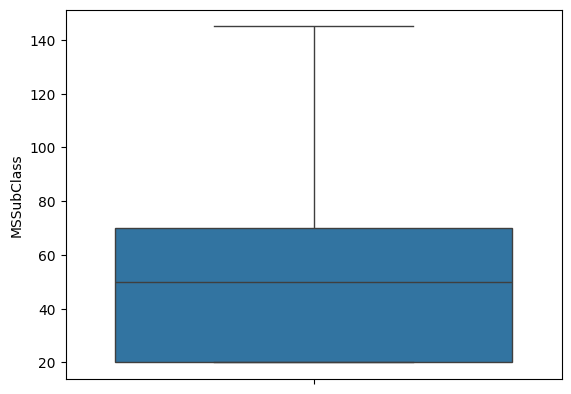

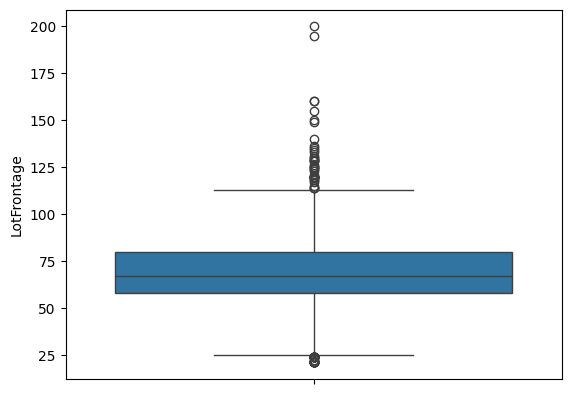

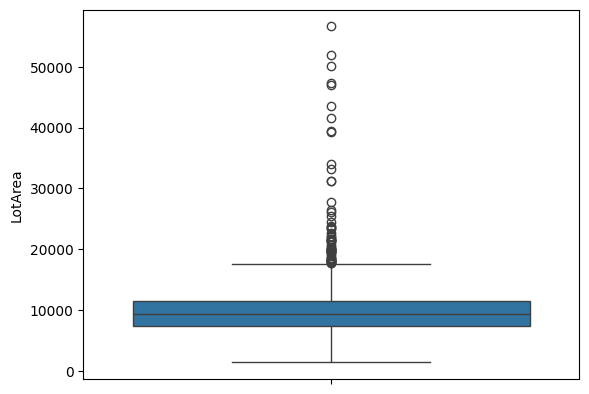

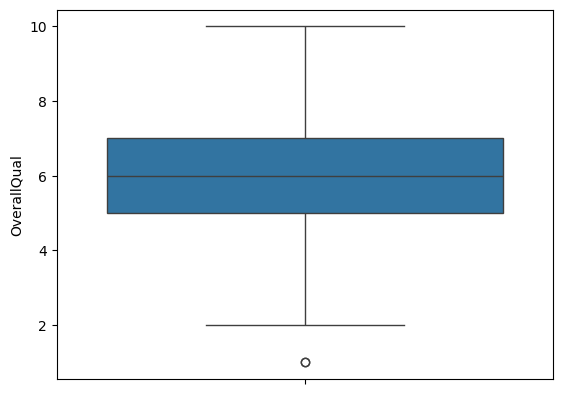

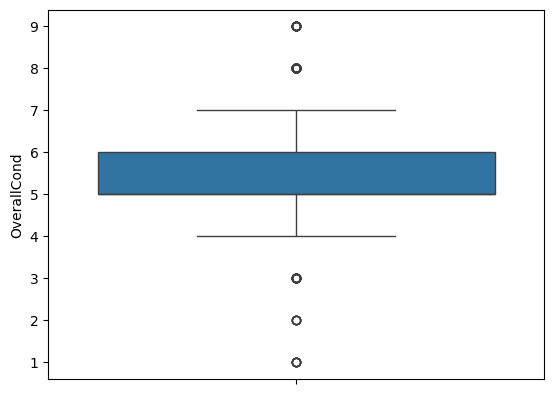

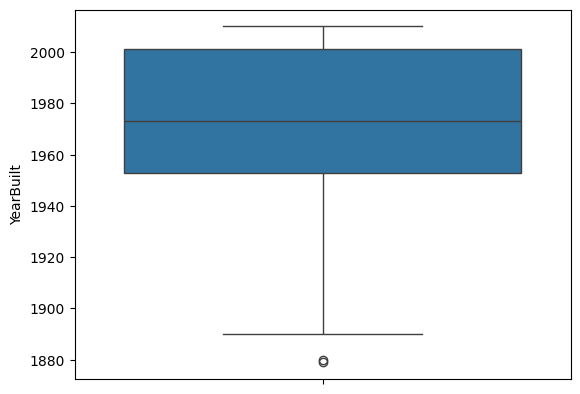

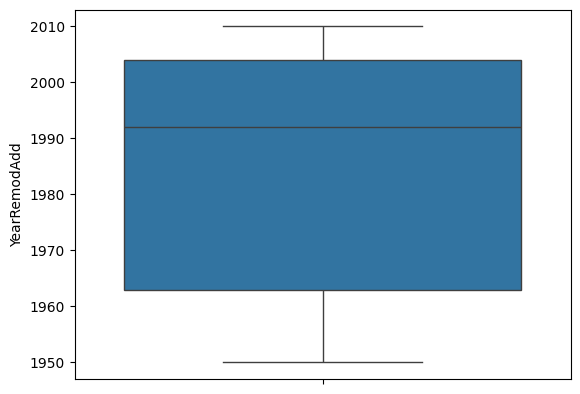

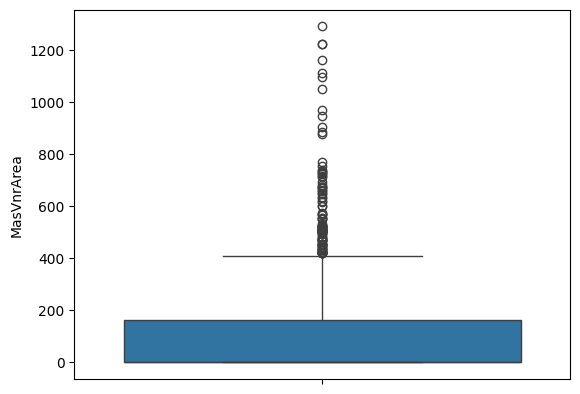

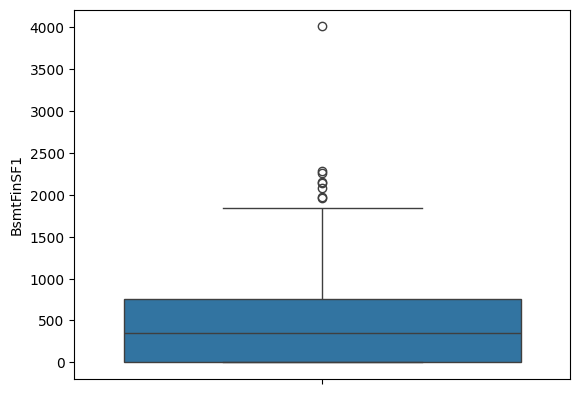

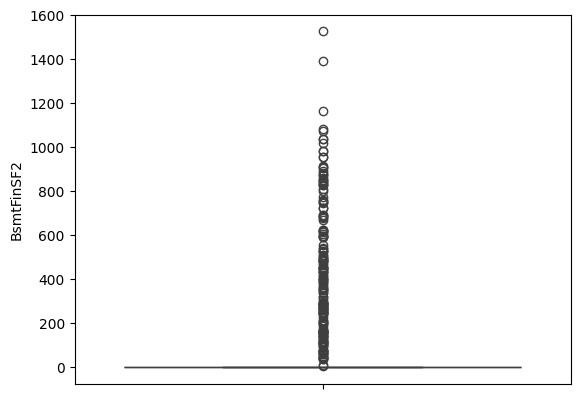

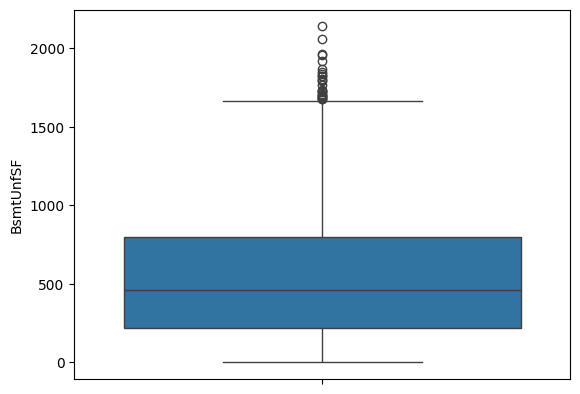

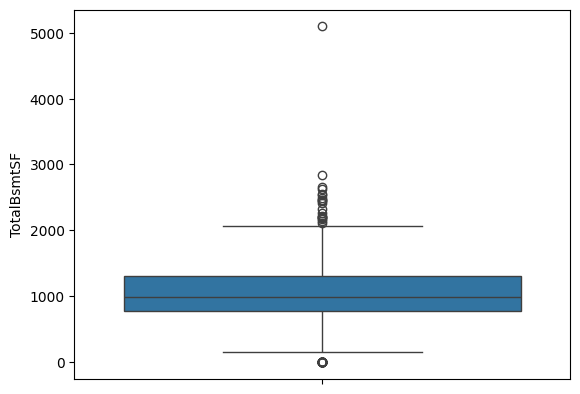

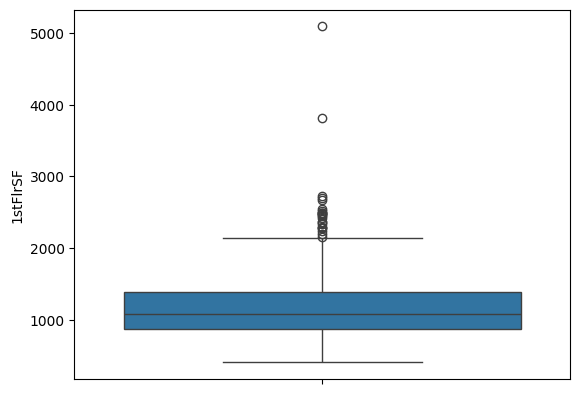

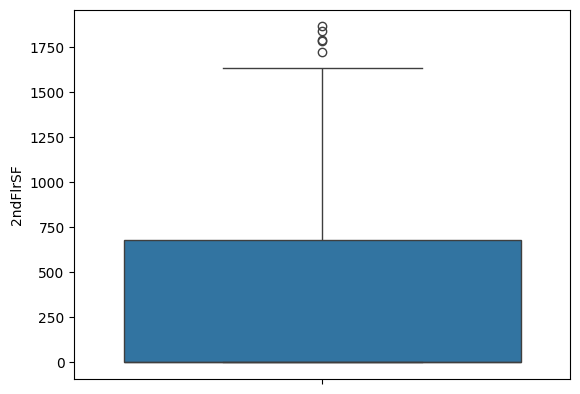

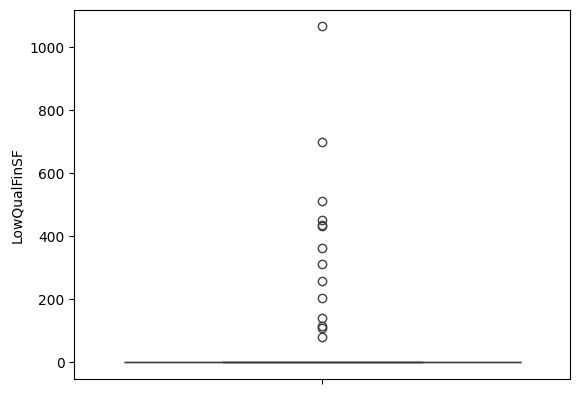

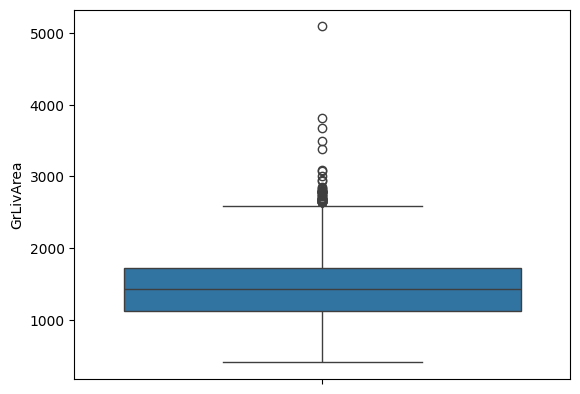

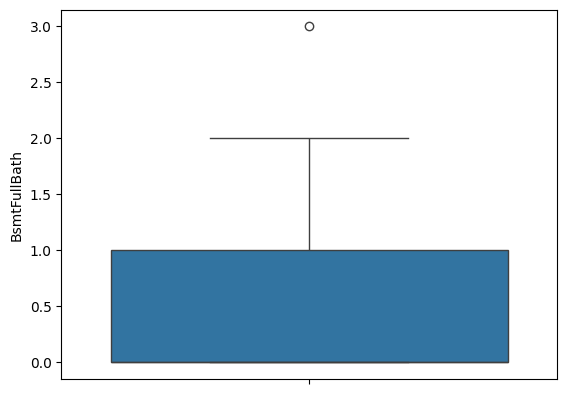

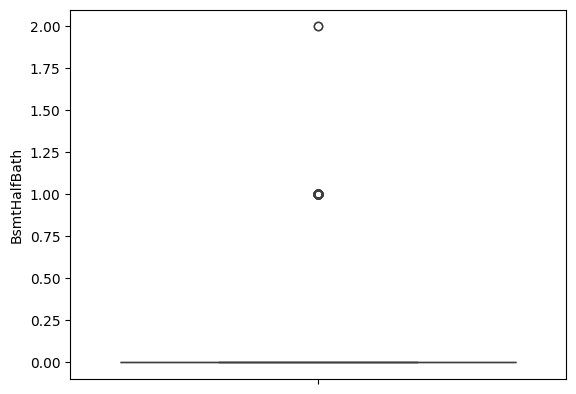

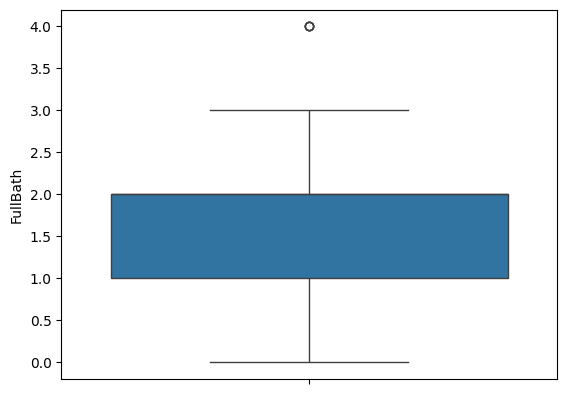

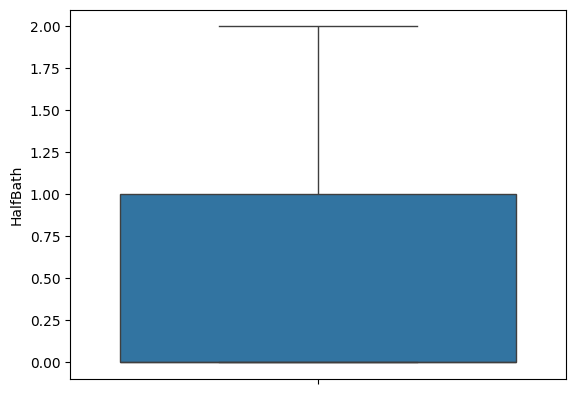

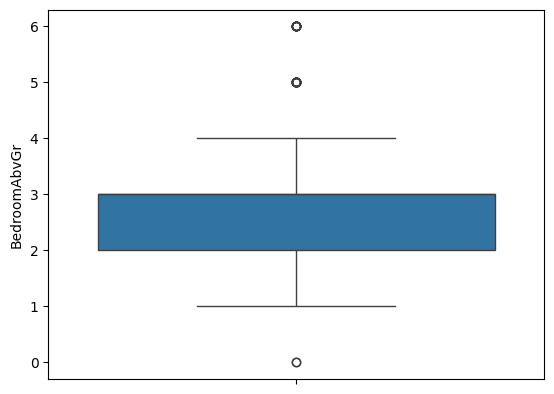

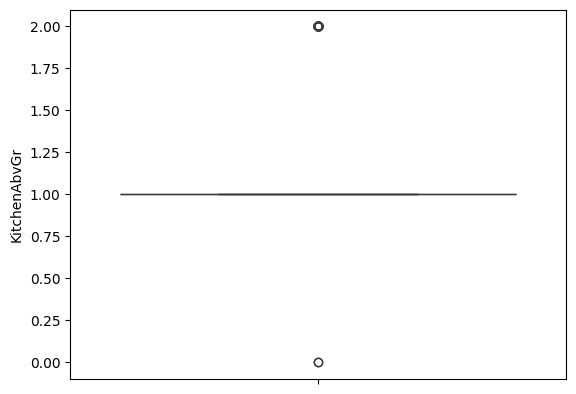

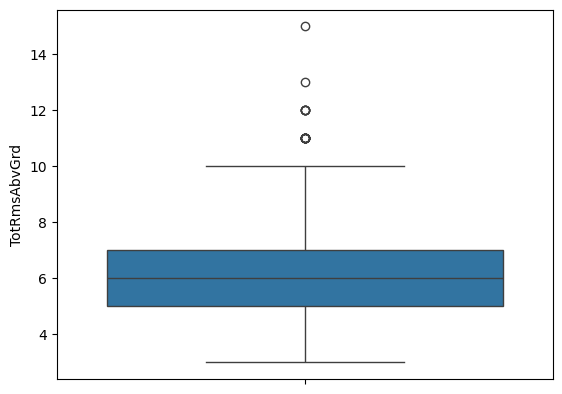

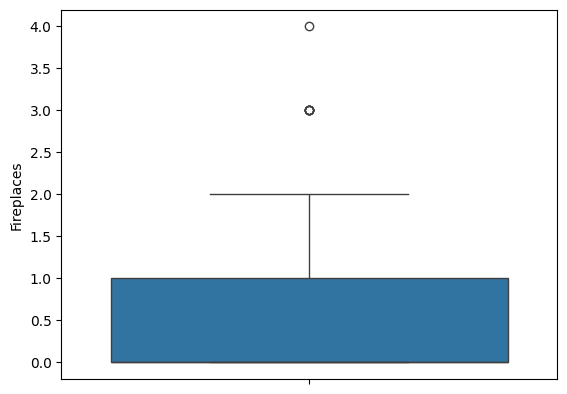

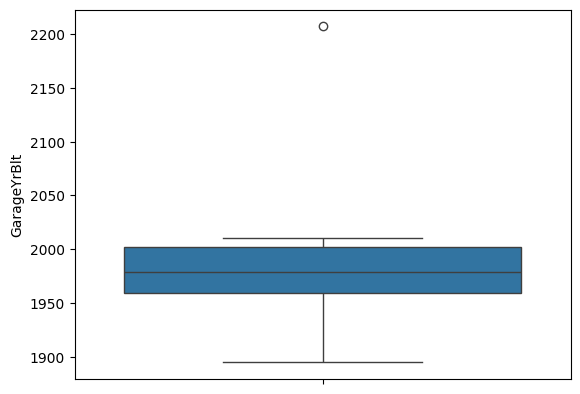

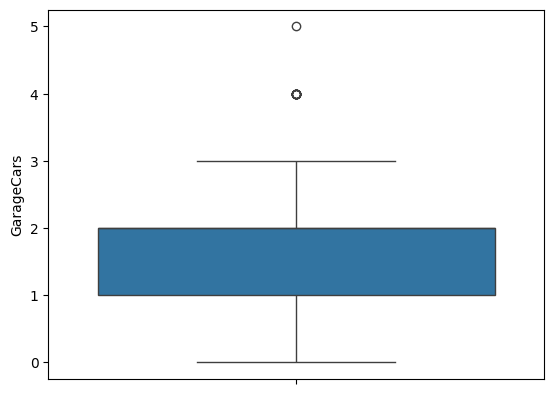

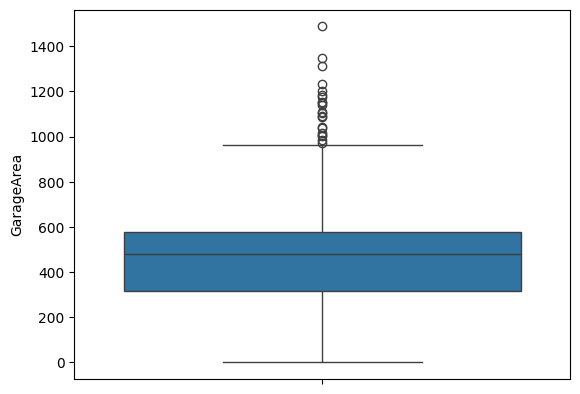

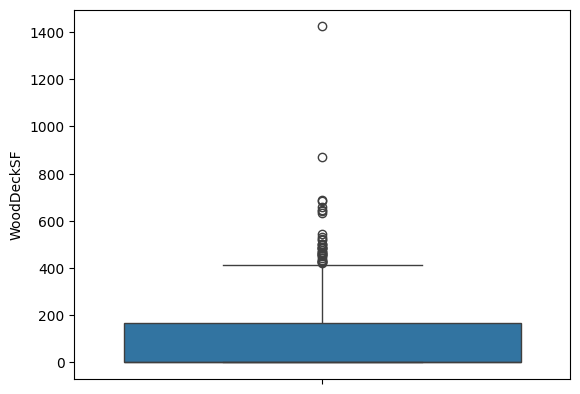

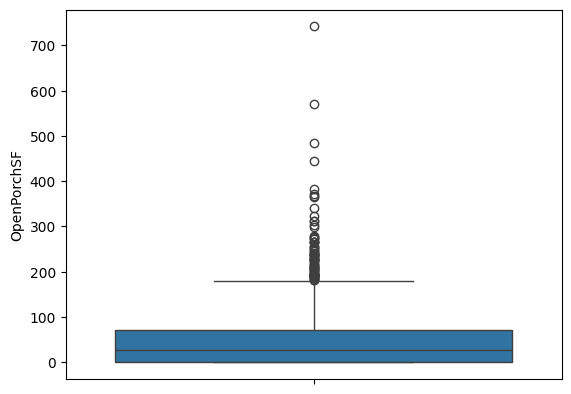

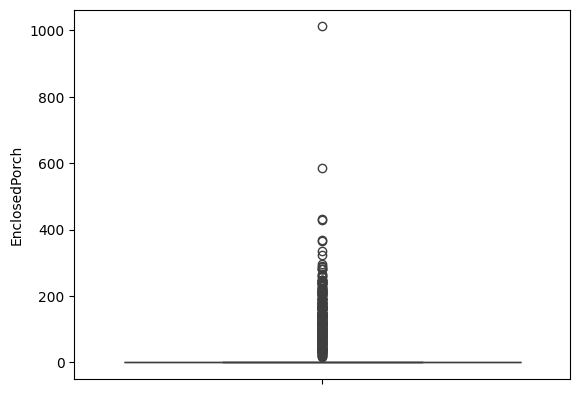

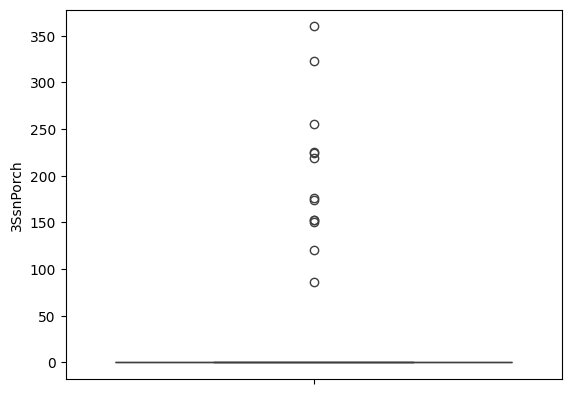

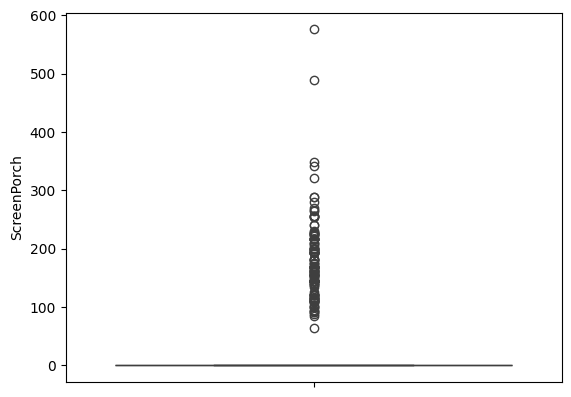

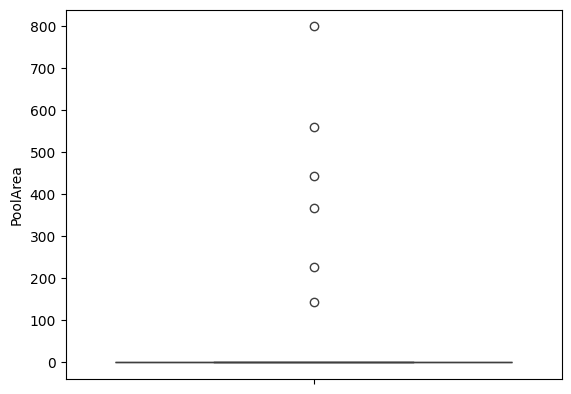

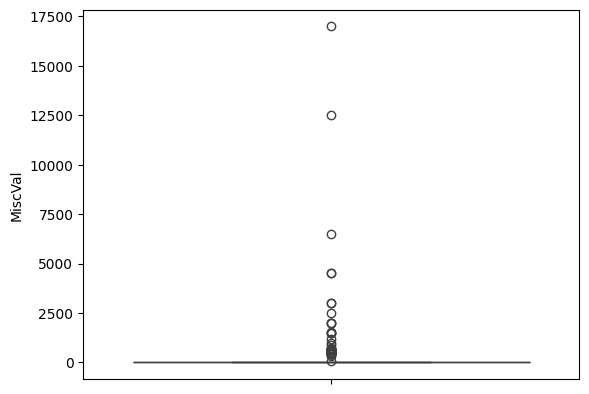

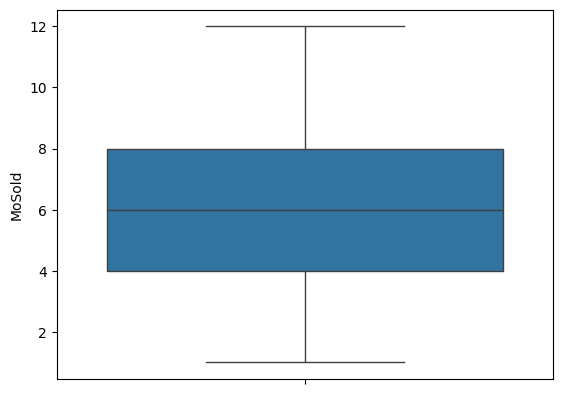

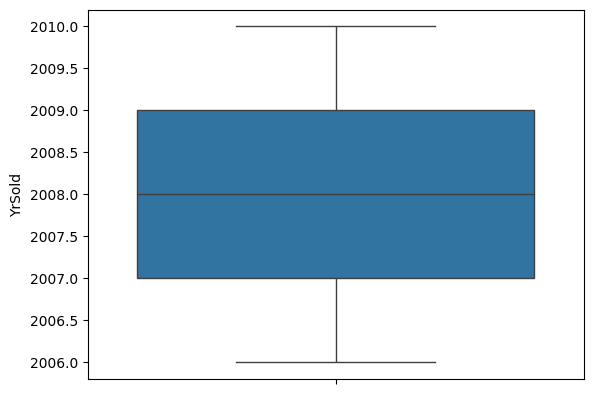

C:\Users\manju\AppData\Local\Temp\ipykernel_28520\731811774.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\manju\AppData\Local\Temp\ipykernel_28520\2433723477.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [23]:
# testing Data Preprocessing
plot_outliers(test_data)                  # Plotting training features outliers before removing them.
test_data = remove_outliers(test_data)    # Removing training features outliers using minsozrization with IQR.
plot_outliers(test_data)                  # Plotting training features outliers after removing them.
handling_cat_missing_values(test_data)    # Filling categorical features missing values with most frequent values.
handling_numeric_missing_values(test_data)      # Filling numerical features missing values with mean.
scaling(test_data)                        # Scaling numerical values using StandardScaler.
encoding(test_data)        

In [24]:
test_data = test_data[independent_training_features.columns]   # Reordering test data columns according to train data columns 

### Model Creation

In [25]:
# Regression Models
models = {
    "Linear Regressor" : LinearRegression(),
    "Ridage Regressor" : Ridge(),
    "Lasso Regressor" : Lasso(),
    "XGBoost Regressor" : XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5,random_state=42),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=100, max_depth=5,random_state=42)
}

In [26]:
def find_key(dictionary):
    # Check for keys where both elements of the list are greater than the other key's value elements
    best_key = None
    best_value = None
    
    for key, value in dictionary.items():
        for other_key, other_value in dictionary.items():
            if key != other_key and all(v > other_v for v, other_v in zip(value, other_value)):
                if not best_key or (value[0] > best_value[0] and value[1] > best_value[1]):
                    best_key = key
                    best_value = value
    
    if best_key:
        return best_key, best_value[0], best_value[1]

    # If no such key is found, get the key whose mean is nearest to its elements
    min_diff = float('inf')
    closest_key = None
    for key, value in dictionary.items():
        mean = sum(value) / len(value)
        diff = abs(mean - value[0]) + abs(mean - value[1])
        if diff < min_diff:
            min_diff = diff
            closest_key = key

    return closest_key, dictionary[closest_key][0], dictionary[closest_key][1]

In [27]:
# Function to get best training model from the regression models.
def get_best_model(x_train, y_train):
    model_scores = {}
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        model_score = model.score(x_train, y_train)
        model_scores[model] = model_score
        sil_scores = cross_val_score(model, independent_training_features, dependent_training_feature, cv=5)  # 5-fold cross-validation
        print(f"Cross-Validation Scores: {sil_scores}")
        print(f"Mean Score: {sil_scores.mean()}")
    best_model = max(model_scores, key=model_scores.get)
    best_model_score = model_scores[best_model]
    # best_model, best_training_score, best_validation_score = find_key(model_scores)
    # best_model_name = [key for key, value in models.items() if value == best_model]
    best_model_name = next((k for k, v in models.items() if v == best_model), None)
    print(f"{best_model_name} is the best trained model with score of {best_model_score}")
    return best_model

In [28]:
# Best model 
model = get_best_model(independent_training_features, dependent_training_feature)

Cross-Validation Scores: [0.83797708 0.80961693 0.85204254 0.84364203 0.62509128]
Mean Score: 0.7936739734208568
Cross-Validation Scores: [0.85587057 0.81152366 0.85199866 0.84427224 0.65009033]
Mean Score: 0.8027510921188142


c:\Users\manju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.974e+09, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\manju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.787e+08, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\manju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Cross-Validation Scores: [0.83824322 0.80967718 0.85206123 0.84369287 0.62687794]
Mean Score: 0.7941104883945936
Cross-Validation Scores: [0.89680701 0.83537805 0.88743222 0.90561432 0.87789422]
Mean Score: 0.8806251645088196
Cross-Validation Scores: [0.84019599 0.82471695 0.83957142 0.83595723 0.79386545]
Mean Score: 0.8268614097615702
XGBoost Regressor is the best trained model with score of 0.9889227747917175


In [29]:
# prediction
predicted_arr = model.predict(test_data)

In [30]:
predicted_df = pd.DataFrame({
    "ID" : test_data_id['Id'].values,
    "SalePrice" : predicted_arr
})

In [31]:
predicted_df.to_csv('Submission.csv', index=False)